In [1]:
import ISRAnalysis as an

Welcome to JupyROOT 6.14/04


In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import sys

# Unfolding for detector (up to dressed lepton level) 

In [3]:
binDef = "_FineCoarse"
channel = "electron"
year = "2016"
doSys = True

# Redirect STDOUT and STDERR
sys.stderr = open("stderr_"+channel+"_"+year+".txt", "w")
sys.stdout = open("stdout_"+channel+"_"+year+".txt", "w")

detUnfold_muon_2016 = an.ISRAnalysis(year, channel, True, "matrix", 
                                     "Detector_Dressed_DRp1_Fiducial", "Detector_Dressed_DRp1", binDef)


In [4]:
# Just to compare before/after unfolding (i.e. use coarse binning for detector plots)
detUnfold_muon_2016_CoarseCoarse = an.ISRAnalysis(year, channel, True, "matrix", 
                                     "Detector_Dressed_DRp1_Fiducial", "Detector_Dressed_DRp1", "")

In [5]:
# Check matrix conditions
detUnfold_muon_2016.checkMatrixCond("Pt")
detUnfold_muon_2016.checkMatrixCond("Mass")

<ROOT.TVectorT<double> object ("TVectorT<double>") at 0x477f228>

In [6]:
# Draw response matrix
detUnfold_muon_2016.drawResponseM("Pt")
detUnfold_muon_2016.drawResponseM("Mass")

In [7]:
# Nominal
detUnfold_muon_2016.setInputHist(False, False, None, "Detector")
detUnfold_muon_2016.setUnfoldBkgs(False, "Detector")
detUnfold_muon_2016.subFake() # Subract DY fake (out of fiducial volume at gen level)

detUnfold_muon_2016_CoarseCoarse.setInputHist(False, False, None, "Detector")
detUnfold_muon_2016_CoarseCoarse.setUnfoldBkgs(False, "Detector")
detUnfold_muon_2016_CoarseCoarse.subFake() # Subract DY fake (out of fiducial volume at gen level)

In [8]:
if doSys == True:
    if channel == "muon" :
        systematics = {
                       "ID":["IdSFUp", "IdSFDown"], "ISO":["IsoSFUp", "IsoSFDown"], "TRG":["trgSFUp", "trgSFDown"], 
                       "L1Prefie":["L1PrefireUp","L1PrefireDown"], 
                       "PU":["PUUp", "PUDown"],
                       "ZptCorr": ["ZpTCorrected", "Nominal"], # use different matrix file
                       #"iterEM": ["iterEM", "Nominal"]
                       #"Scale":["ScaleABUp", "ScaleABDown", "ScaleAUp", "ScaleADown", "ScaleBUp", "ScaleBDown"], 
                       #"AlphaS":["AlphaSUp", "AlphaSDown"],
                       #"LepMom": ["NoLepMomCorr", "Nominal"]} # use different matrix file
                       }
    
    if channel == "electron" :
        systematics = {
                       "ID":["IdSFUp", "IdSFDown"],
                       "Reco":["recoSFUp","recoSFDown"], 
                       "TRG":["trgSFUp", "trgSFDown"], 
                       "L1Prefie":["L1PrefireUp","L1PrefireDown"], 
                       "PU":["PUUp", "PUDown"],
                       "ZptCorr": ["ZpTCorrected", "Nominal"],
                       #"iterEM": ["iterEM", "Nominal"]
                       #"LepMom": ["NoLepMomCorr", "Nominal"]
                       #"Scale":["ScaleABUp", "ScaleABDown", "ScaleAUp", "ScaleADown", "ScaleBUp", "ScaleBDown"], 
                       #"AlphaS":["AlphaSUp", "AlphaSDown"]}
                        }
    
    for sysName, postfixs in systematics.items():
        for postfix in postfixs:
            detUnfold_muon_2016.setSystematics(sysName, postfix)
            #print(sysName + " " + postfix)
            detUnfold_muon_2016.setInputHist(False, False, None, "Detector", True, sysName, postfix)
            detUnfold_muon_2016.setUnfoldBkgs(True, "Detector", sysName, postfix) #Combine Bkgs and Fake?
            detUnfold_muon_2016.subFake(True, sysName,postfix)

In [9]:
detUnfold_muon_2016.doUnfold() # nominal unfold
if doSys:
    detUnfold_muon_2016.doUnfold(doSys, False)

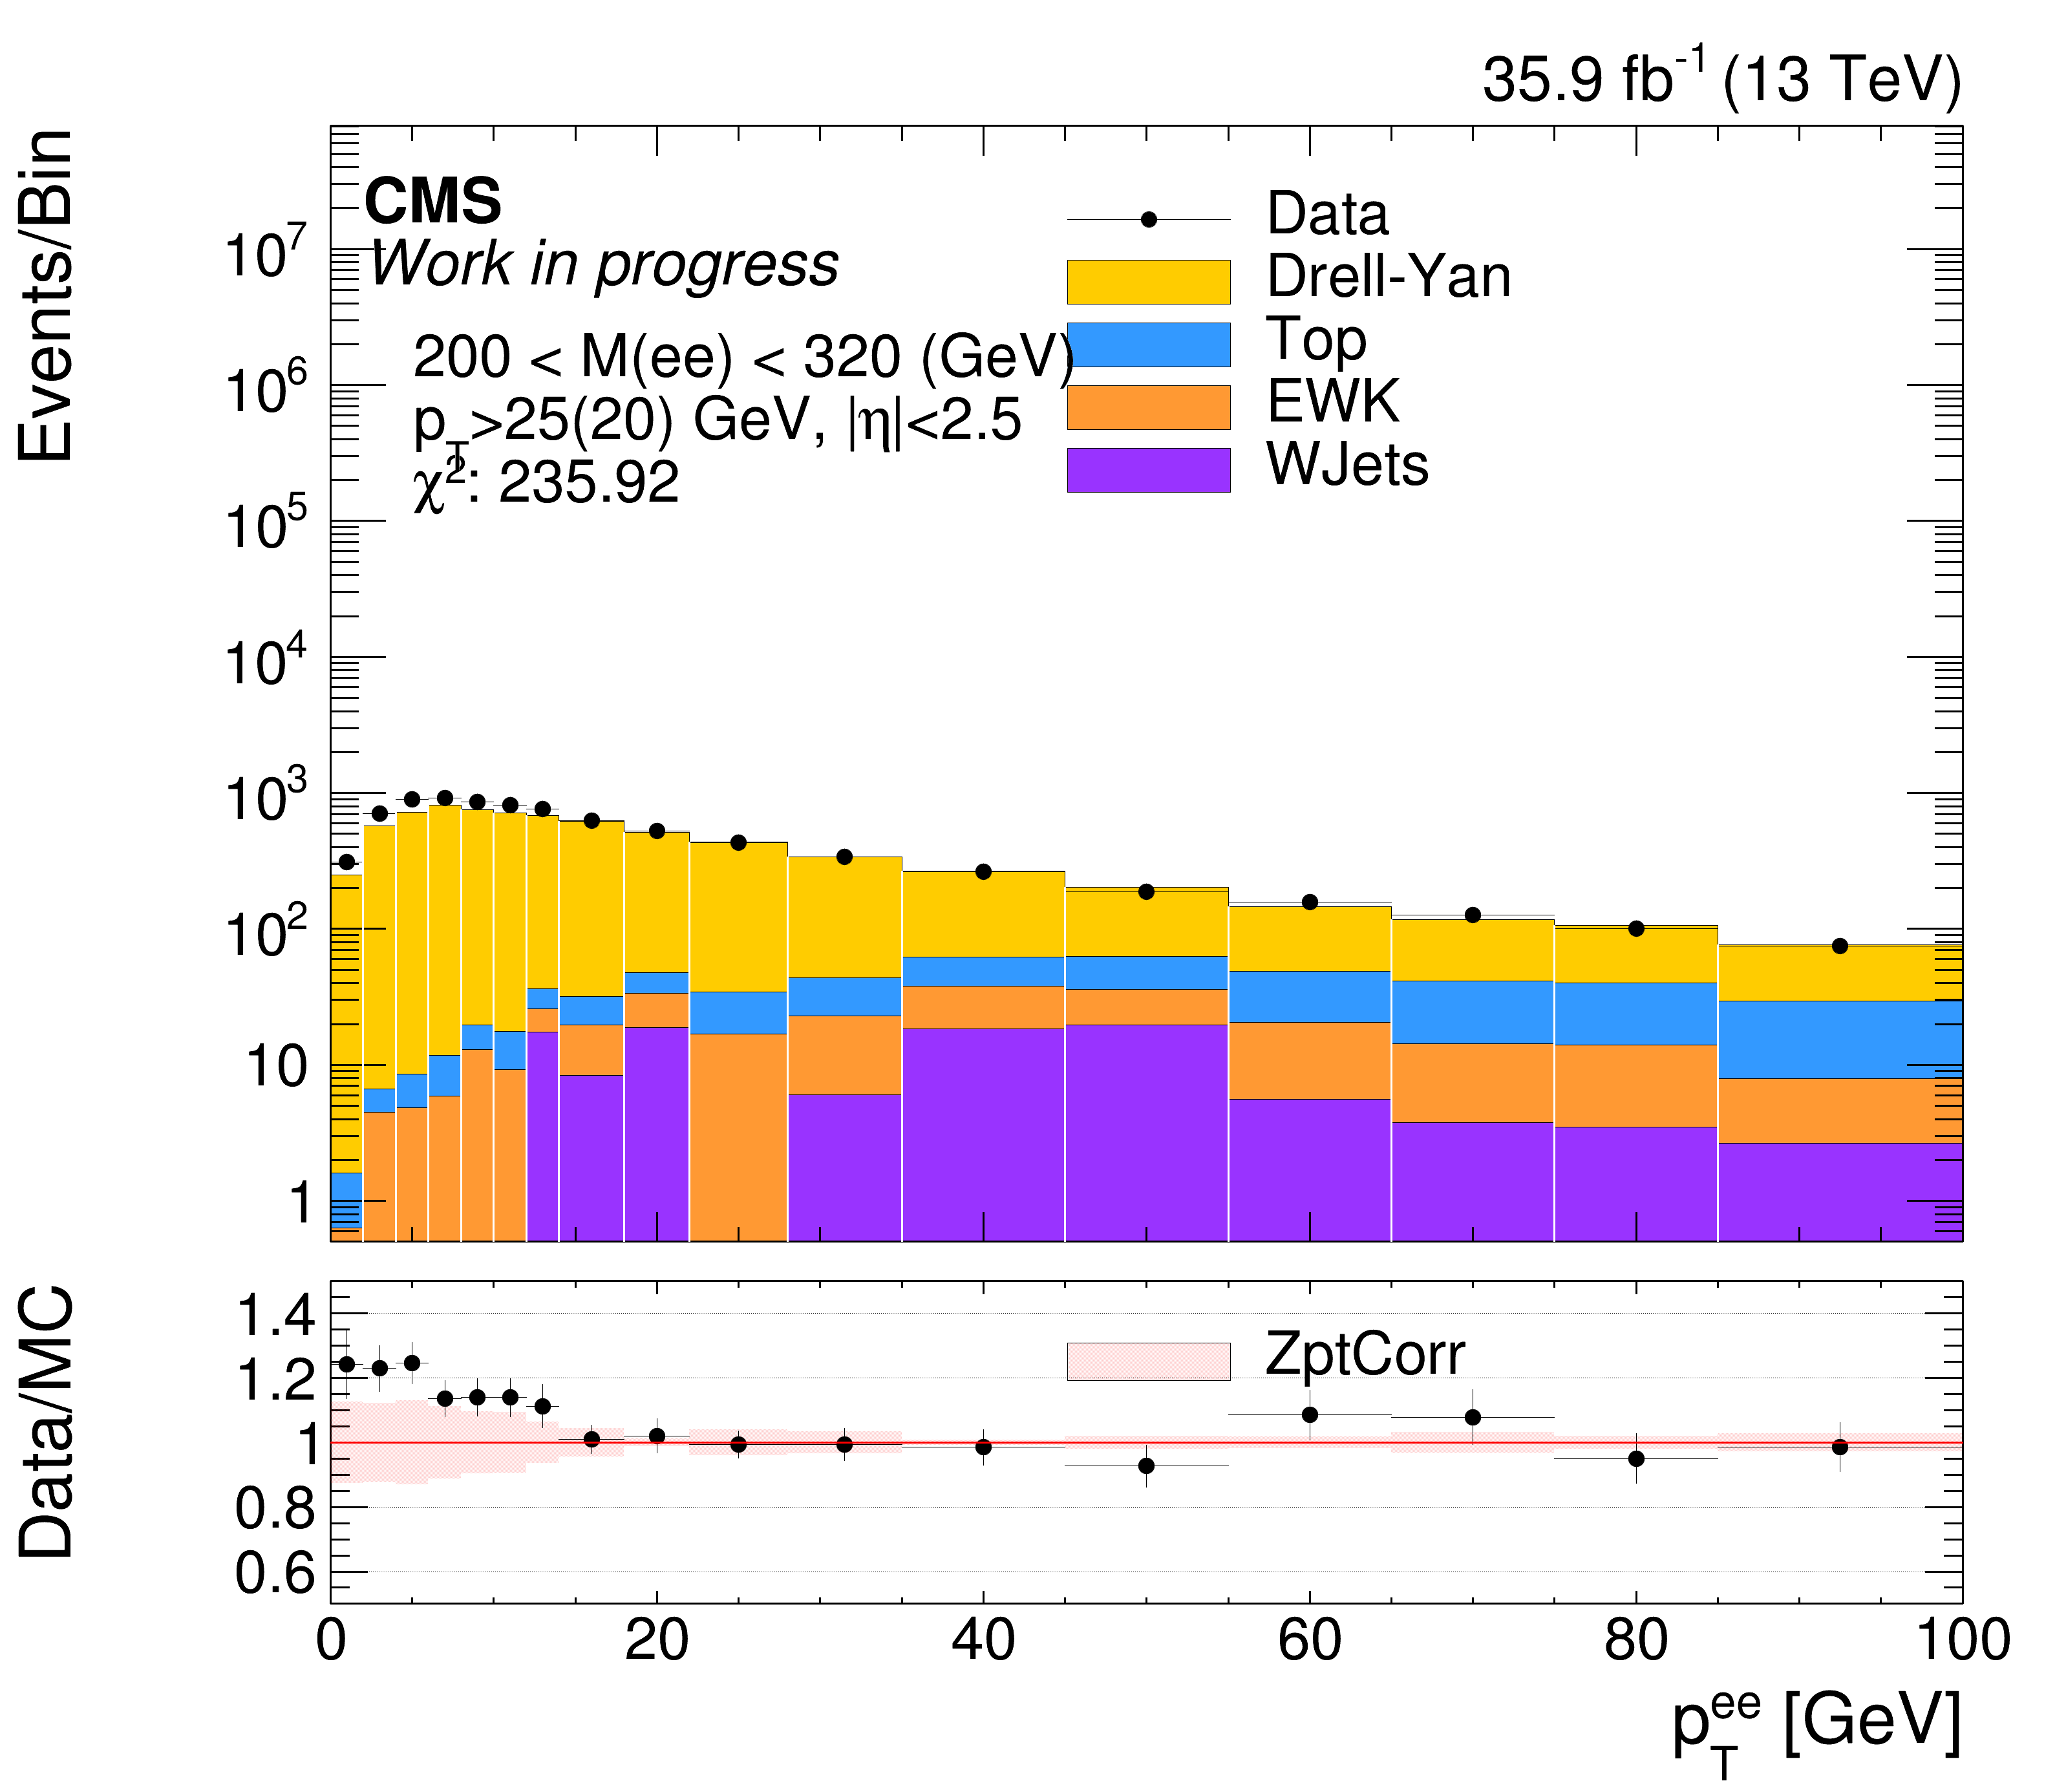

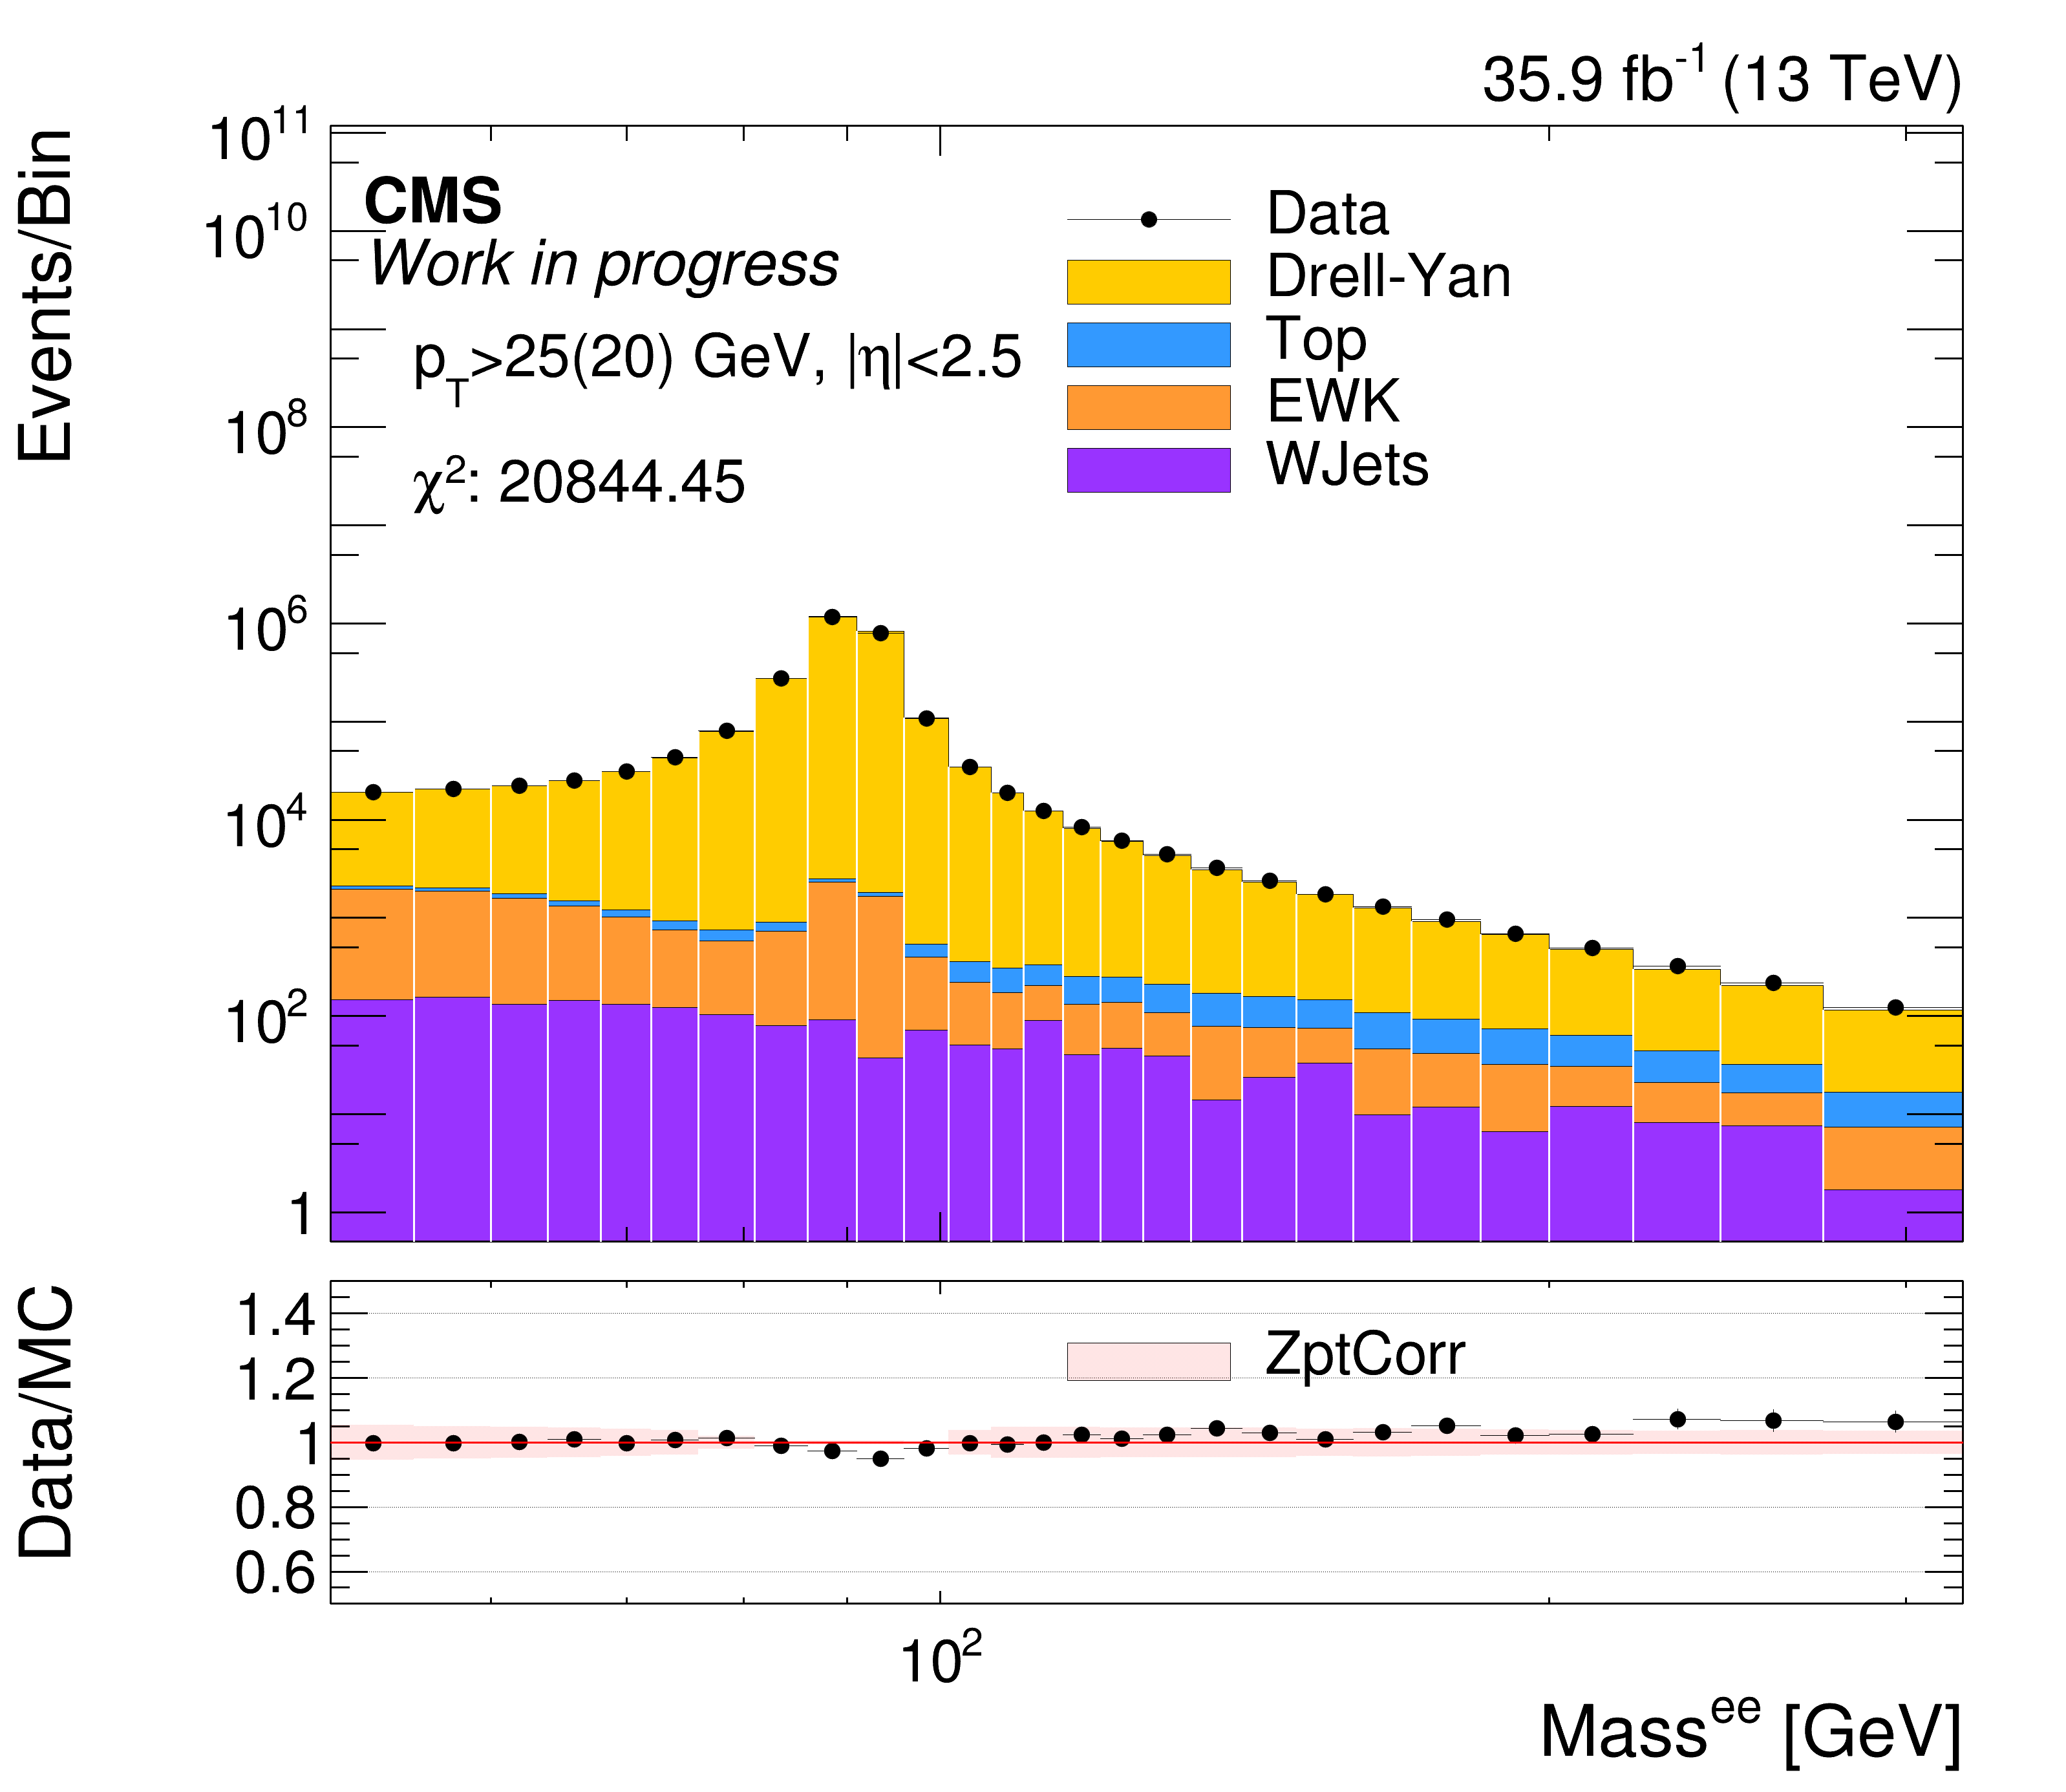

In [10]:
for massBin in range(5):
    detUnfold_muon_2016.drawDetPlot("Pt"+binDef, "Detector", "pt[UO];mass[UOC"+str(massBin)+"]", True, "", "Det_M"+str(massBin)+"_", massBin, True)
detUnfold_muon_2016.drawDetPlot("Mass"+binDef, "Detector", "mass[UO];pt[UOC0]", True, "", "Det_")

if doSys: 
    for sysName, _ in systematics.items():
        if sysName == "iterEM": continue
        for massBin in range(5):
            detUnfold_muon_2016.drawDetPlot("Pt"+binDef, "Detector", "pt[UO];mass[UOC"+str(massBin)+"]", True, sysName, "Det_M"+str(massBin)+"_", massBin, True)
        detUnfold_muon_2016.drawDetPlot("Mass"+binDef, "Detector", "mass[UO];pt[UOC0]", True, sysName, "Det_", 0, True)

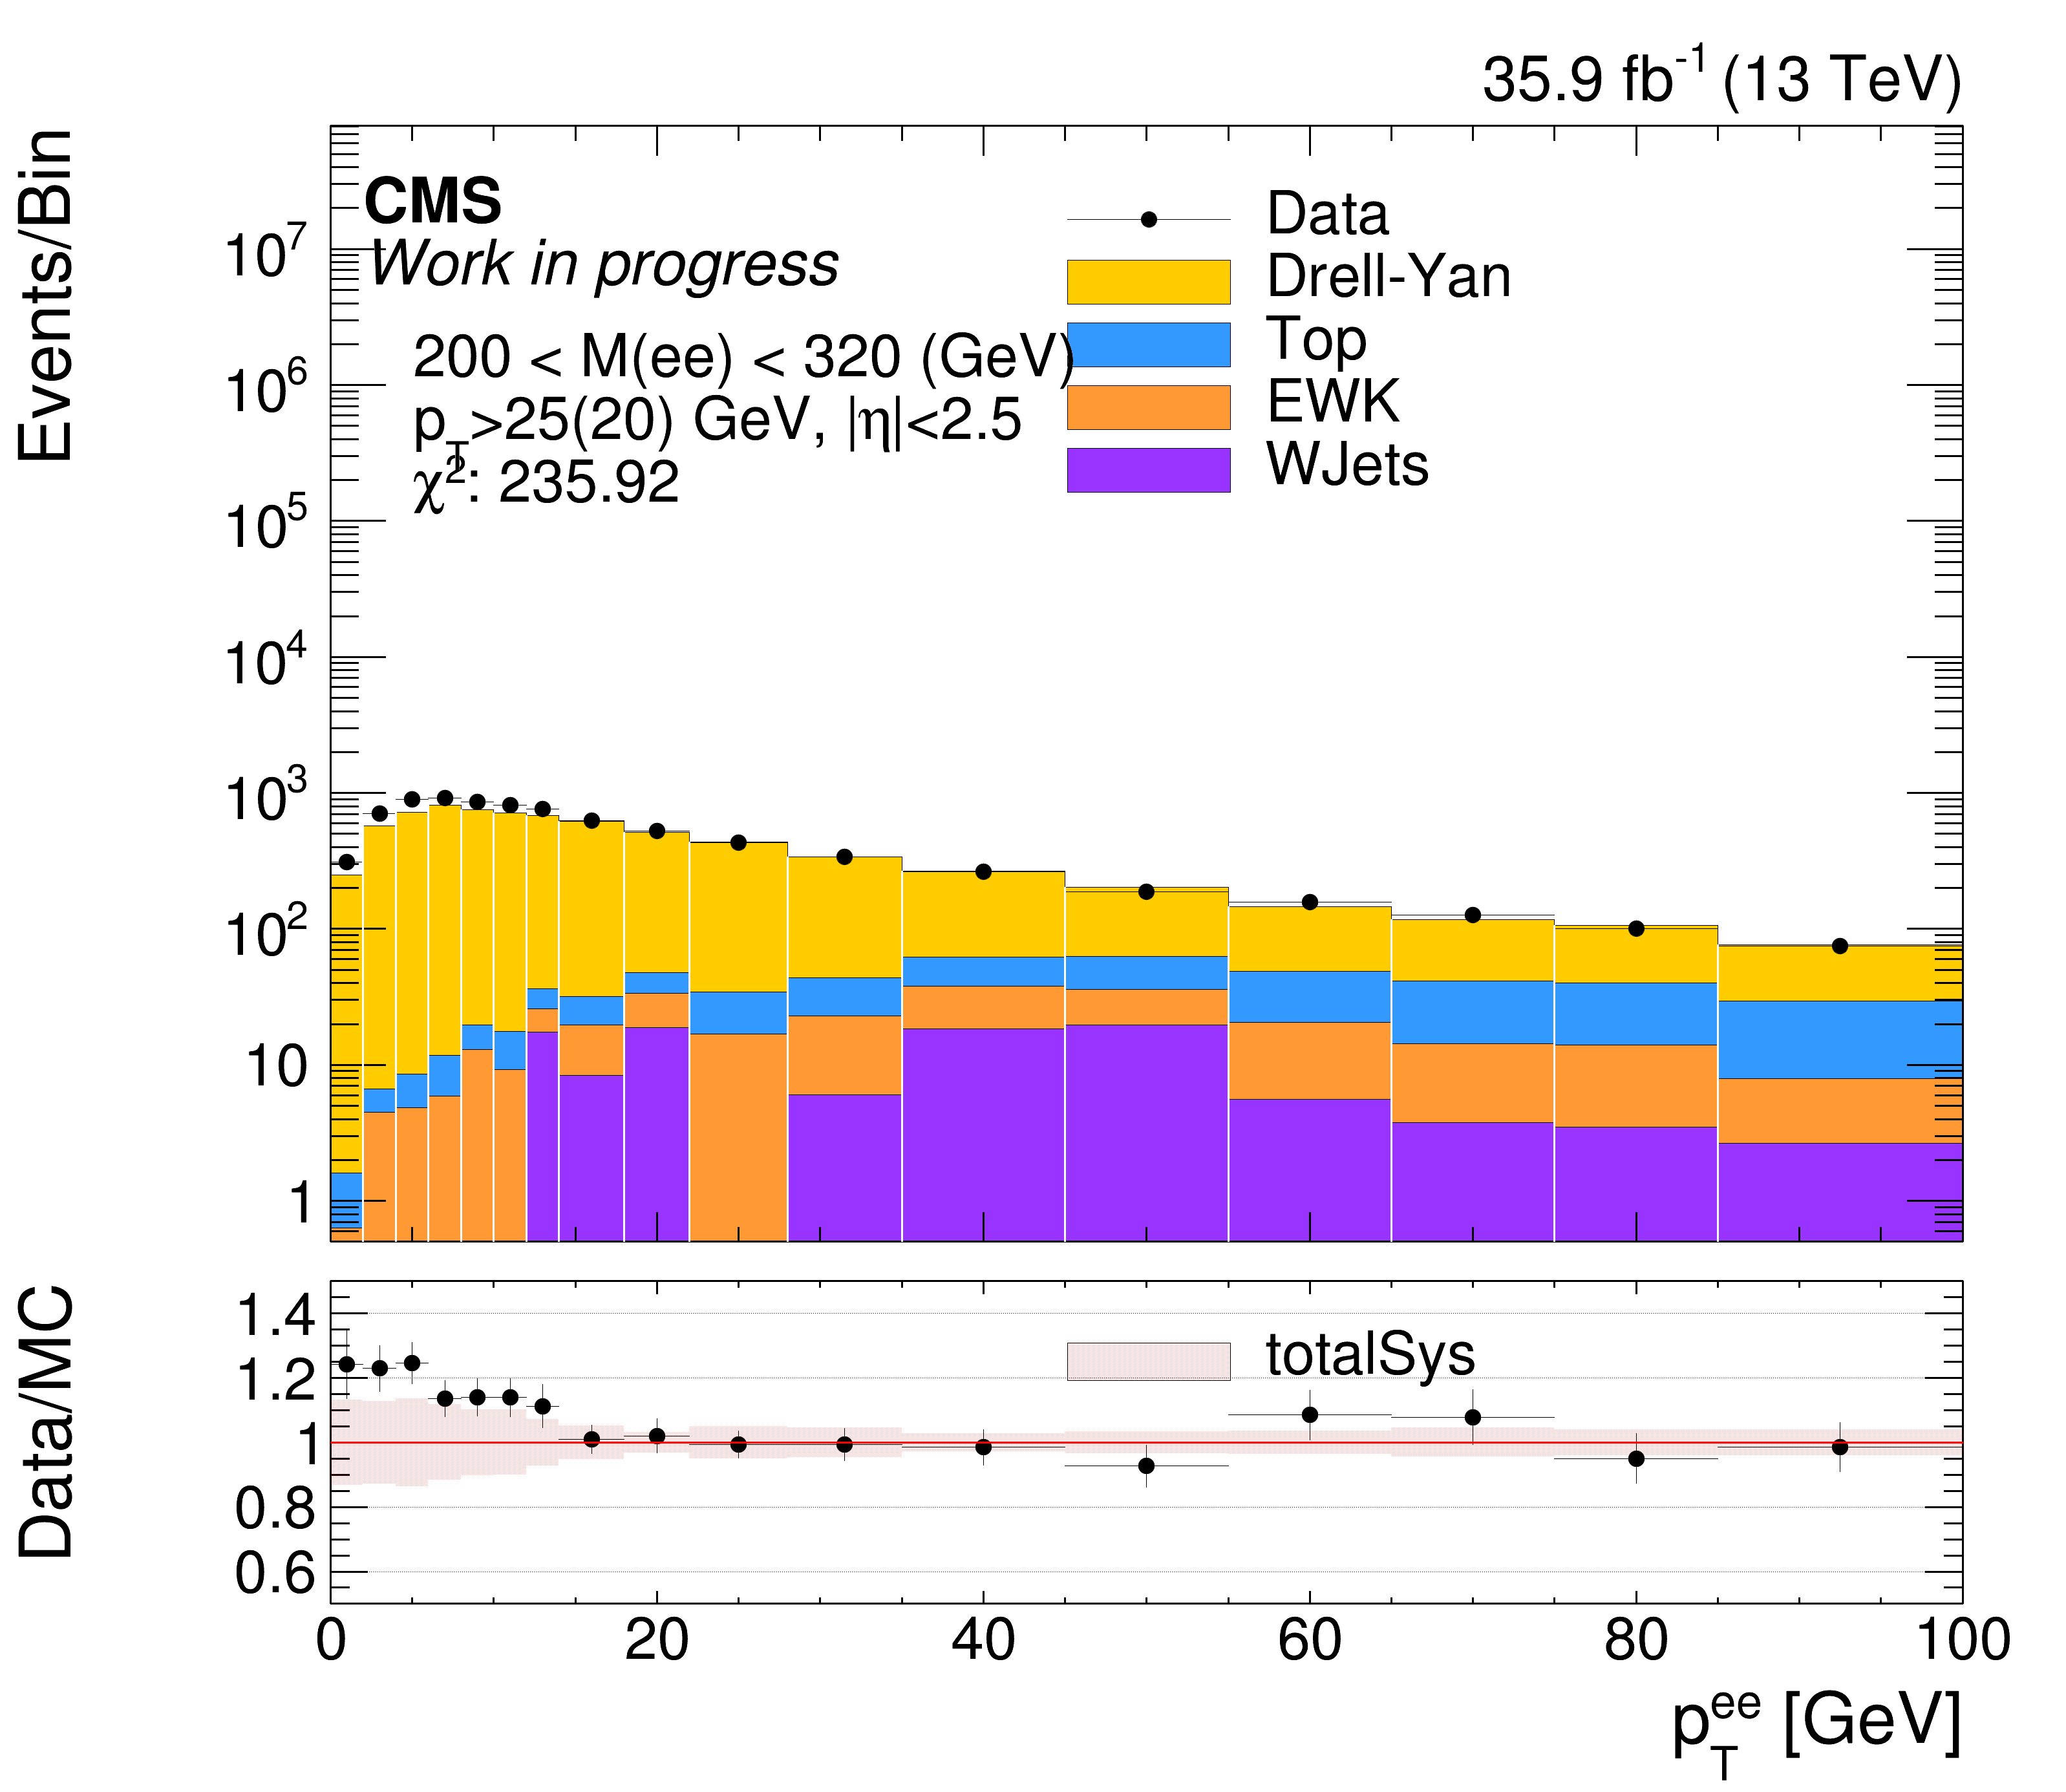

In [11]:
if doSys: 
    for massBin in range(5):
        detUnfold_muon_2016.drawDetPlot("Pt"+binDef, "Detector", "pt[UO];mass[UOC"+str(massBin)+"]", True, "totalSys", "Det_M"+str(massBin)+"_", massBin, True)

In [12]:
# Draw correlation of unfolded distribution
for massBin in range(5):
    detUnfold_muon_2016.drawCorrelation("Pt", "pt[UO];mass[UOC"+str(massBin)+"]", True, str(massBin))
    
detUnfold_muon_2016.drawCorrelation("Pt", "pt[UO];mass[UO]", True, "")
detUnfold_muon_2016.drawCorrelation("Mass", "mass[UO];pt[UOC]", True, "")

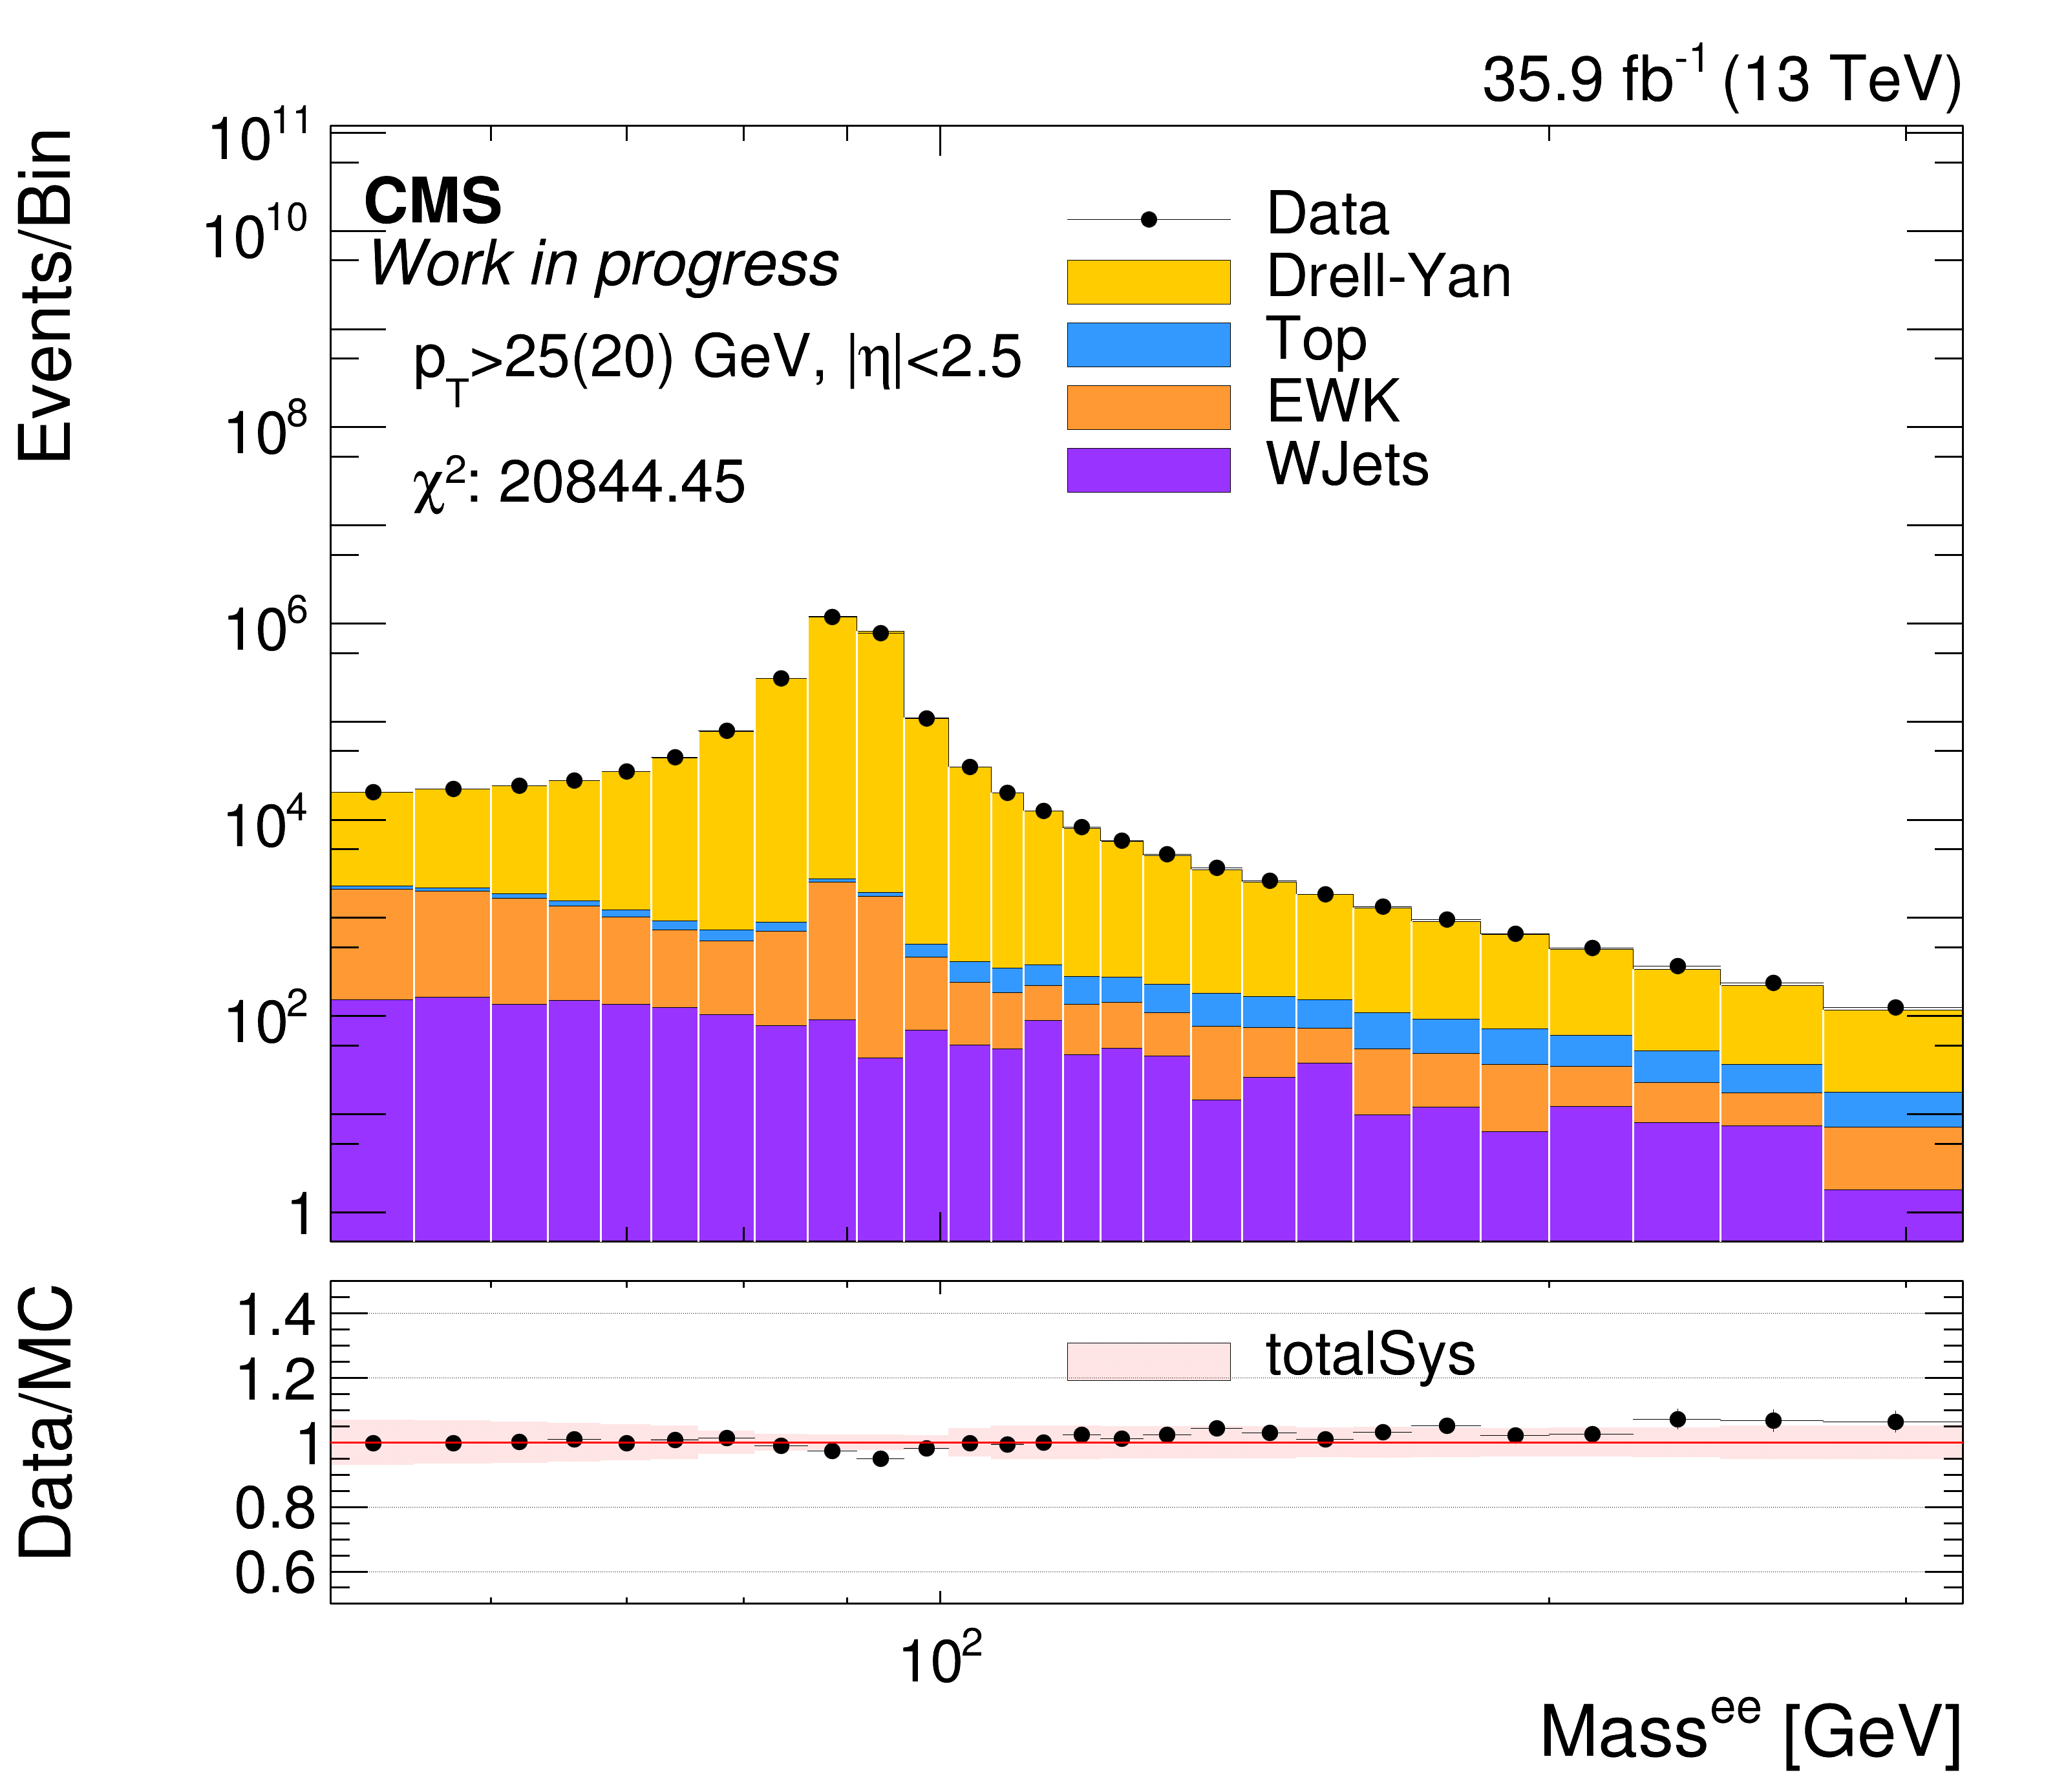

In [13]:
detUnfold_muon_2016.drawDetPlot("Mass"+binDef, "Detector", "mass[UO];pt[UOC0]", True, "totalSys", "Det_", 0, True)

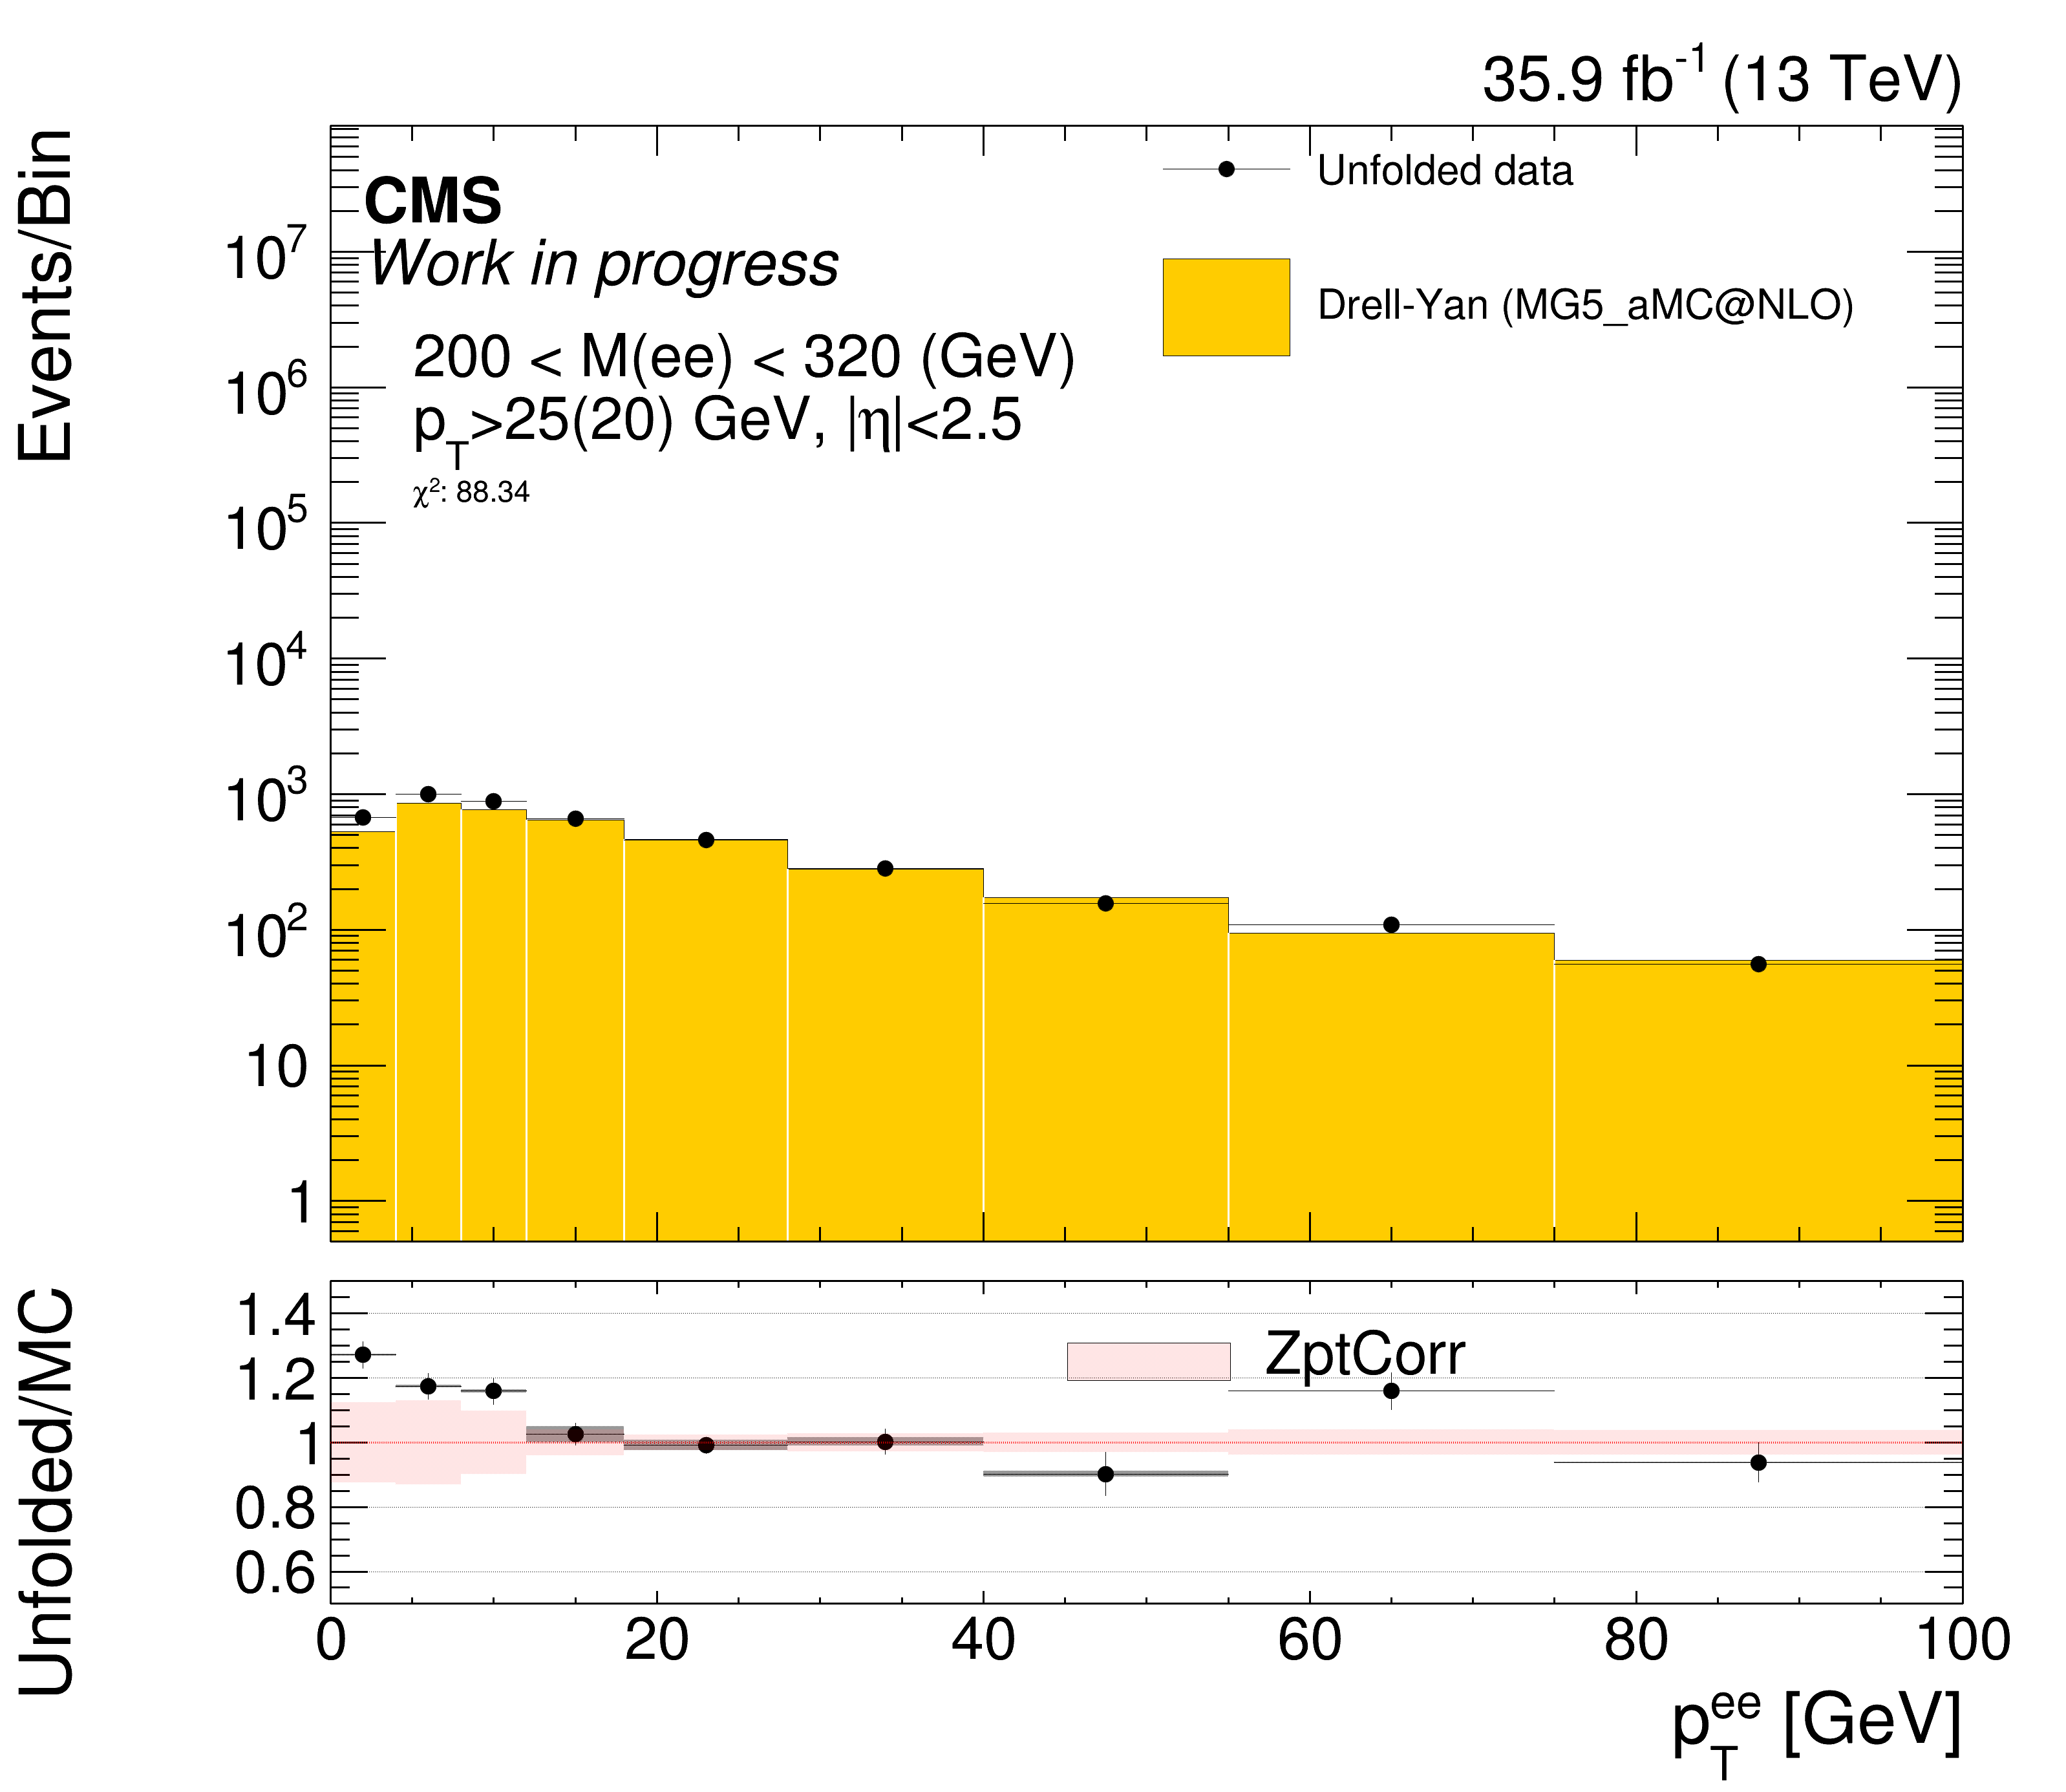

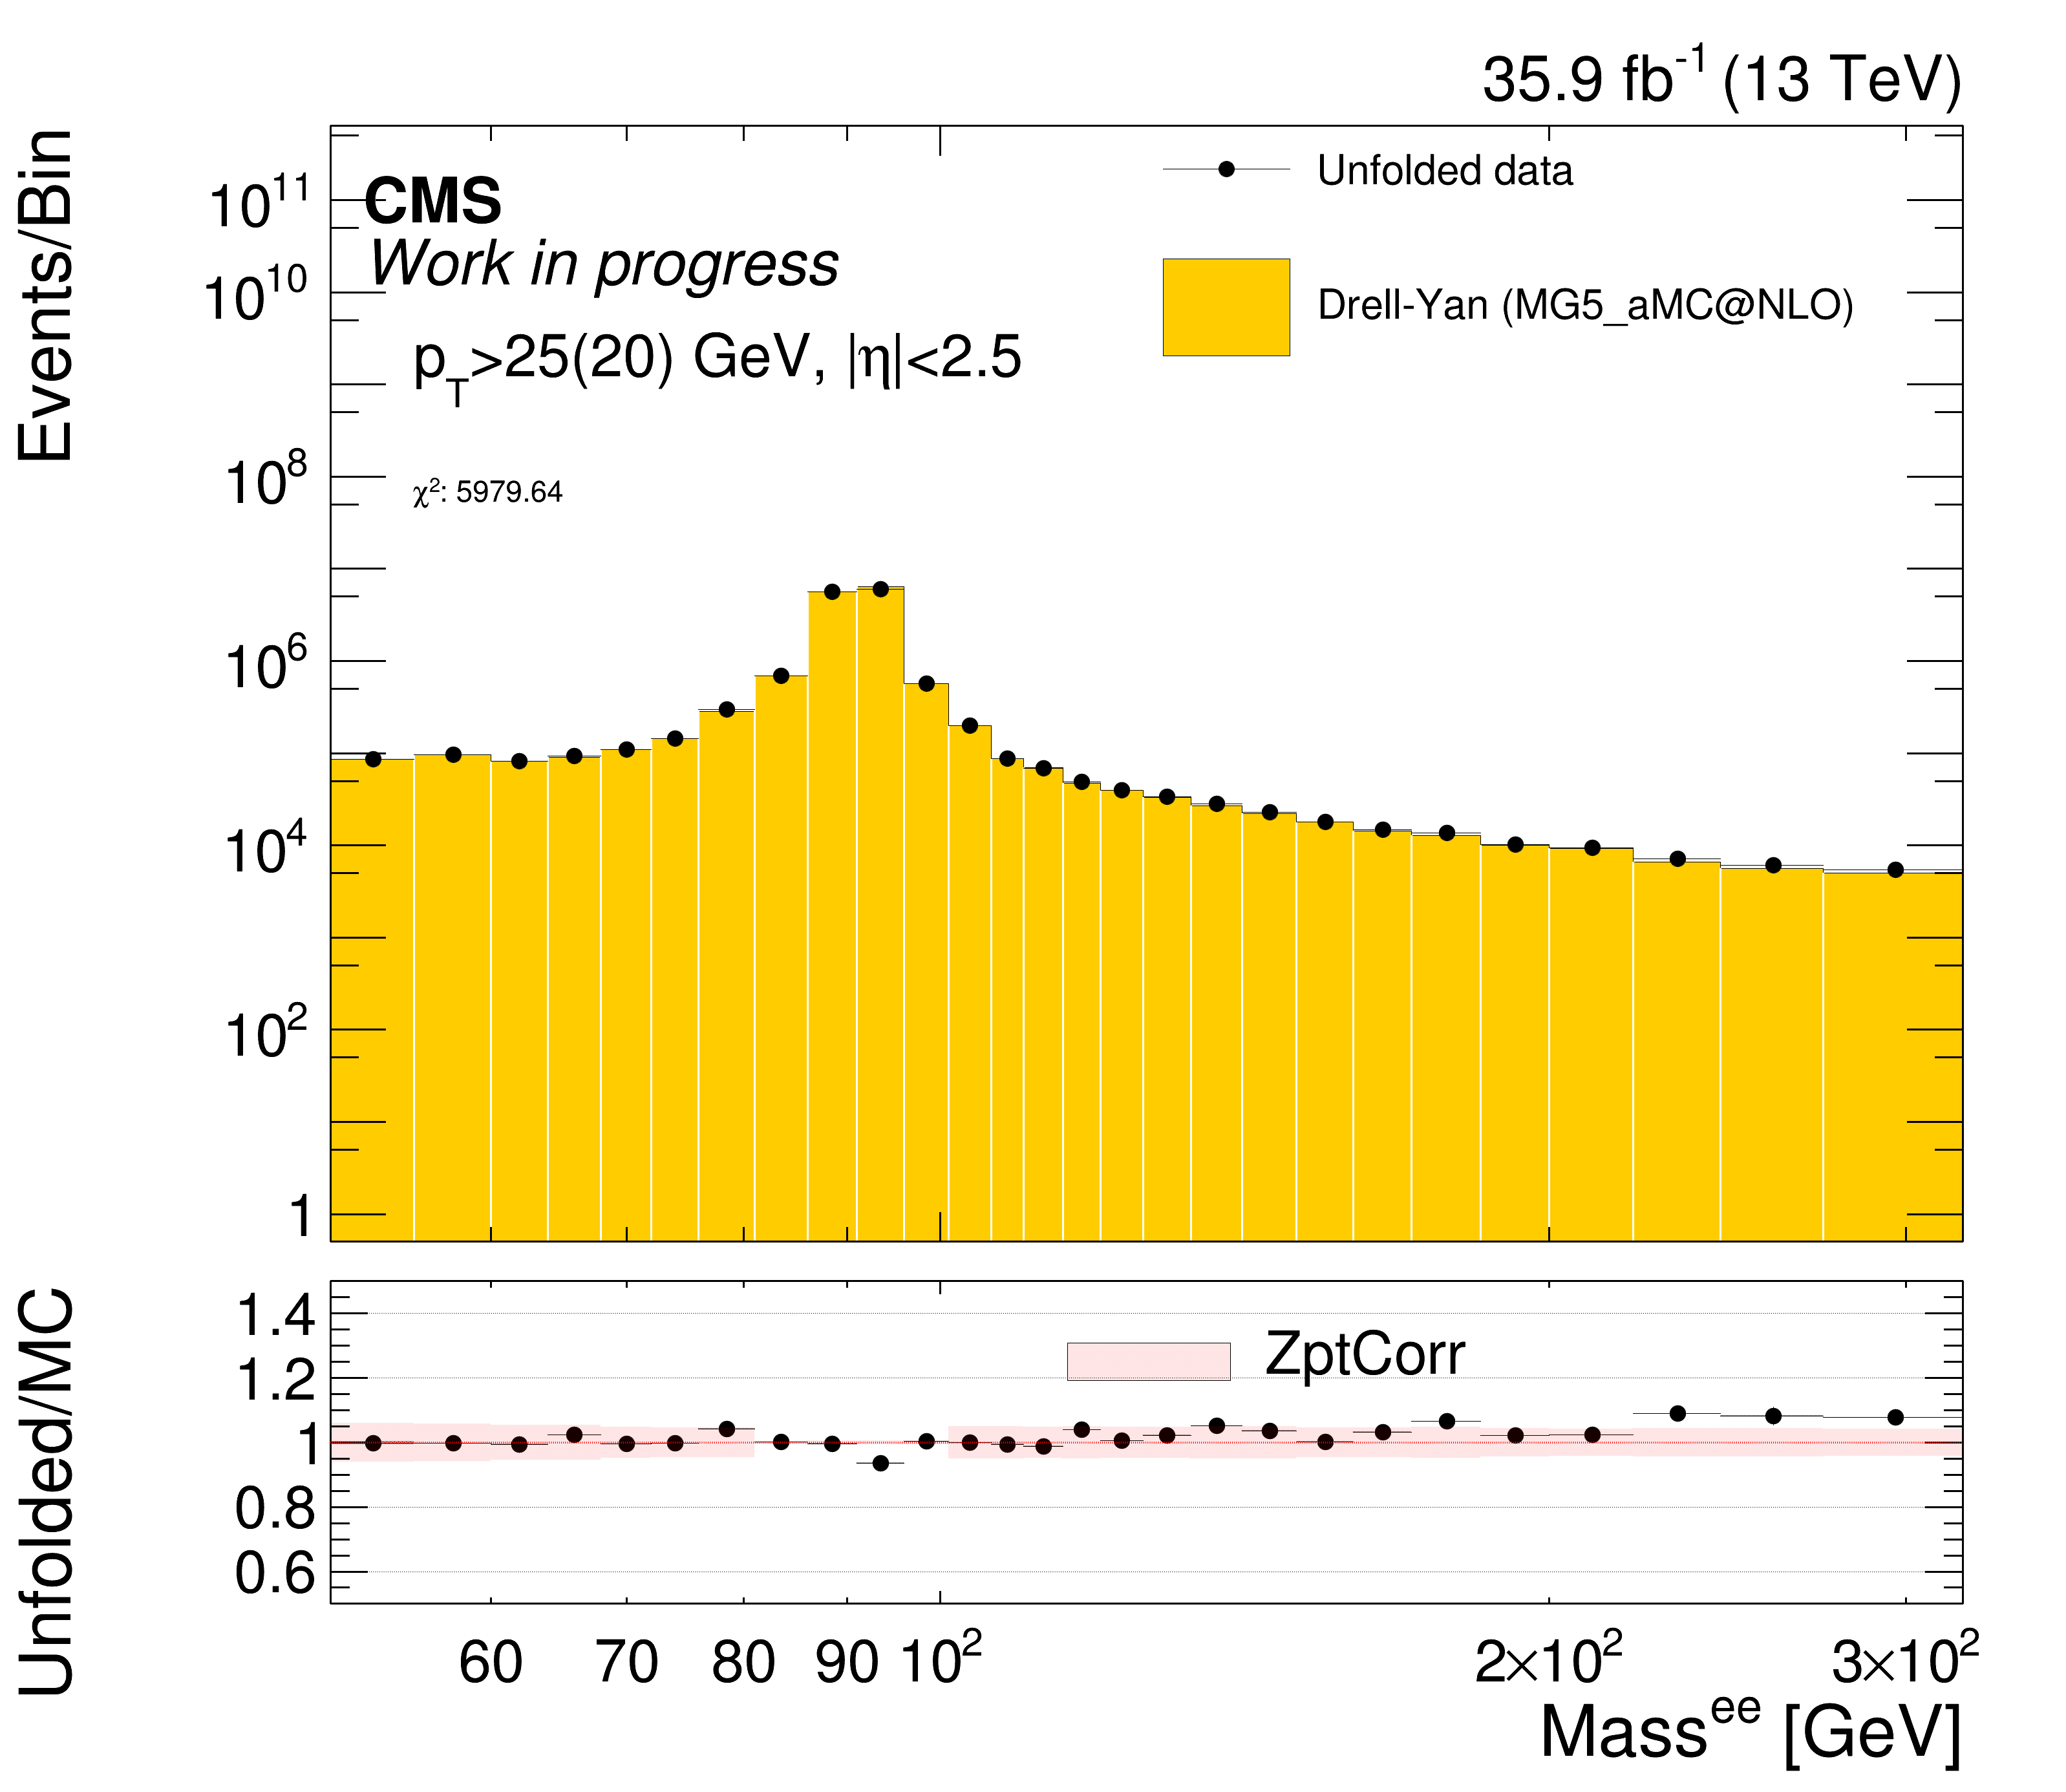

In [14]:
if doSys: 
    for sysName, _ in systematics.items():
        for massBin in range(5):
            detUnfold_muon_2016.drawUnfPlot("Pt", "pt[UO];mass[UOC"+str(massBin)+"]", True, sysName, "DetUnf_M"+str(massBin)+"_", massBin, True)
        detUnfold_muon_2016.drawUnfPlot("Mass", "mass[UO];pt[UOC0]", True, sysName, "DetUnf_")

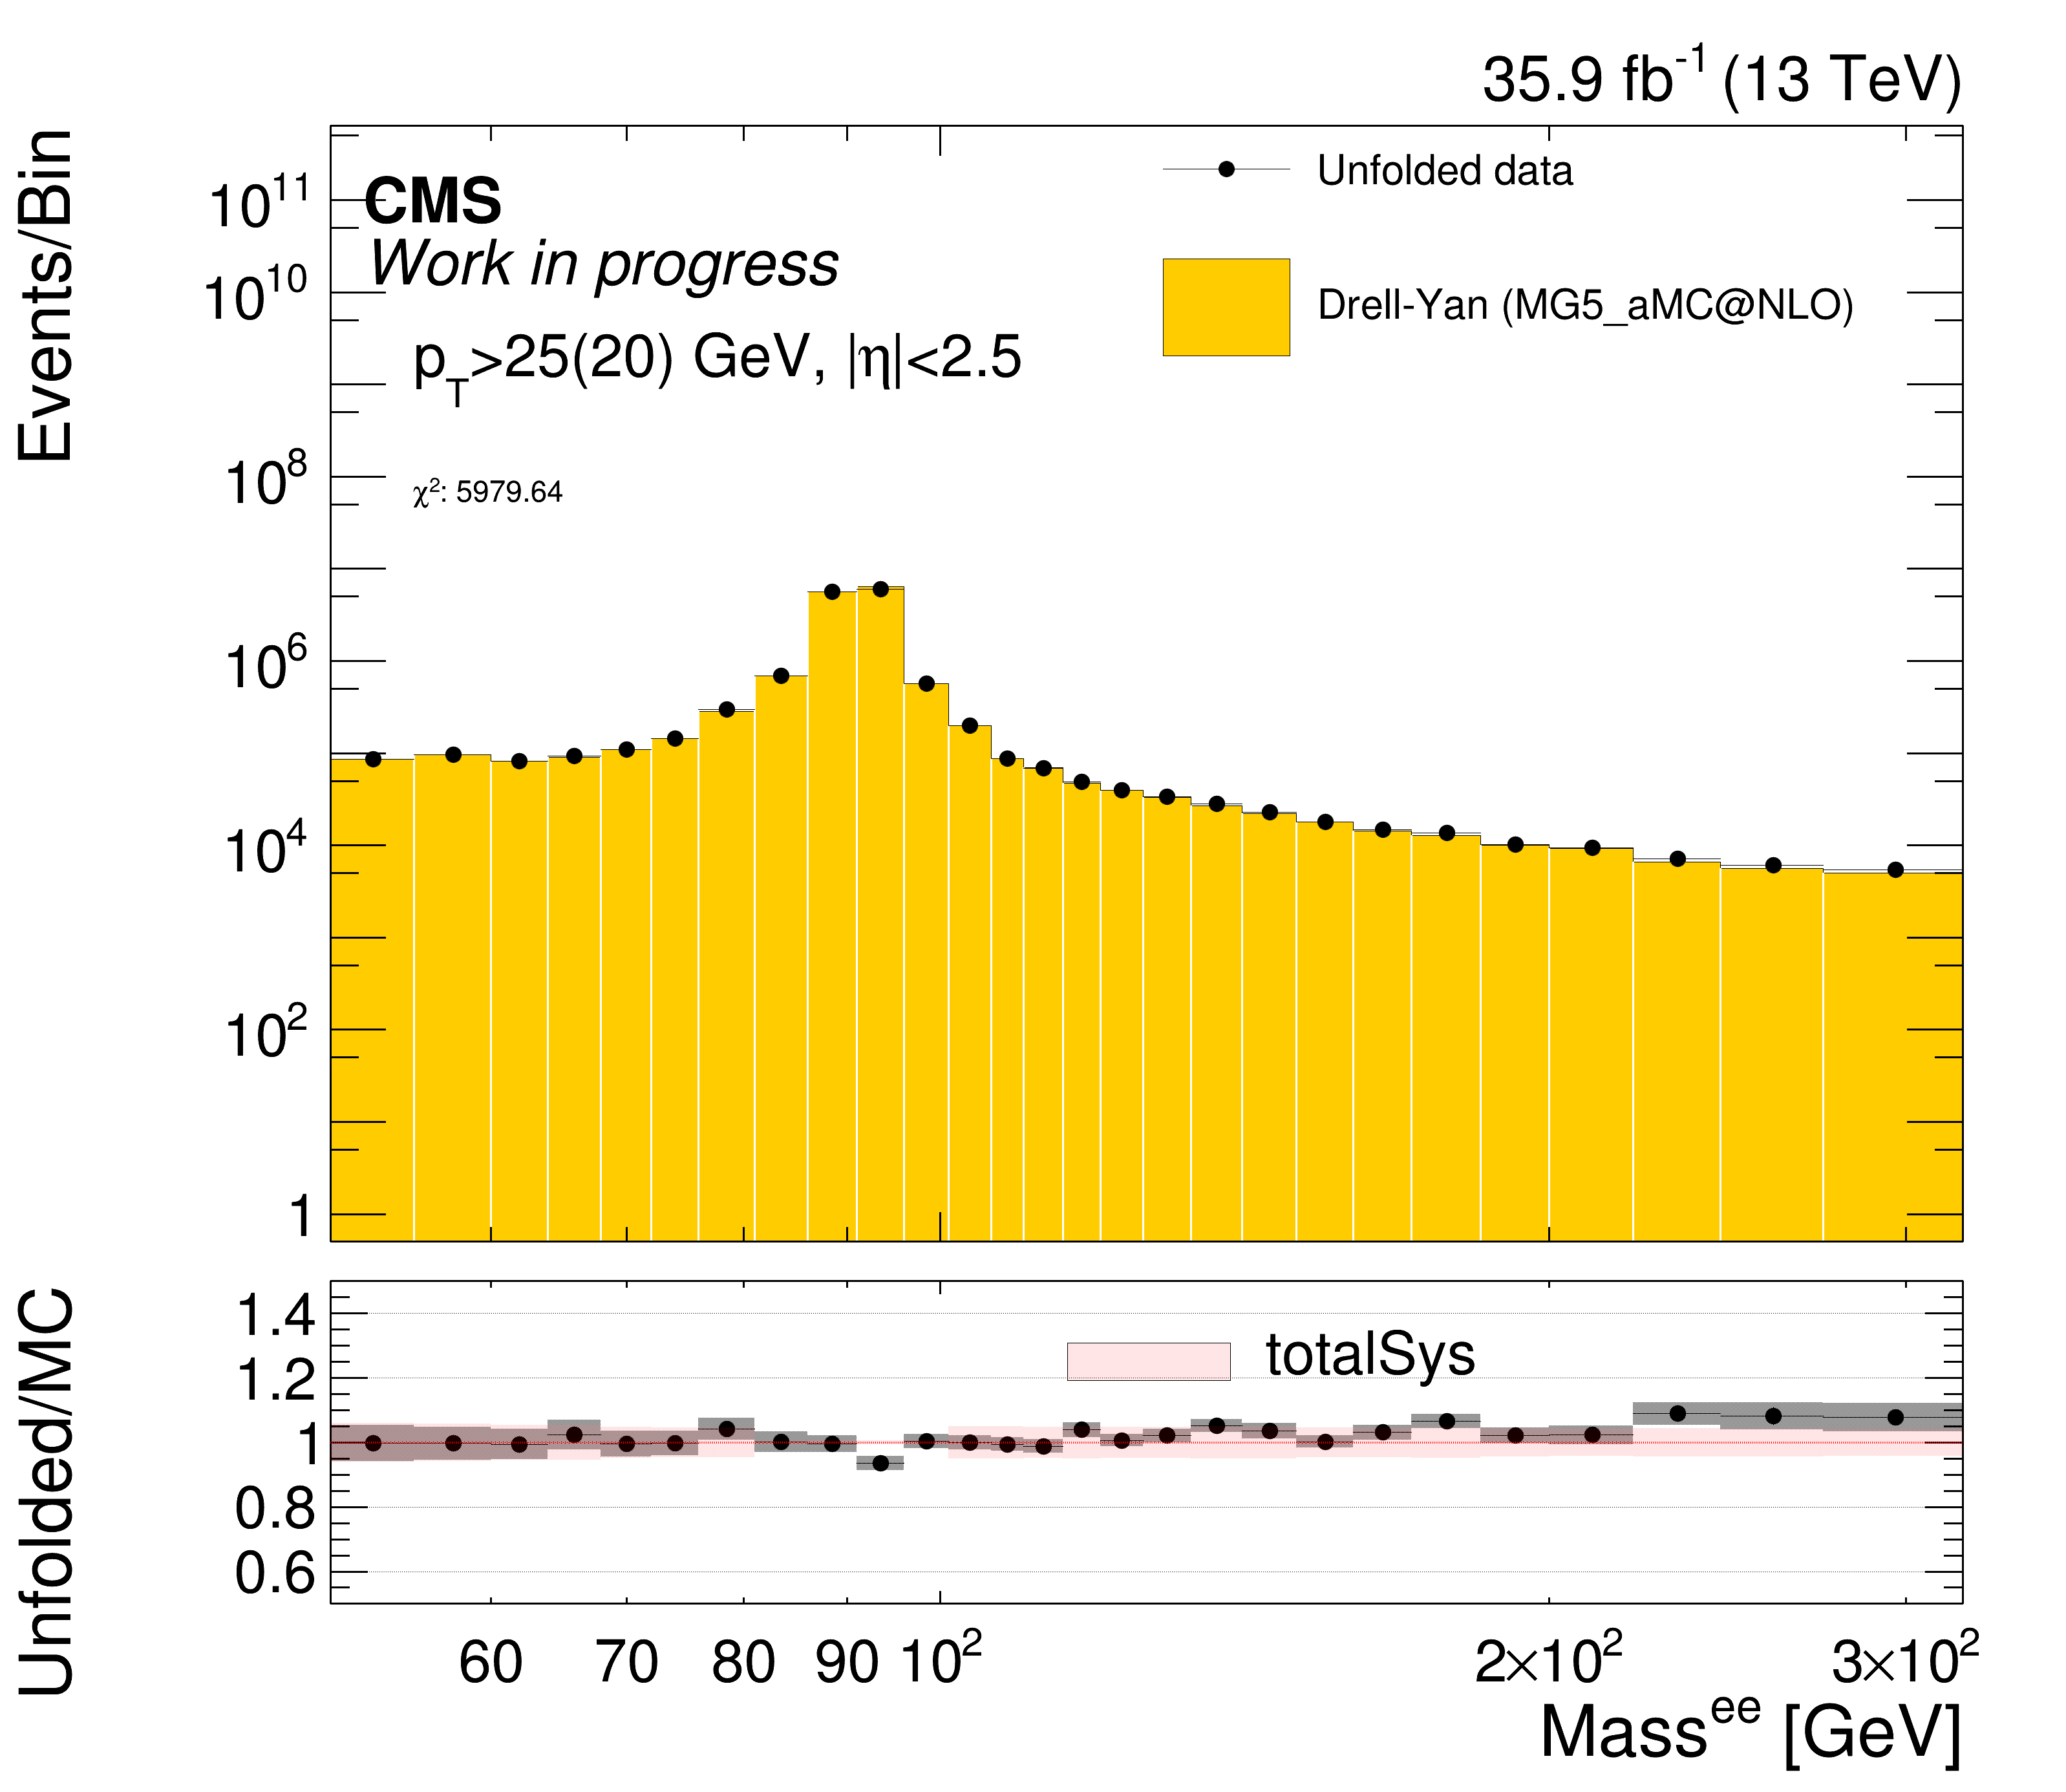

In [15]:
detUnfold_muon_2016.drawUnfPlot("Mass", "mass[UO];pt[UOC0]", True, "totalSys", "DetUnf_")

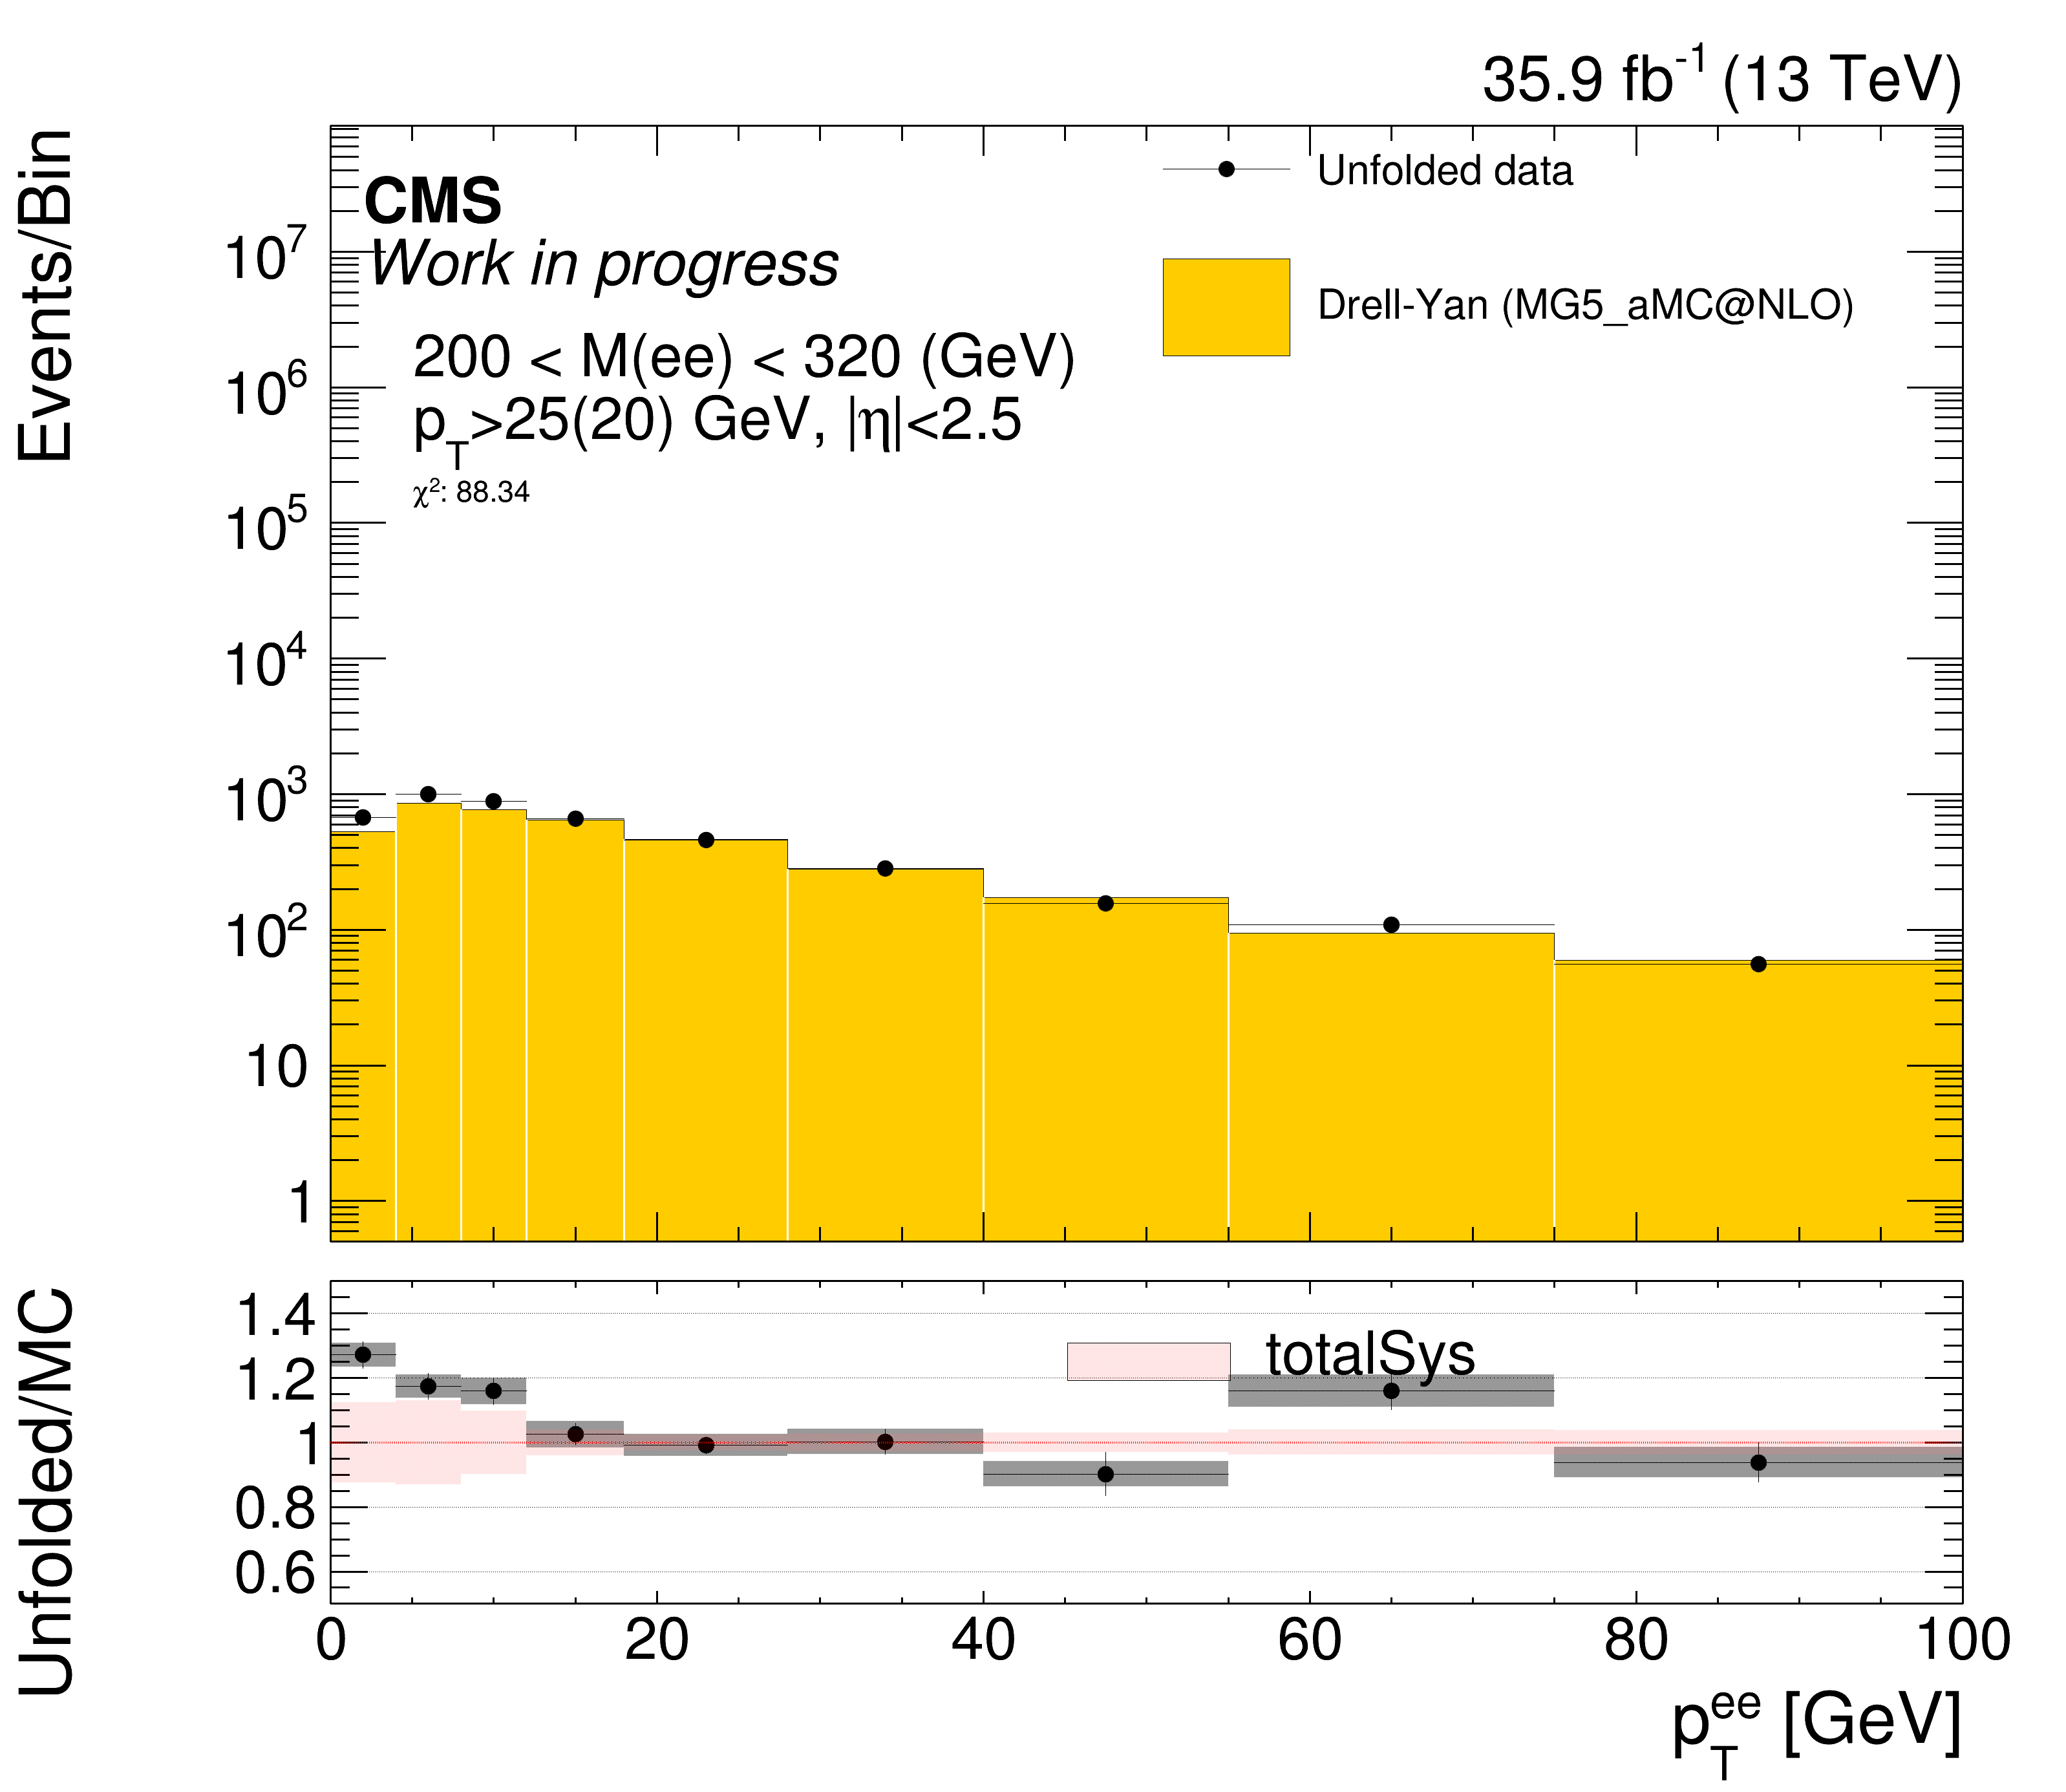

In [16]:
for massBin in range(5):
    detUnfold_muon_2016.drawUnfPlot("Pt", "pt[UO];mass[UOC"+str(massBin)+"]", True, "totalSys", "DetUnf_M"+str(massBin)+"_", massBin, True)

In [17]:
print("set mean values")
detUnfold_muon_2016.setMeanValues(True)
if doSys:
    detUnfold_muon_2016.setSysMeanValues()
    detUnfold_muon_2016.setSysError()
    detUnfold_muon_2016.setTotSysError()

In [18]:
detUnfold_muon_2016.doStatUnfold()

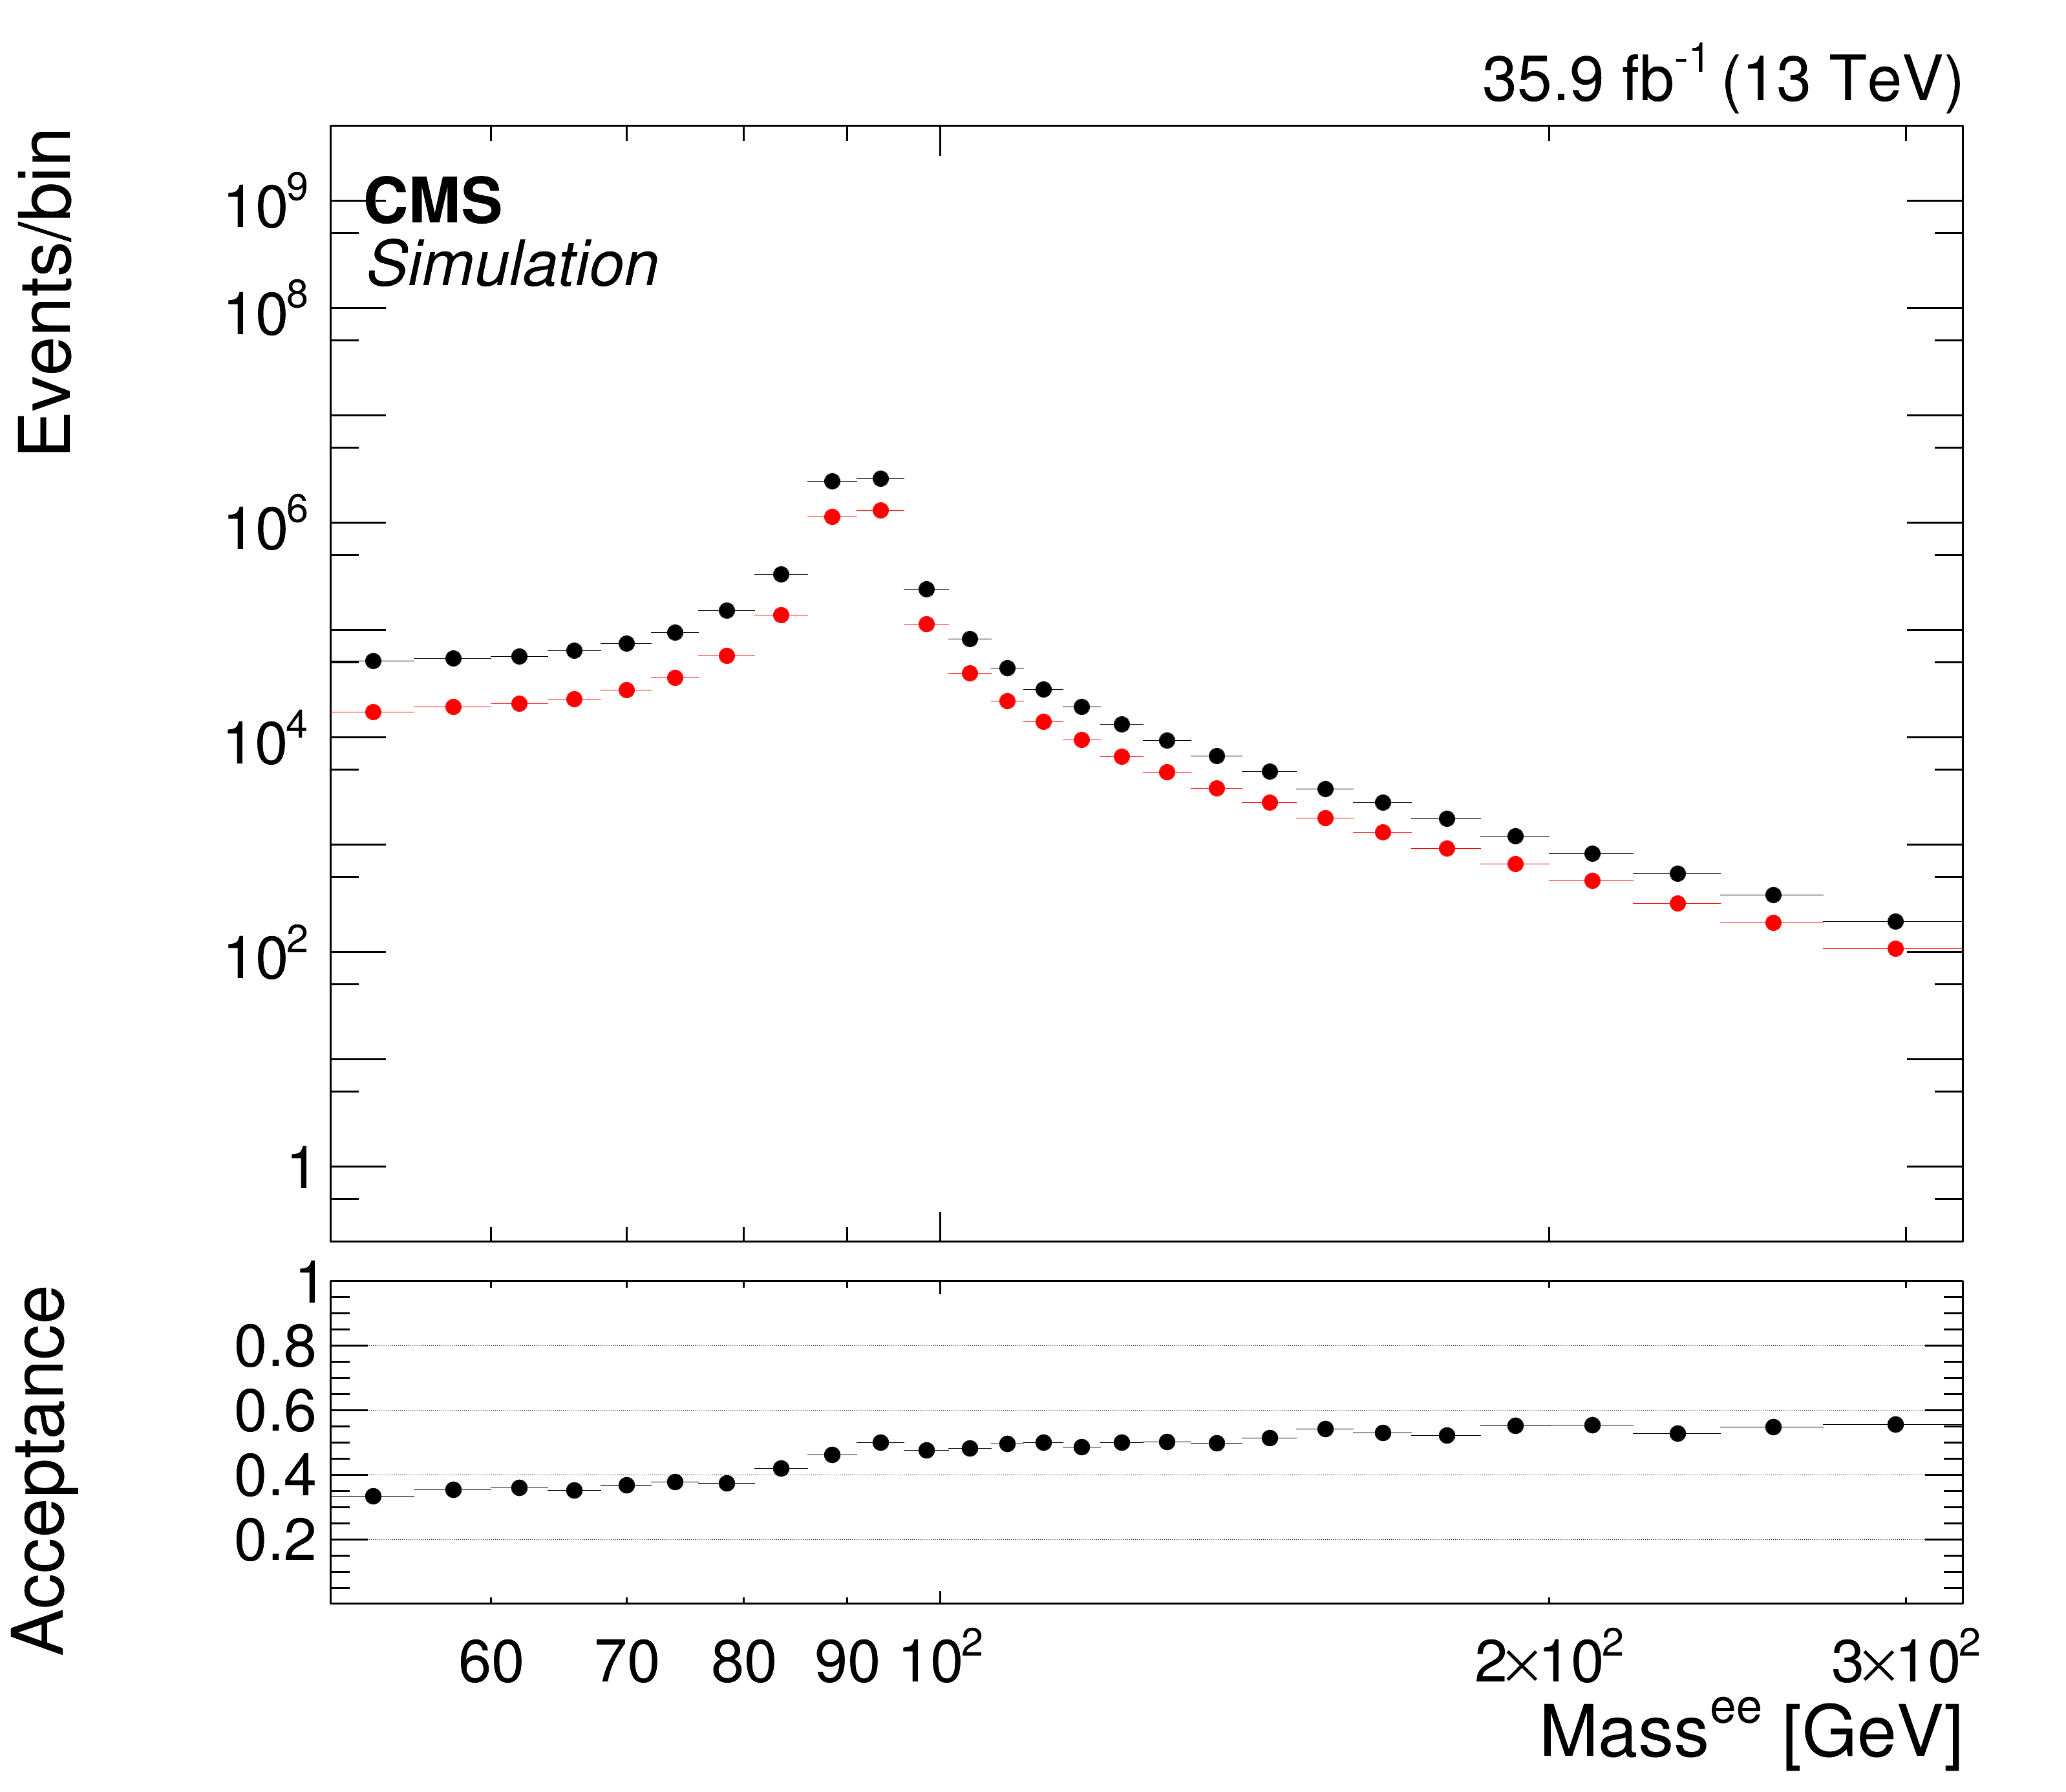

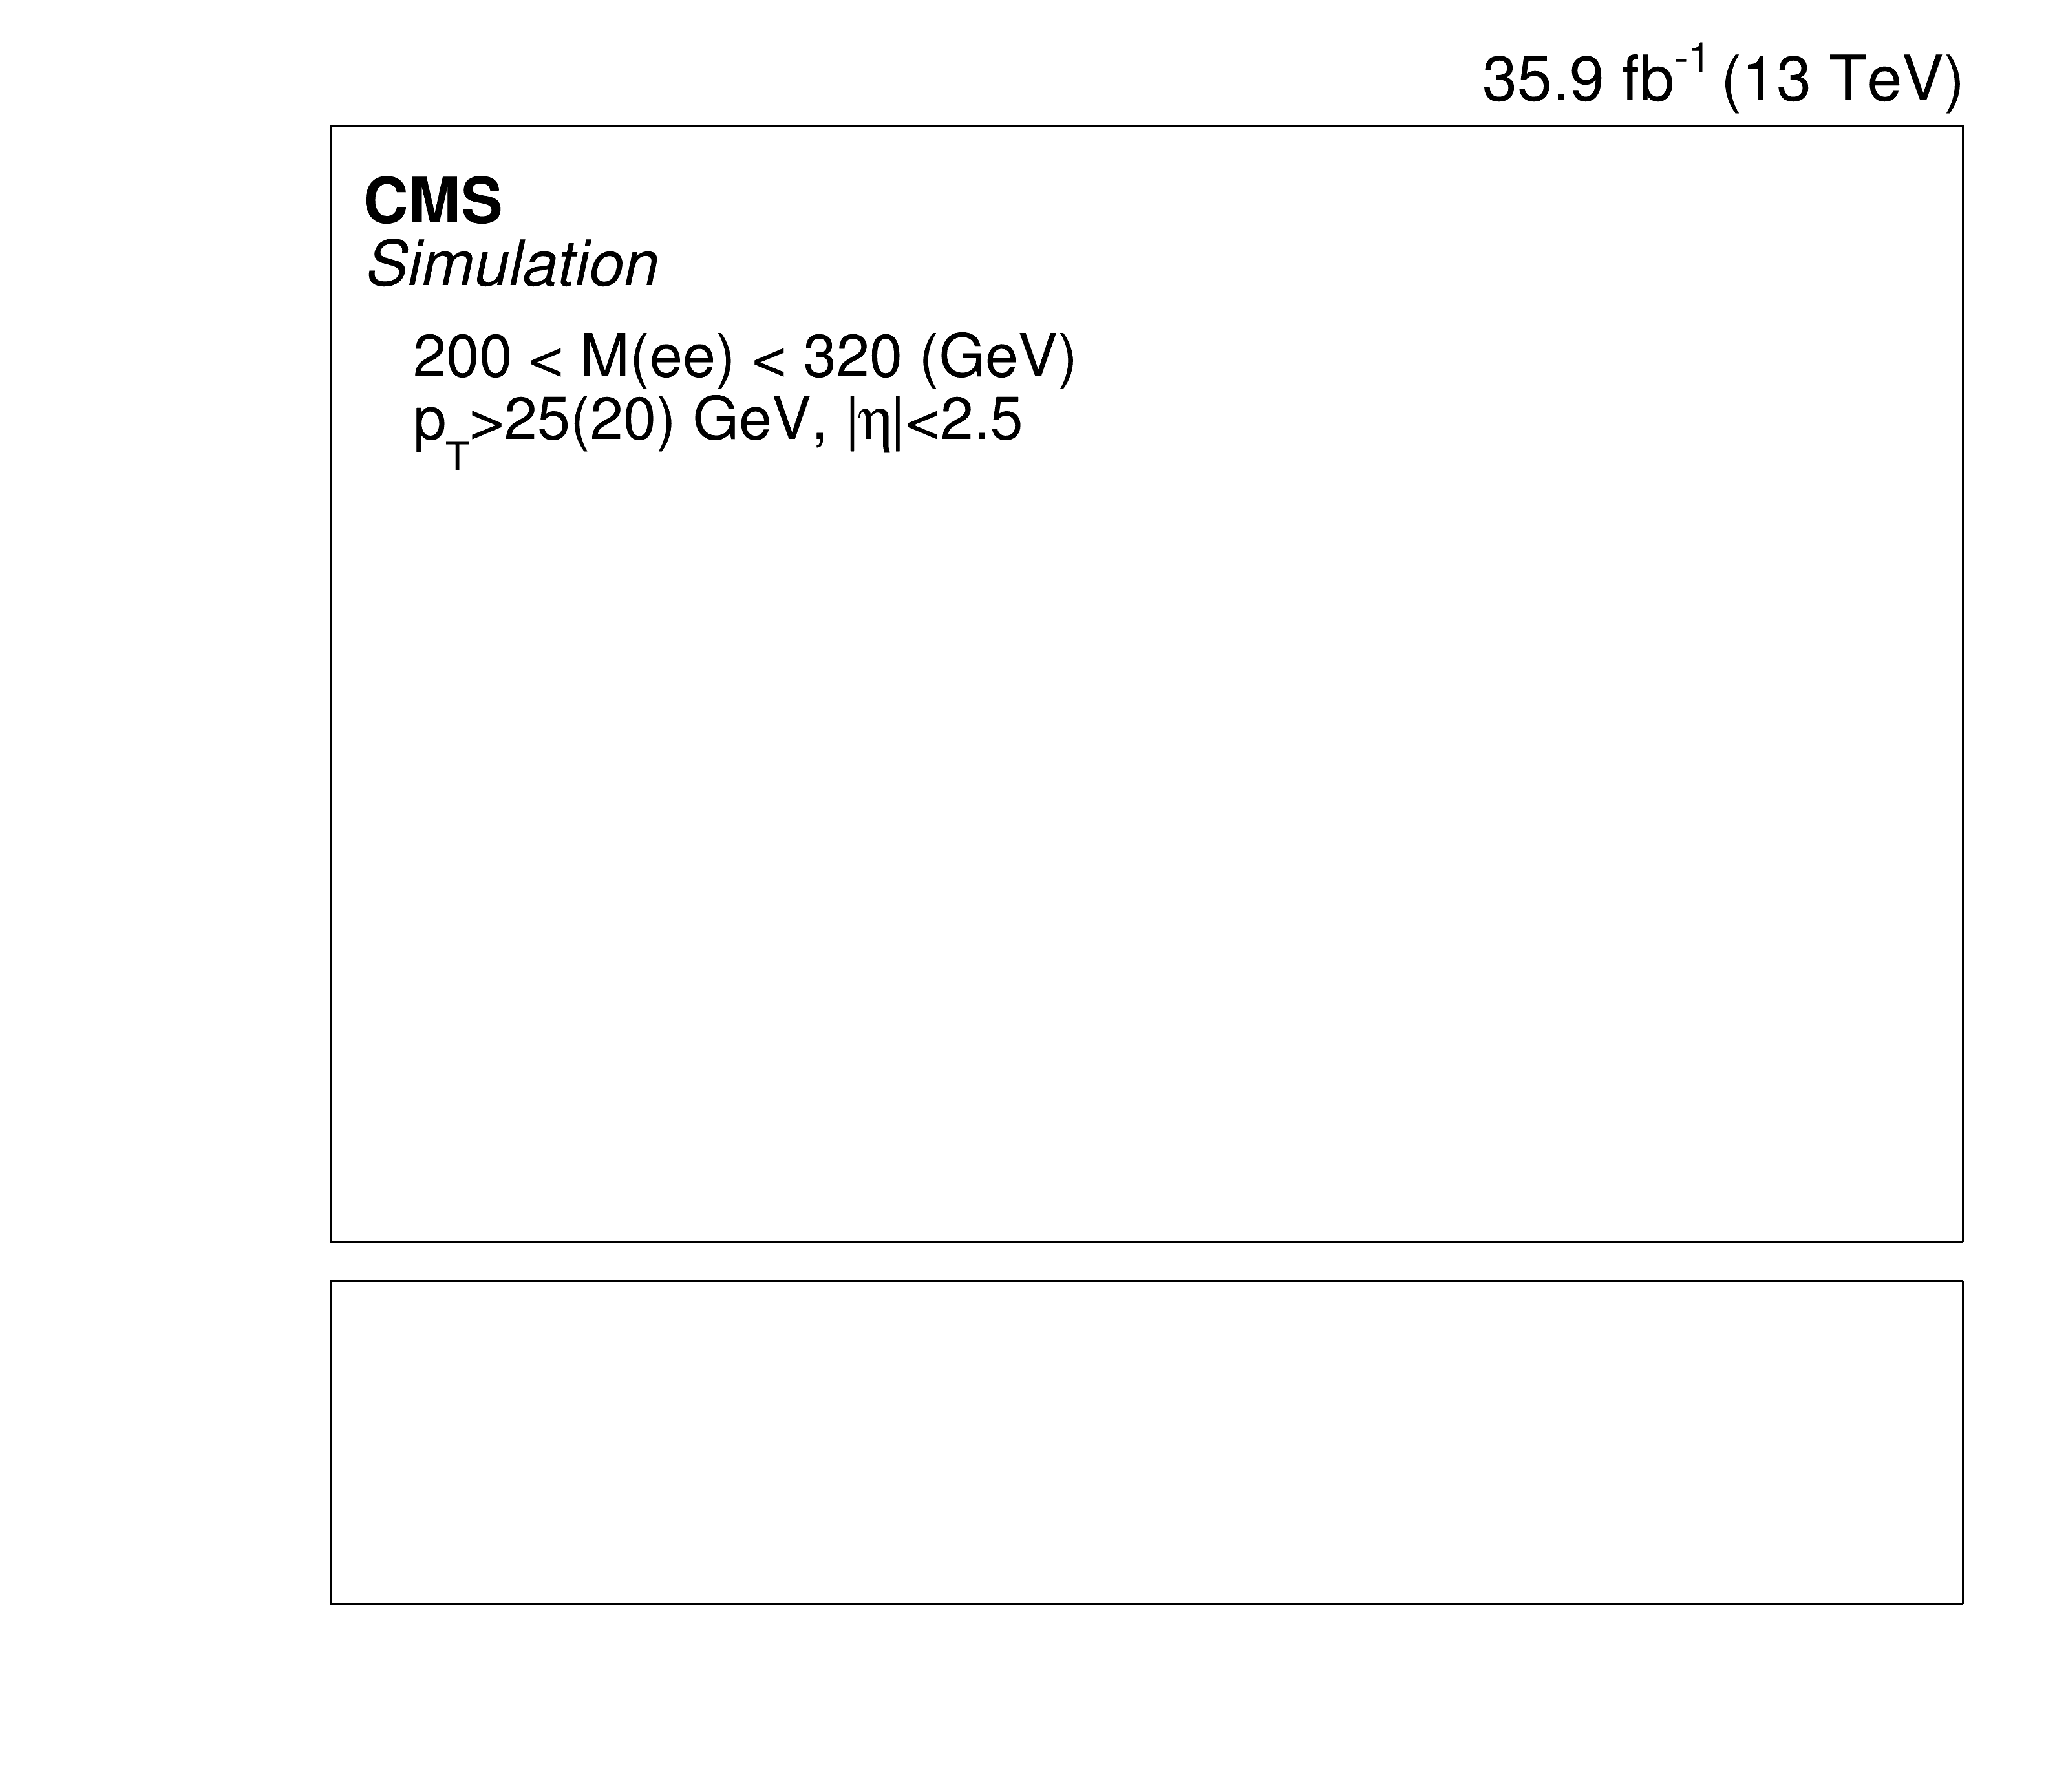

In [19]:
detUnfold_muon_2016.doAcceptance(doSys, False, "DetEfficienyCorr")

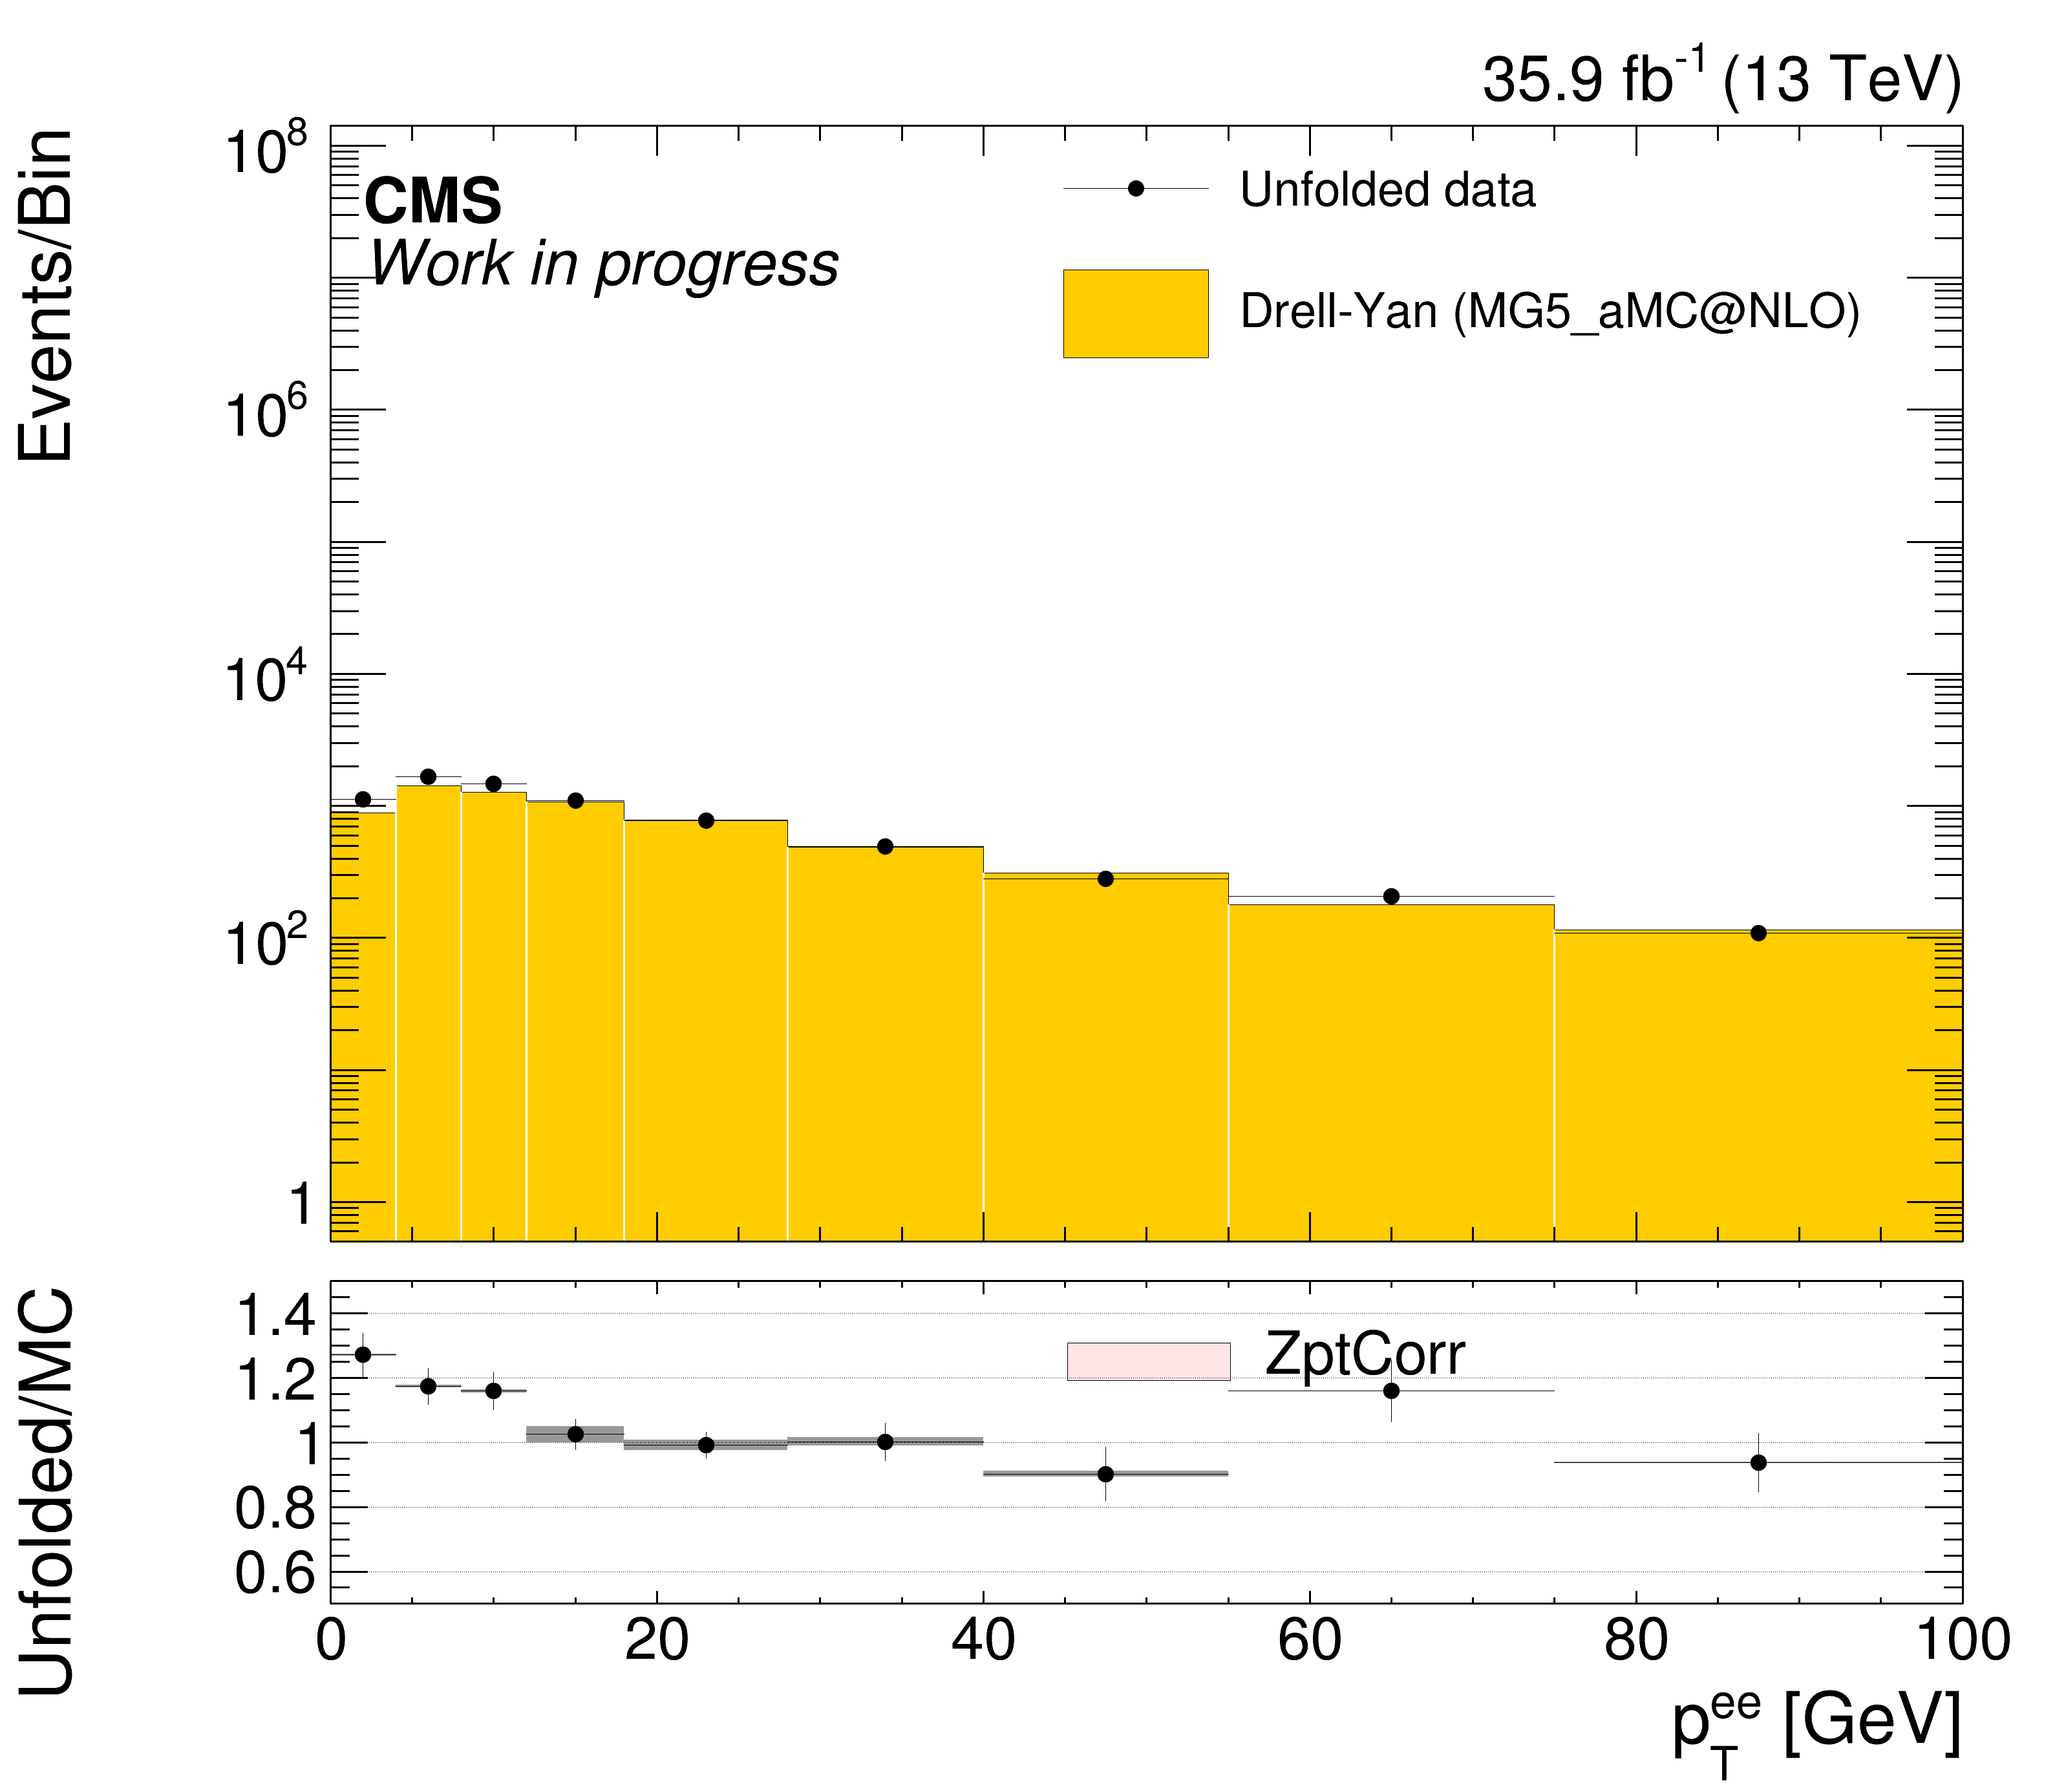

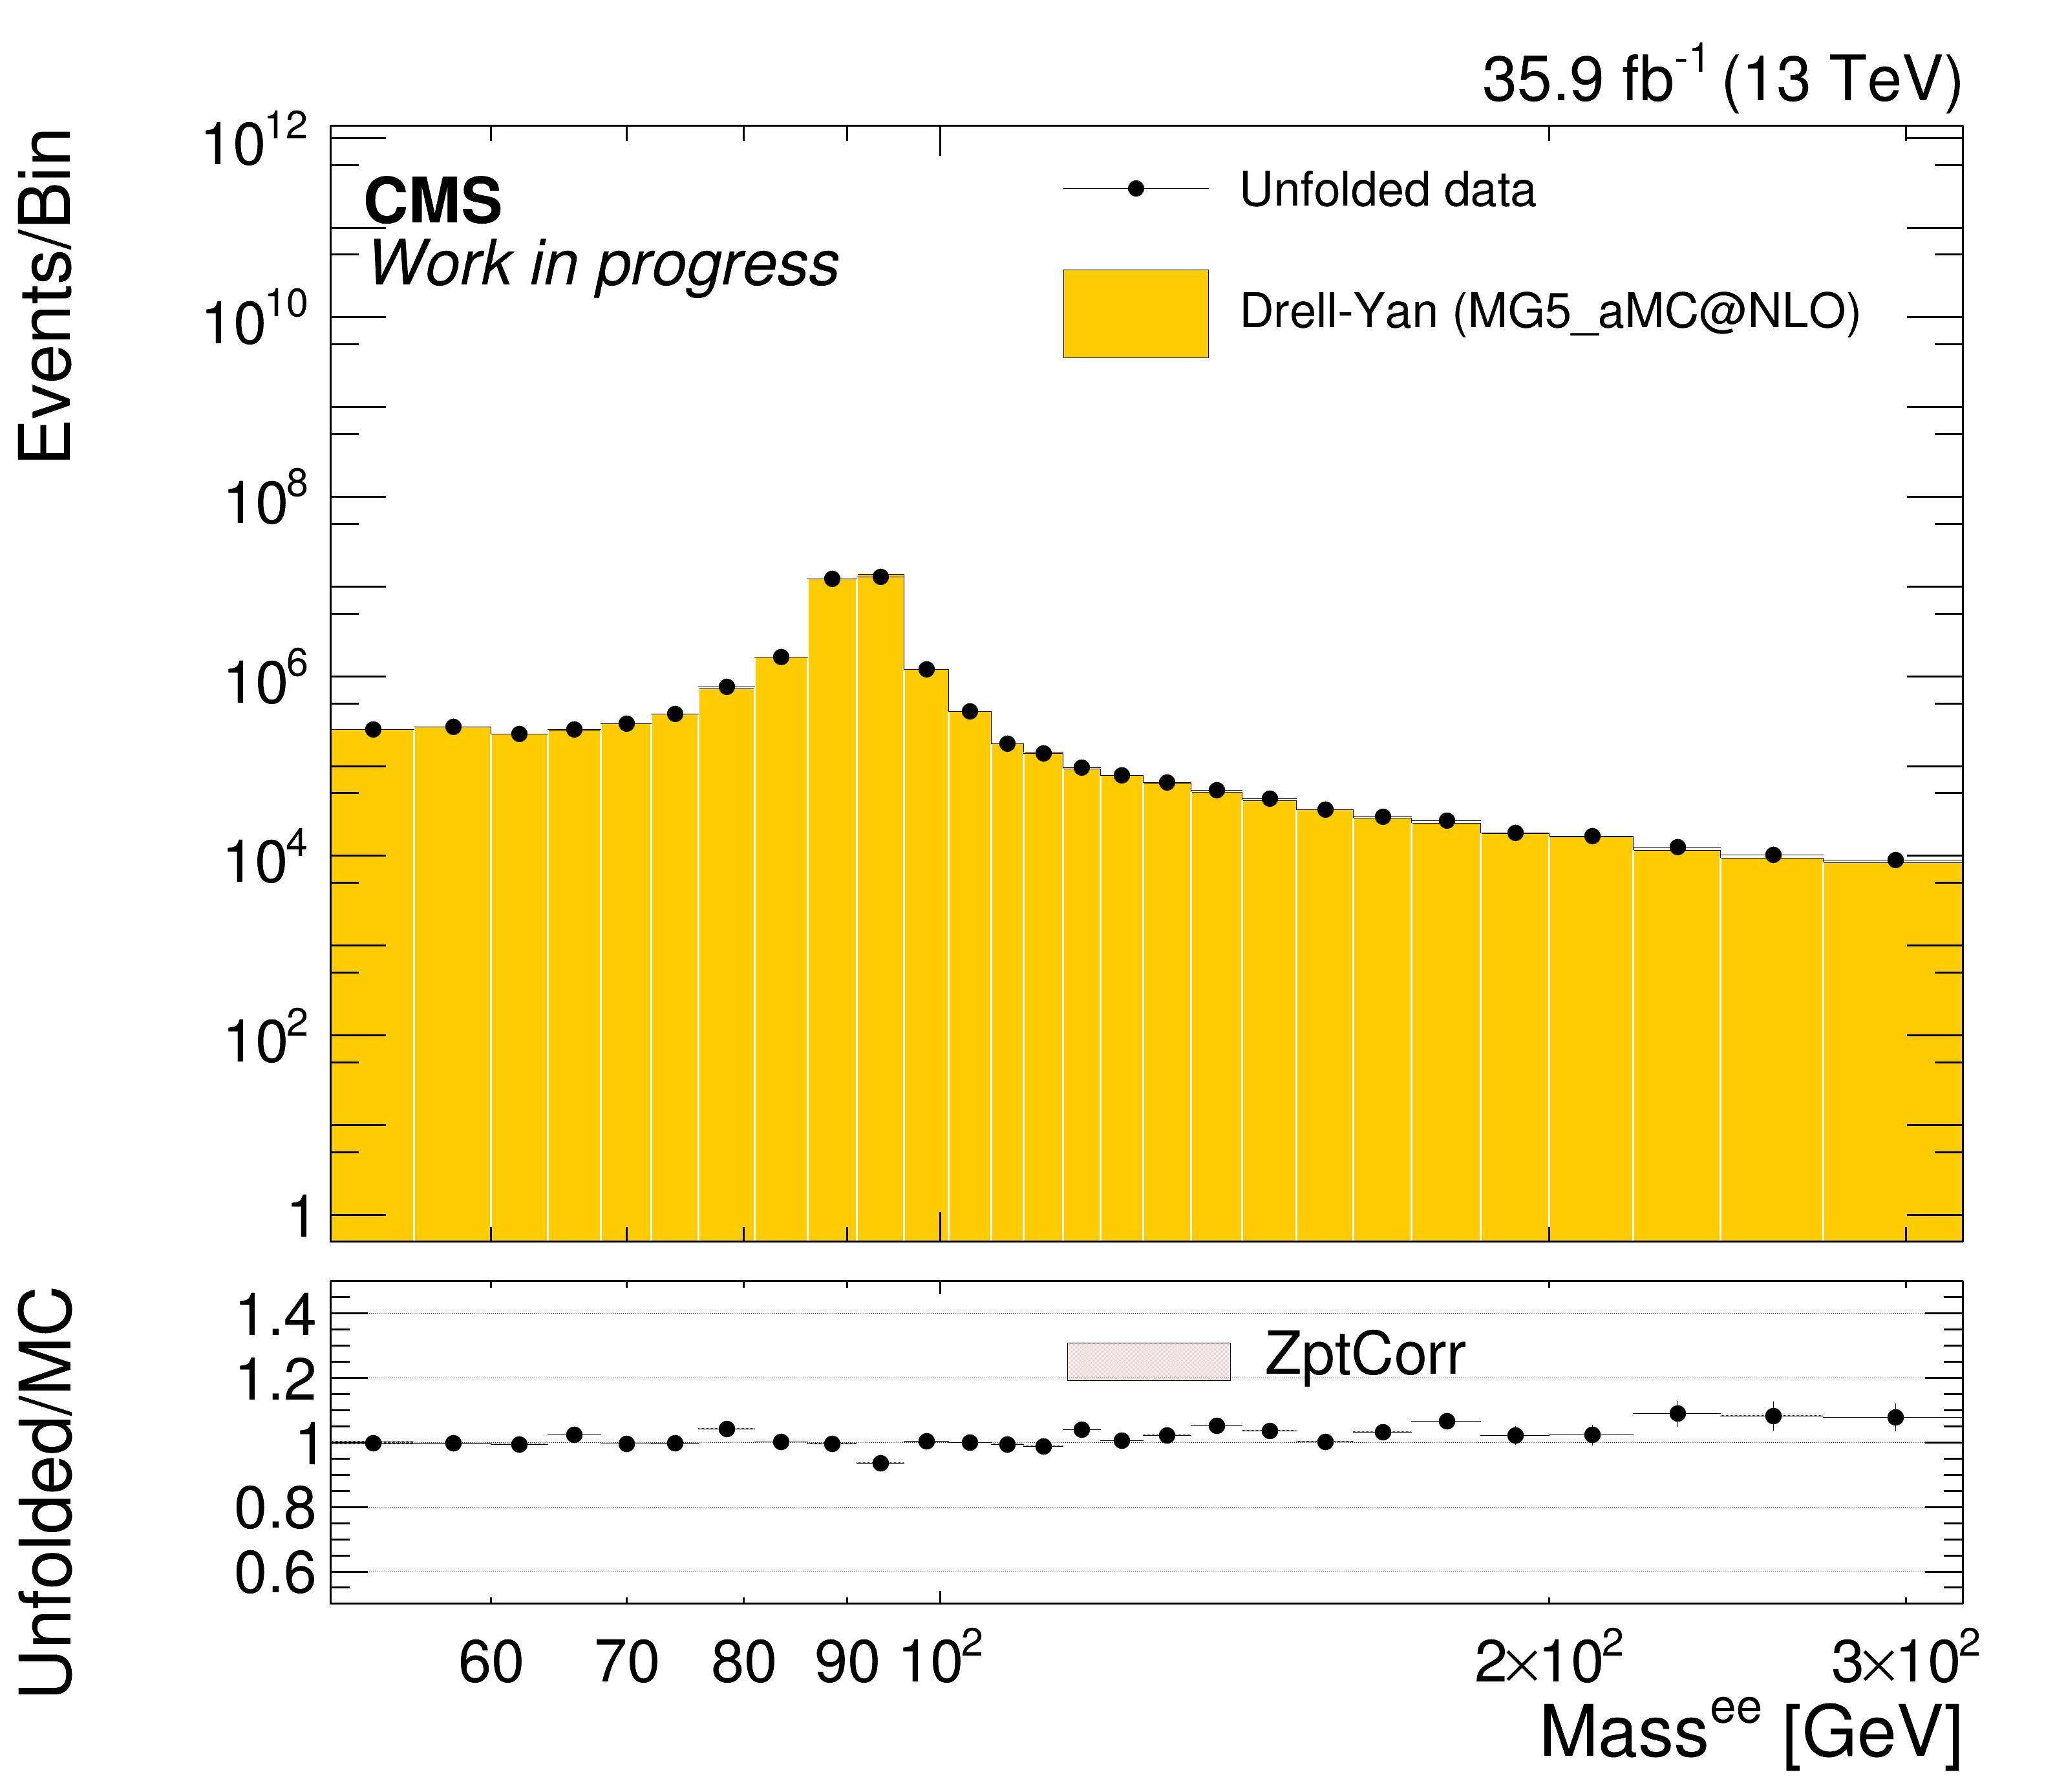

In [20]:
for massBin in range(5):
    detUnfold_muon_2016.drawAcceptPlot("Pt", "pt[UO];mass[UOC"+str(massBin)+"]", True, "", "DetUnfEffCorr_M"+str(massBin)+"_", massBin, True)
detUnfold_muon_2016.drawAcceptPlot("Mass", "mass[UO];pt[UOC0]", True, "", "DetUnfEffCorr_")

if doSys: 
    for sysName, _ in systematics.items():
        for massBin in range(5):
            detUnfold_muon_2016.drawAcceptPlot("Pt", "pt[UO];mass[UOC"+str(massBin)+"]", True, sysName, "DetUnfEffCorr_M"+str(massBin)+"_", massBin, True)
        detUnfold_muon_2016.drawAcceptPlot("Mass", "mass[UO];pt[UOC0]", True, sysName, "DetUnfEffCorr_")

In [21]:
detUnfold_muon_2016.setAcceptMeanValues()
if doSys:
    detUnfold_muon_2016.setAcceptSysMeanValues()
    detUnfold_muon_2016.setAcceptSysError()
    detUnfold_muon_2016.setAcceptTotSysError()

In [22]:
detUnfold_muon_2016.drawSystematics("Pt")
detUnfold_muon_2016.drawSystematics("Mass")

# Unfolding for QED FSR

In [23]:
binDef = "_CoarseCoarse"

phase_space = "Fiducial"

fsrUnfold_muon_2016 = an.ISRAnalysis(year, channel, True, "fsr_matrix", 
                                     "Dressed_DRp1_Dressed_DR4PI_"+phase_space, "Dressed_DRp1_Dressed_DR4PI", binDef)


In [24]:
if doSys :
    fsr_systematics = {
                       "Scale(#mu_{F}/#mu_{R})":["ScaleABUp", "ScaleABDown", "ScaleAUp", "ScaleADown", "ScaleBUp", "ScaleBDown"], "AlphaS":["AlphaSUp", "AlphaSDown"],
                      
                       "PDF":["PDFerror{:0>3}".format(str(i)) for i in range(1,101)],
                       "Unfold (aMC@NLO vs POWHEG)":["POWHEG","Nominal"], 
                       "FSR (PHOTOS vs PYTHIA)": ["PHOTOS","PYTHIA"]}
    
    for sysName, postfixs in fsr_systematics.items():
        for postfix in postfixs:
            fsrUnfold_muon_2016.setSystematics(sysName, postfix) # Create TUnfoldDensity objects for systematics
            
            if "Unfold" in sysName or "FSR" in sysName or sysName == "PDF" or sysName == "Scale(#mu_{F}/#mu_{R})" or sysName == "AlphaS":
                fsrUnfold_muon_2016.setInputHist(False, True, detUnfold_muon_2016.getISRUnfold(), "", True, sysName, postfix)
                fsrUnfold_muon_2016.subFake(True, sysName, postfix, True, "dressed_level_DY_fake")

In [25]:
fsrUnfold_muon_2016.setInputHist(False, True, detUnfold_muon_2016.getISRUnfold()) # Set nominal input using previous unfolding result
fsrUnfold_muon_2016.subFake(False, "Nominal", "", True, "dressed_level_DY_fake")
fsrUnfold_muon_2016.setFromPreviousUnfold(detUnfold_muon_2016.getISRUnfold()) # Set using previous unfolding result for systematics

if doSys:
    for sysName, postfixs in systematics.items():
        for postfix in postfixs:
            fsrUnfold_muon_2016.subFake(True, sysName, postfix, True, "dressed_level_DY_fake")

In [26]:
fsrUnfold_muon_2016.doUnfold() # do nominal unfold
if doSys : 
    fsrUnfold_muon_2016.doUnfold(doSys) # do unfold for systematic

fsrUnfold_muon_2016.setMeanValues(True)
if doSys:
    fsrUnfold_muon_2016.setSysMeanValues()
    fsrUnfold_muon_2016.setSysError()
    fsrUnfold_muon_2016.setTotSysError()

In [27]:
fsrUnfold_muon_2016.doStatUnfold() # NOTE: doStatUnfold() must be done after setMeanValues() and before any other processes
                                   # Don't know why exactly...

In [28]:
fsrUnfold_muon_2016.setStatError() # Update stat. error

In [29]:
fsrUnfold_muon_2016.drawResponseM("Pt", "", "", False)
fsrUnfold_muon_2016.drawResponseM("Mass","","",False)

In [30]:
#fsrUnfold_muon_2016.setInputHist(False, True, detUnfold_muon_2016.getISRUnfold(), "", True, "Unfold", "POWHEG")

In [31]:
fsrUnfold_muon_2016.checkMatrixCond()
fsrUnfold_muon_2016.checkMatrixCond("Pt")

<ROOT.TVectorT<double> object ("TVectorT<double>") at 0x8bb7d78>

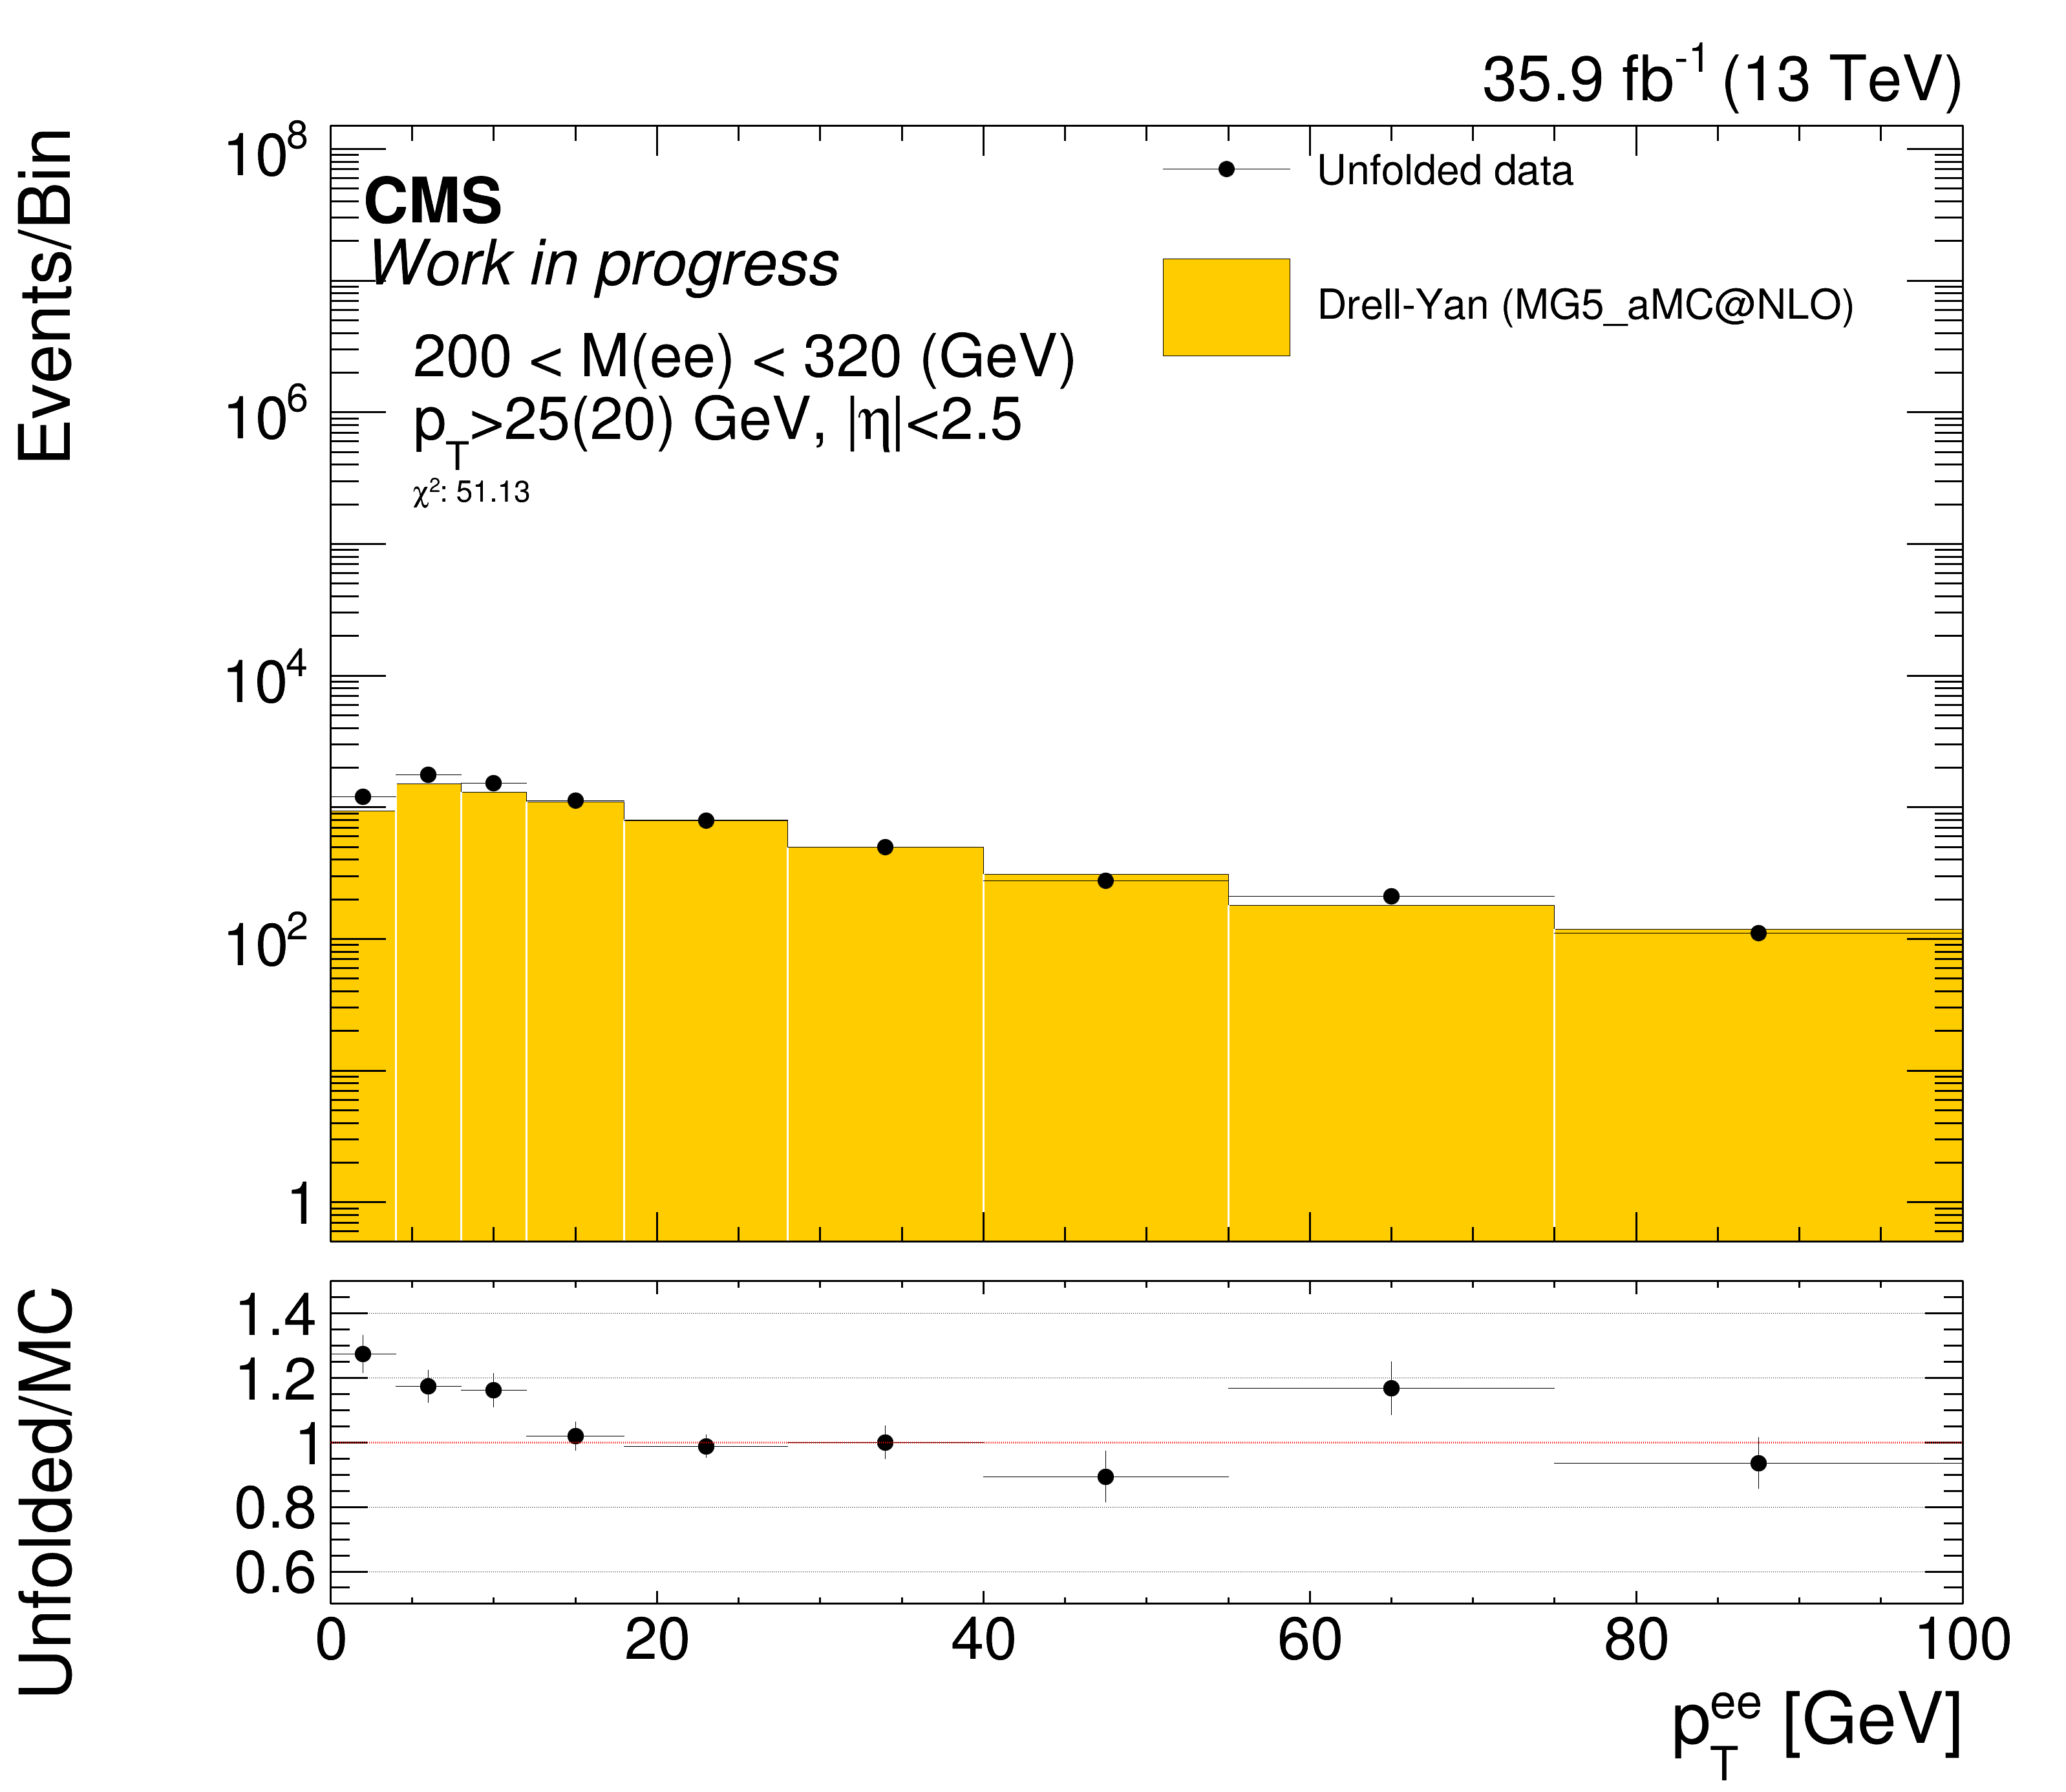

In [32]:
for massBin in range(5):
    fsrUnfold_muon_2016.drawUnfPlot("Pt", "pt[UO];mass[UOC"+str(massBin)+"]", True, "", "FSRUnf_M"+str(massBin)+"_", massBin, True)
    

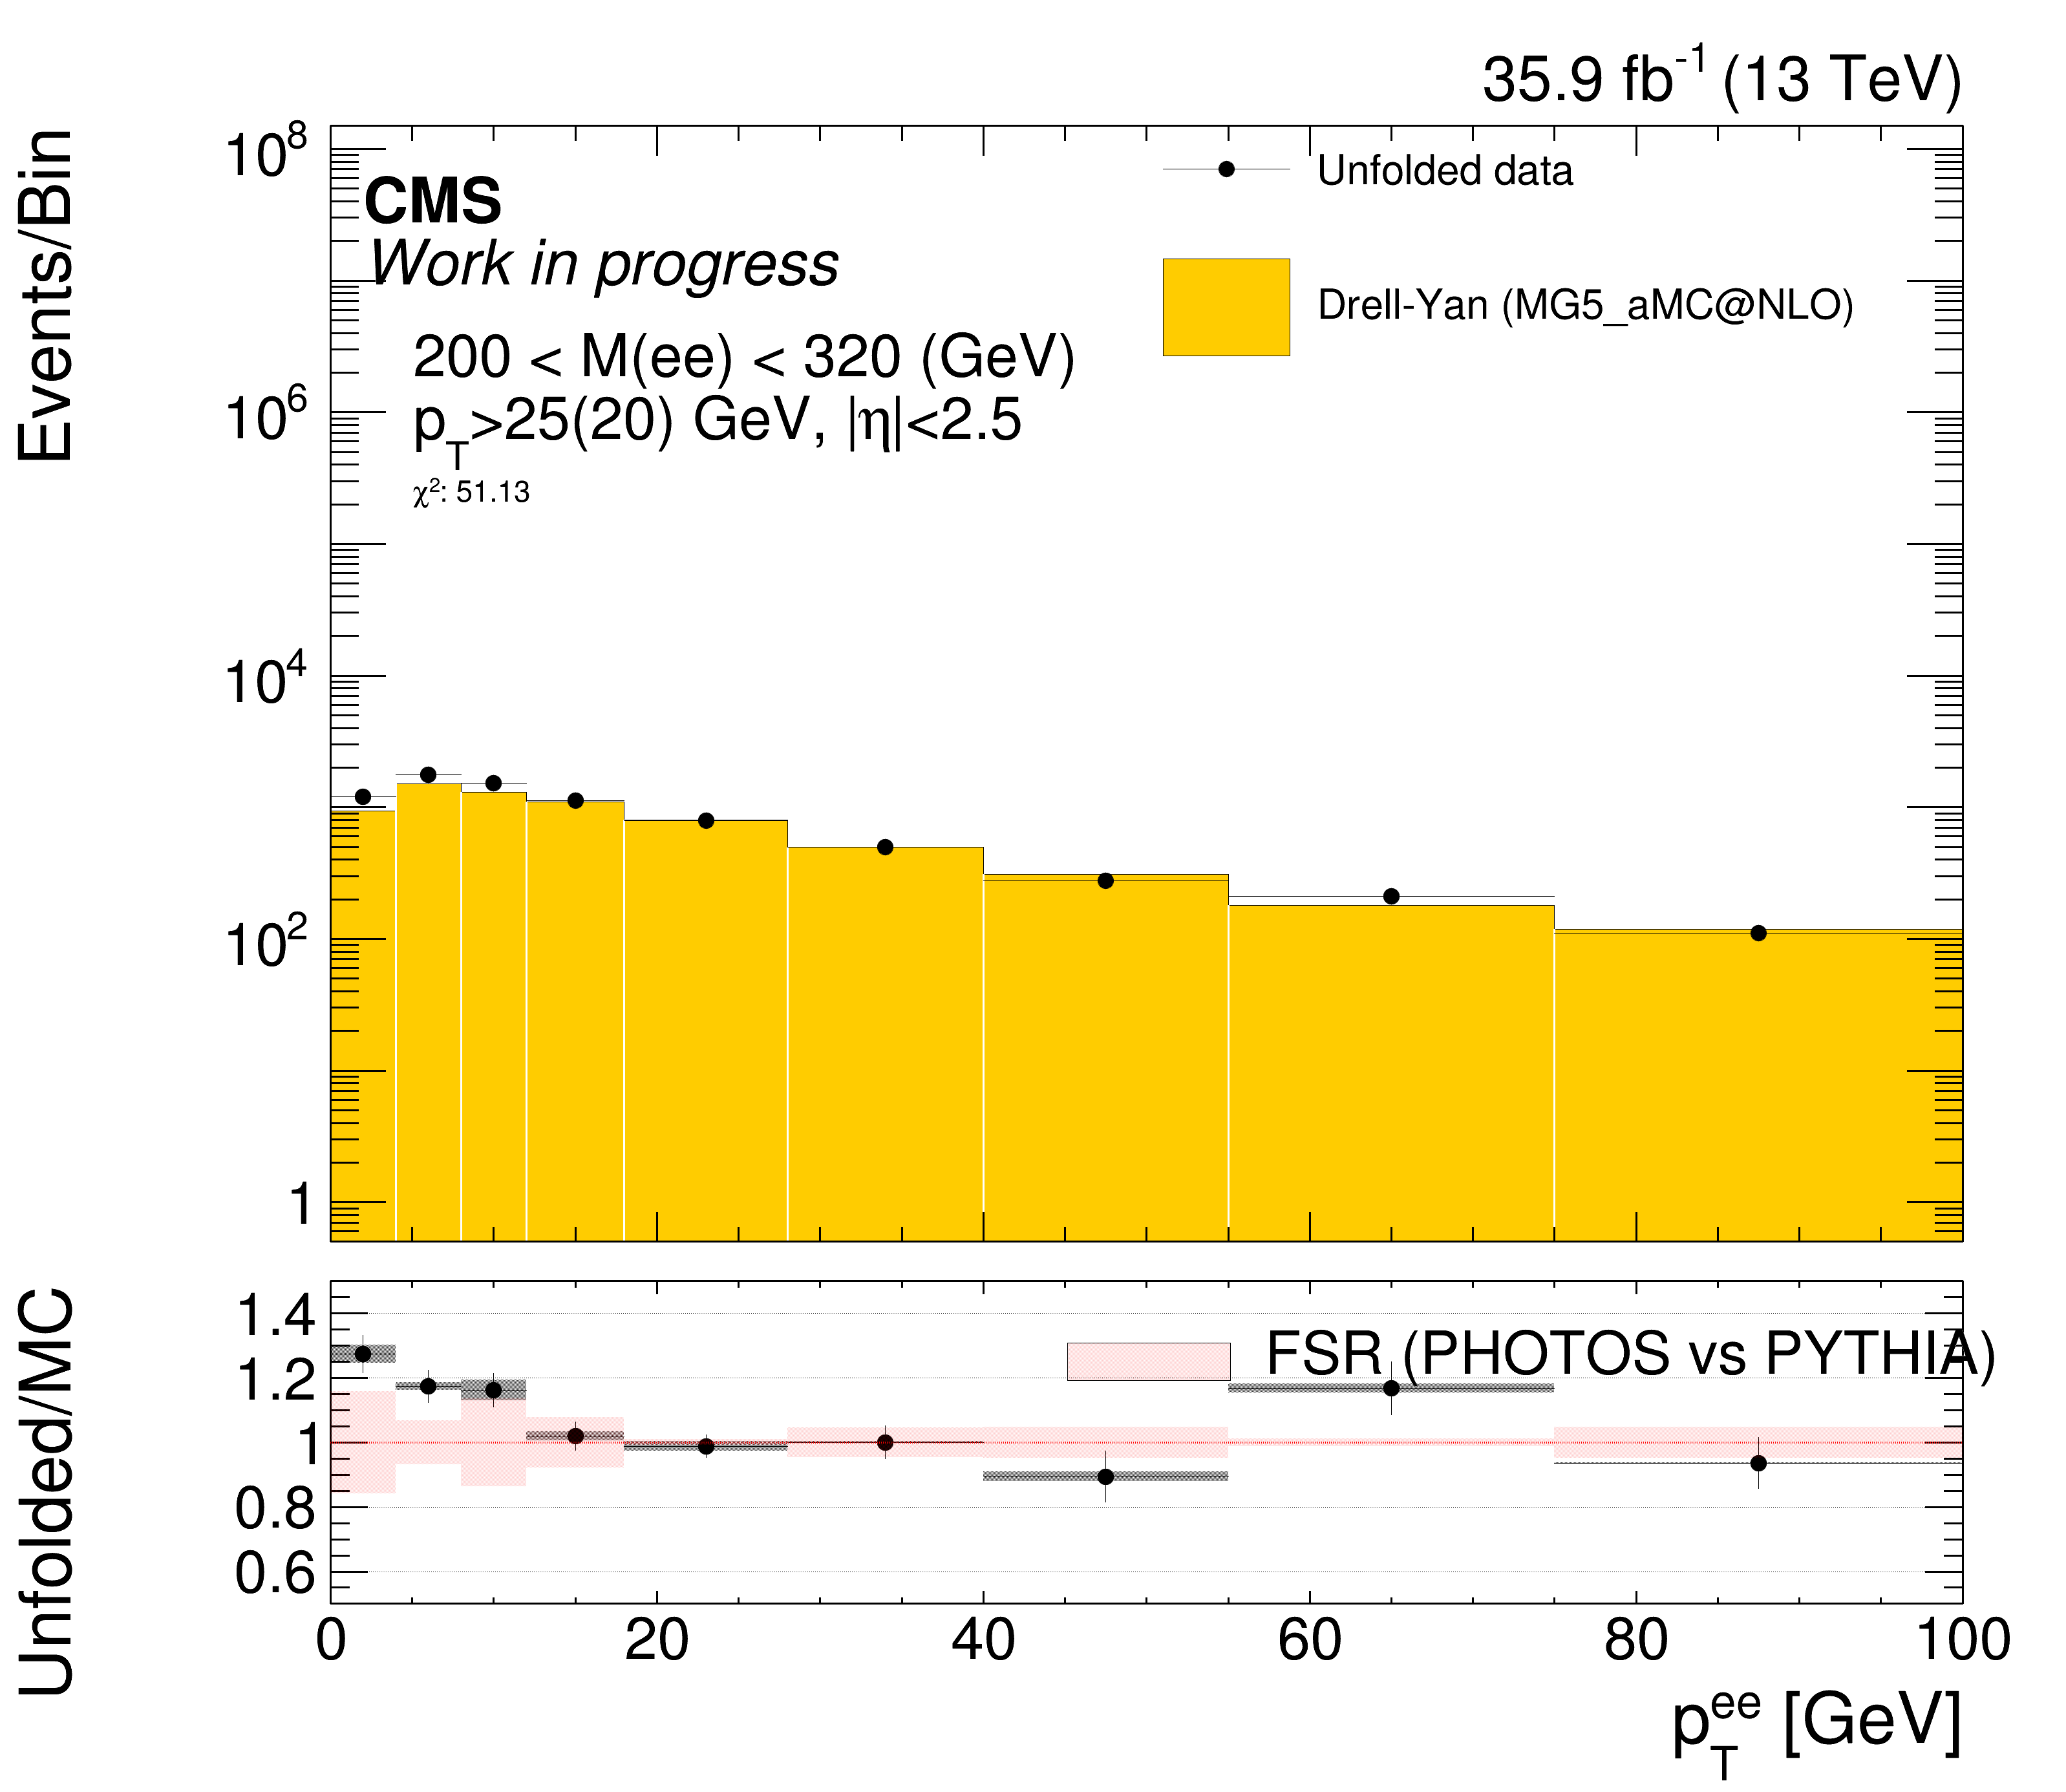

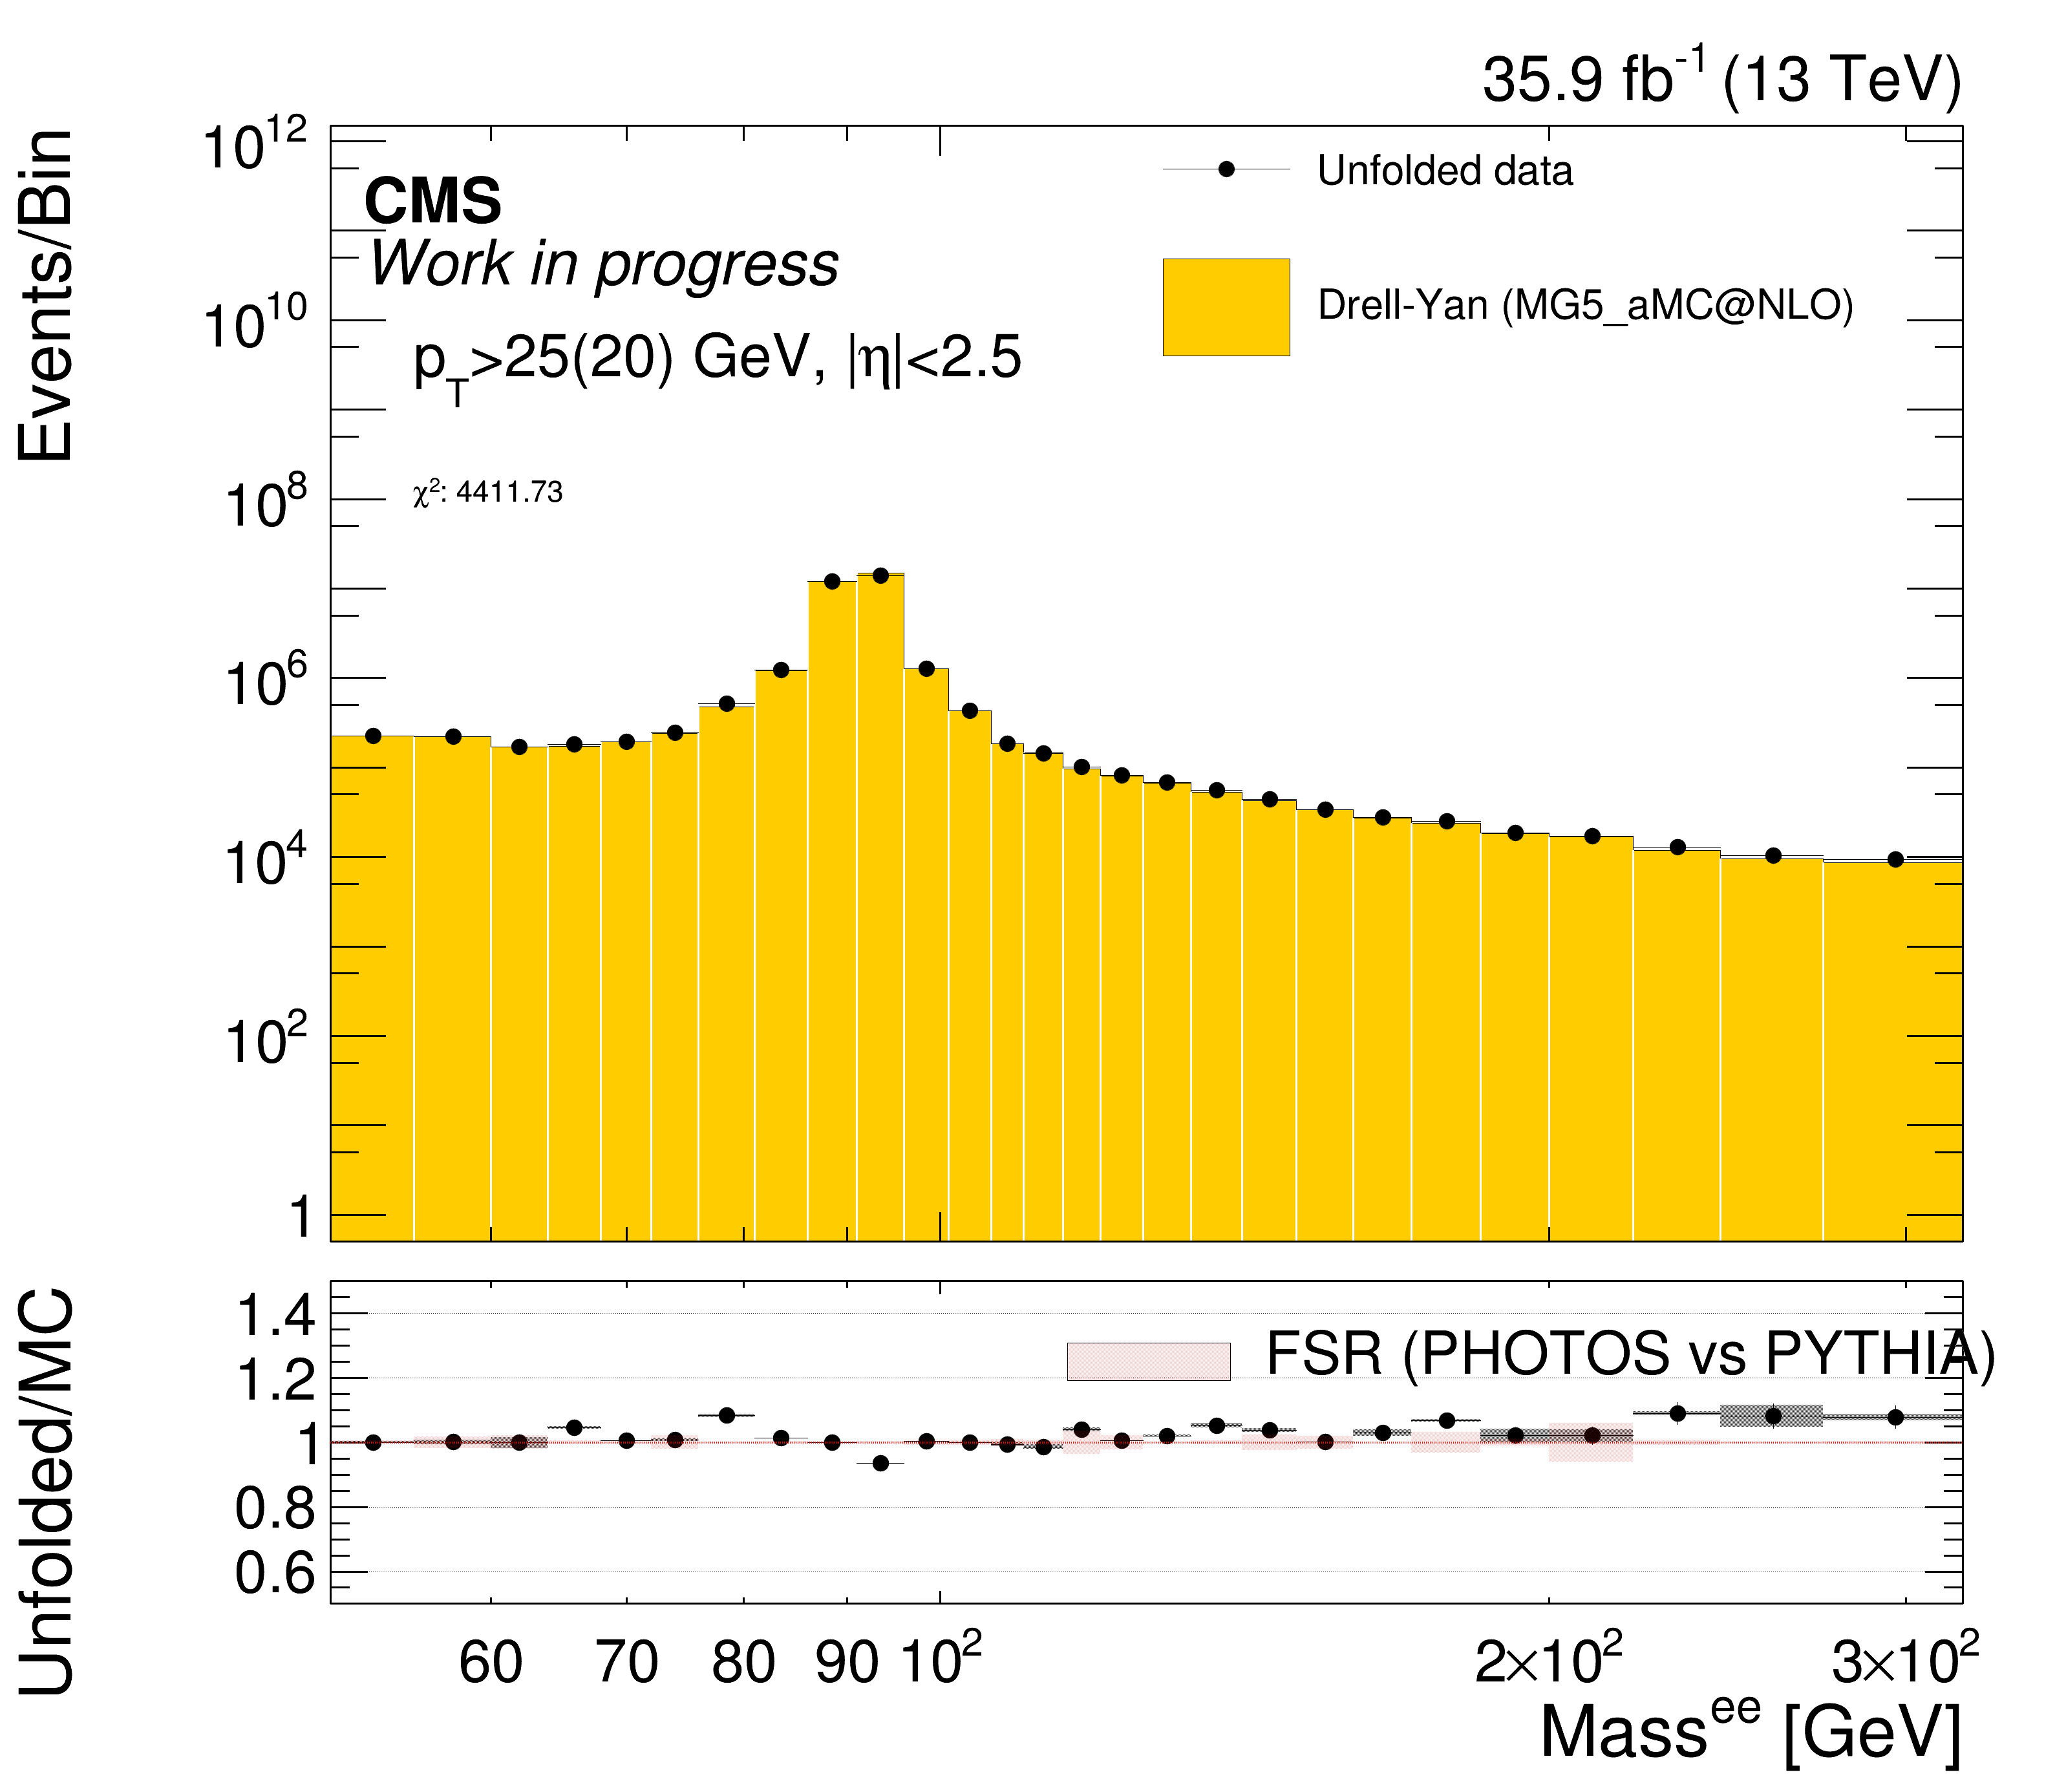

In [33]:
if doSys: 
    for sysName, _ in fsr_systematics.items():
        for massBin in range(5):
            if sysName == "Scale(#mu_{F}/#mu_{R})":
                print (sysName)
                fsrUnfold_muon_2016.drawUnfPlot("Pt", "pt[UO];mass[UOC"+str(massBin)+"]", True, sysName, "FSRUnf_M"+str(massBin)+"Scale"+"_", massBin, True)
            else : fsrUnfold_muon_2016.drawUnfPlot("Pt", "pt[UO];mass[UOC"+str(massBin)+"]", True, sysName, "FSRUnf_M"+str(massBin)+sysName+"_", massBin, True)
                
        if sysName == "Scale(#mu_{F}/#mu_{R})":
            fsrUnfold_muon_2016.drawUnfPlot("Mass", "mass[UO];pt[UOC0]", True, sysName, "FSRUnf_MassScale")
        else :
            fsrUnfold_muon_2016.drawUnfPlot("Mass", "mass[UO];pt[UOC0]", True, sysName, "FSRUnf_Mass"+sysName)

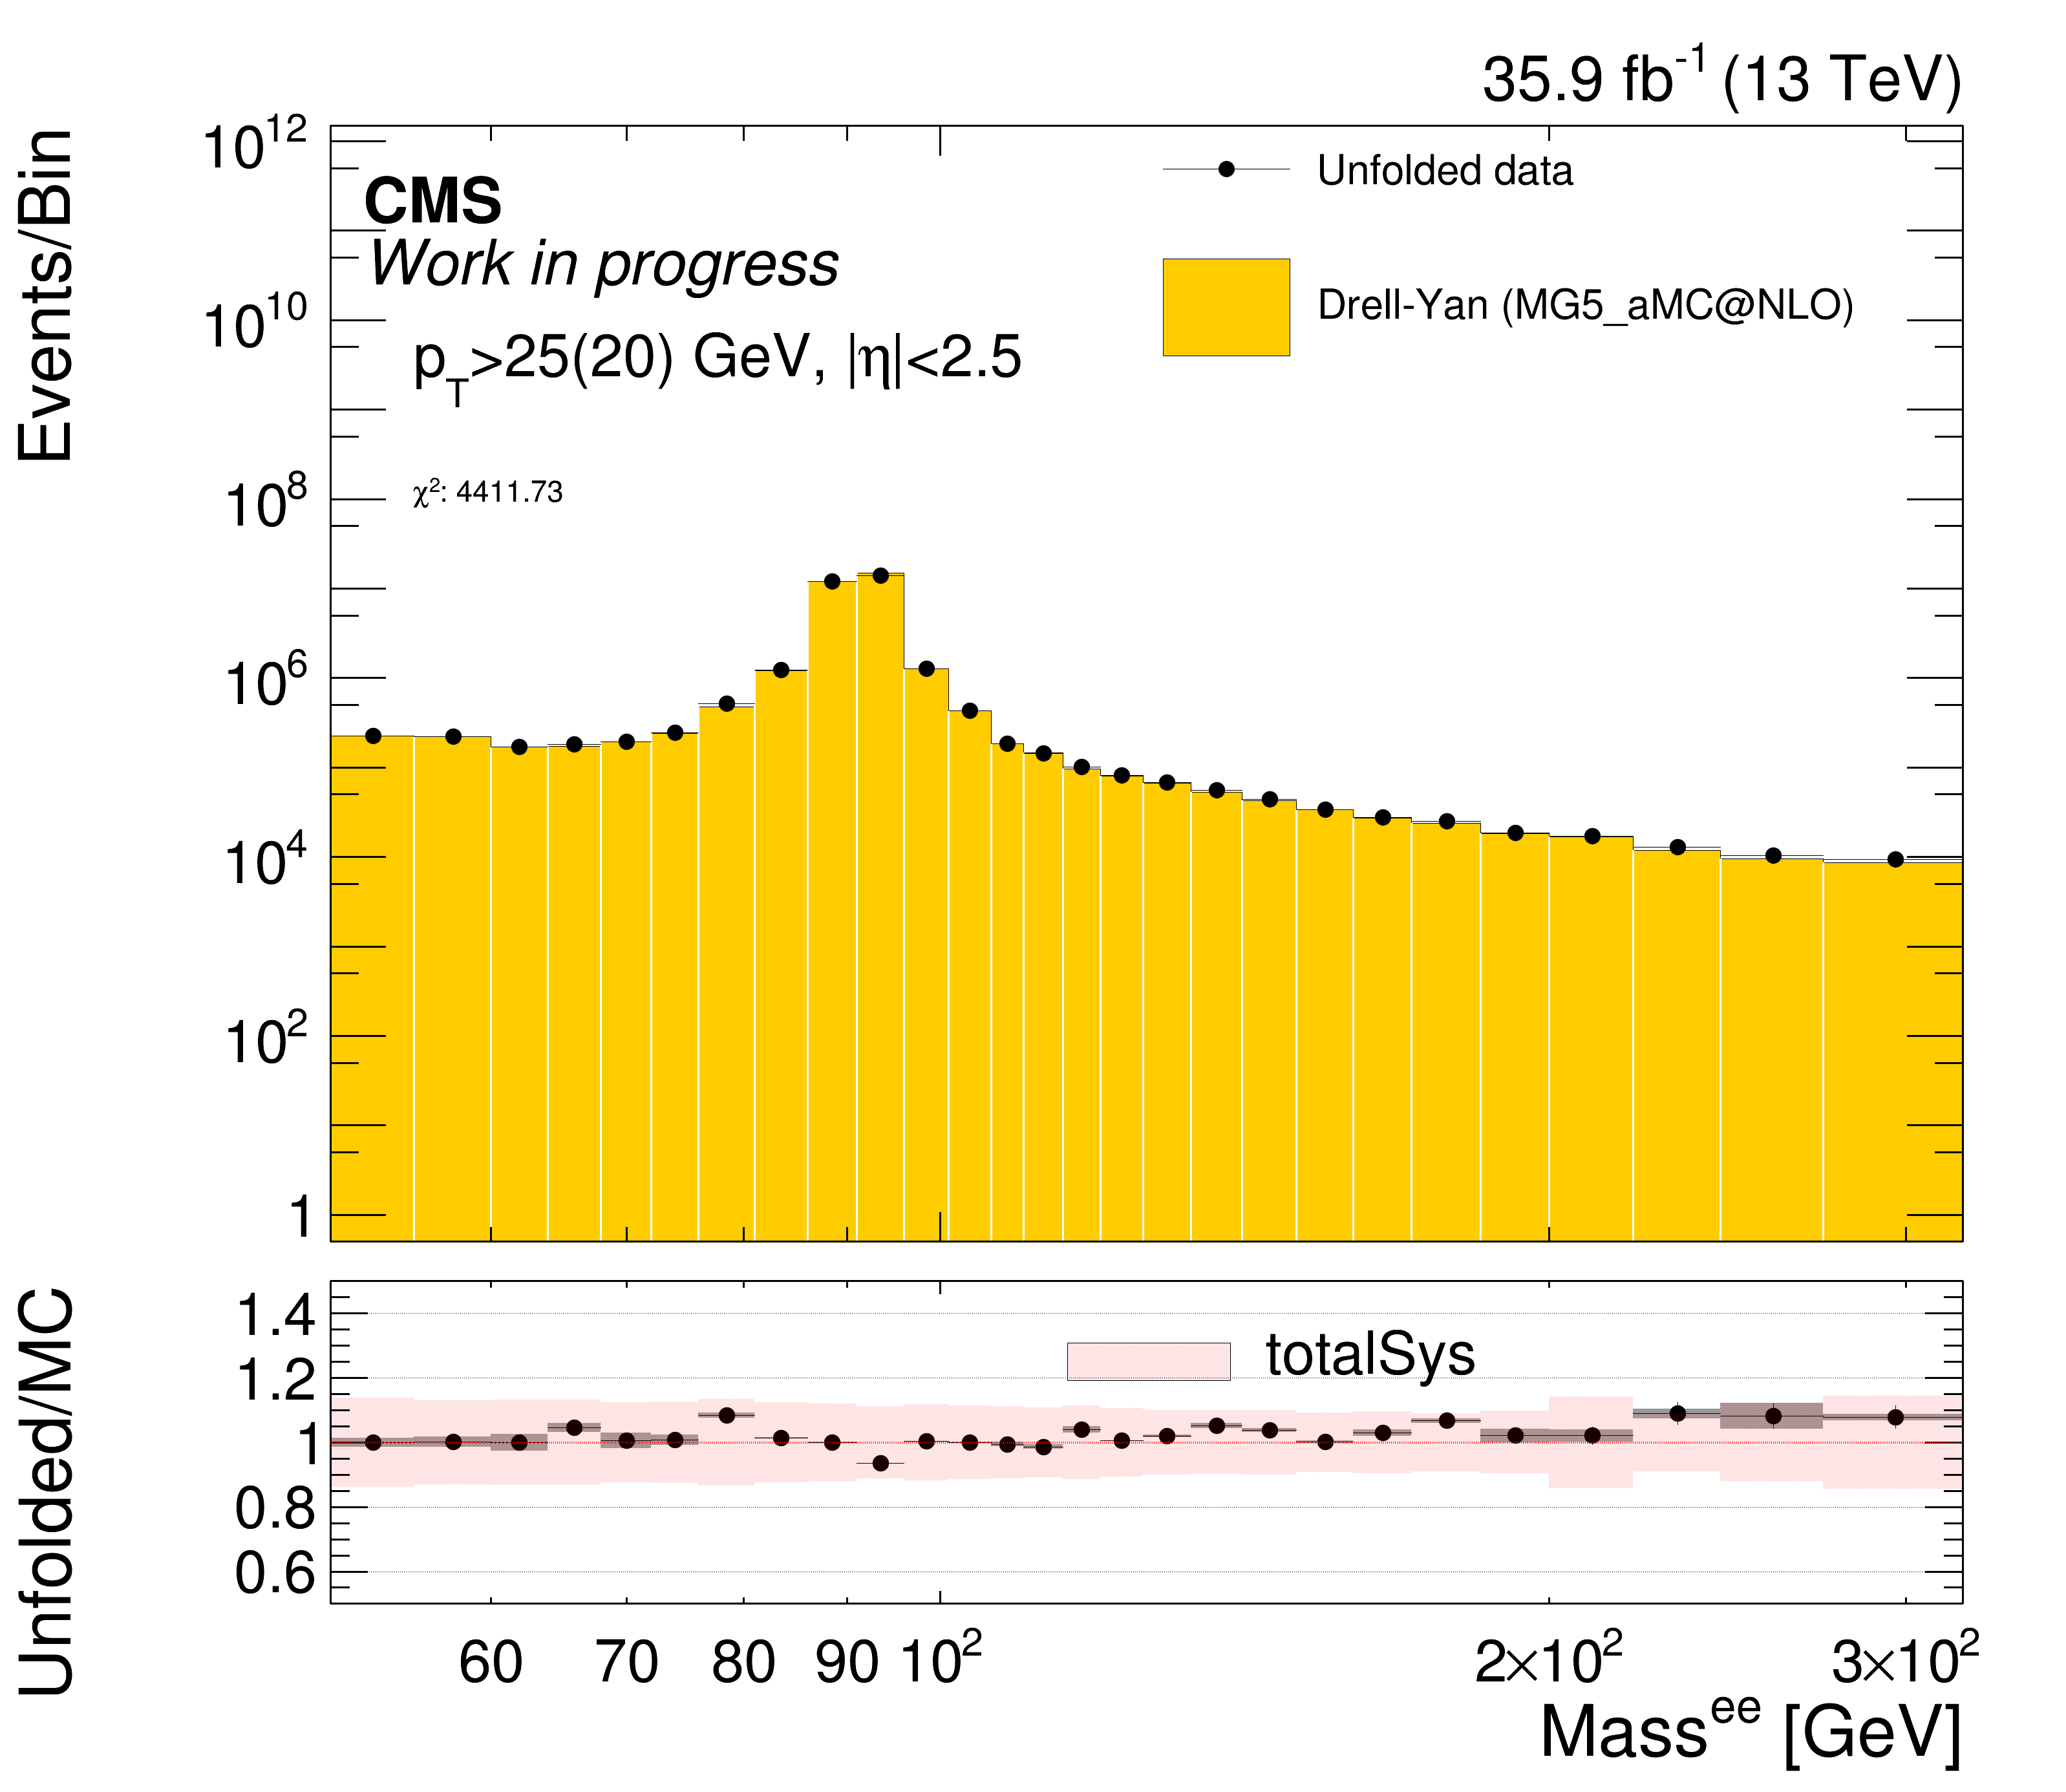

In [34]:
fsrUnfold_muon_2016.drawUnfPlot("Mass", "mass[UO];pt[UOC0]", True, "totalSys", "FSRUnf_Mass")

# Acceptance correction 

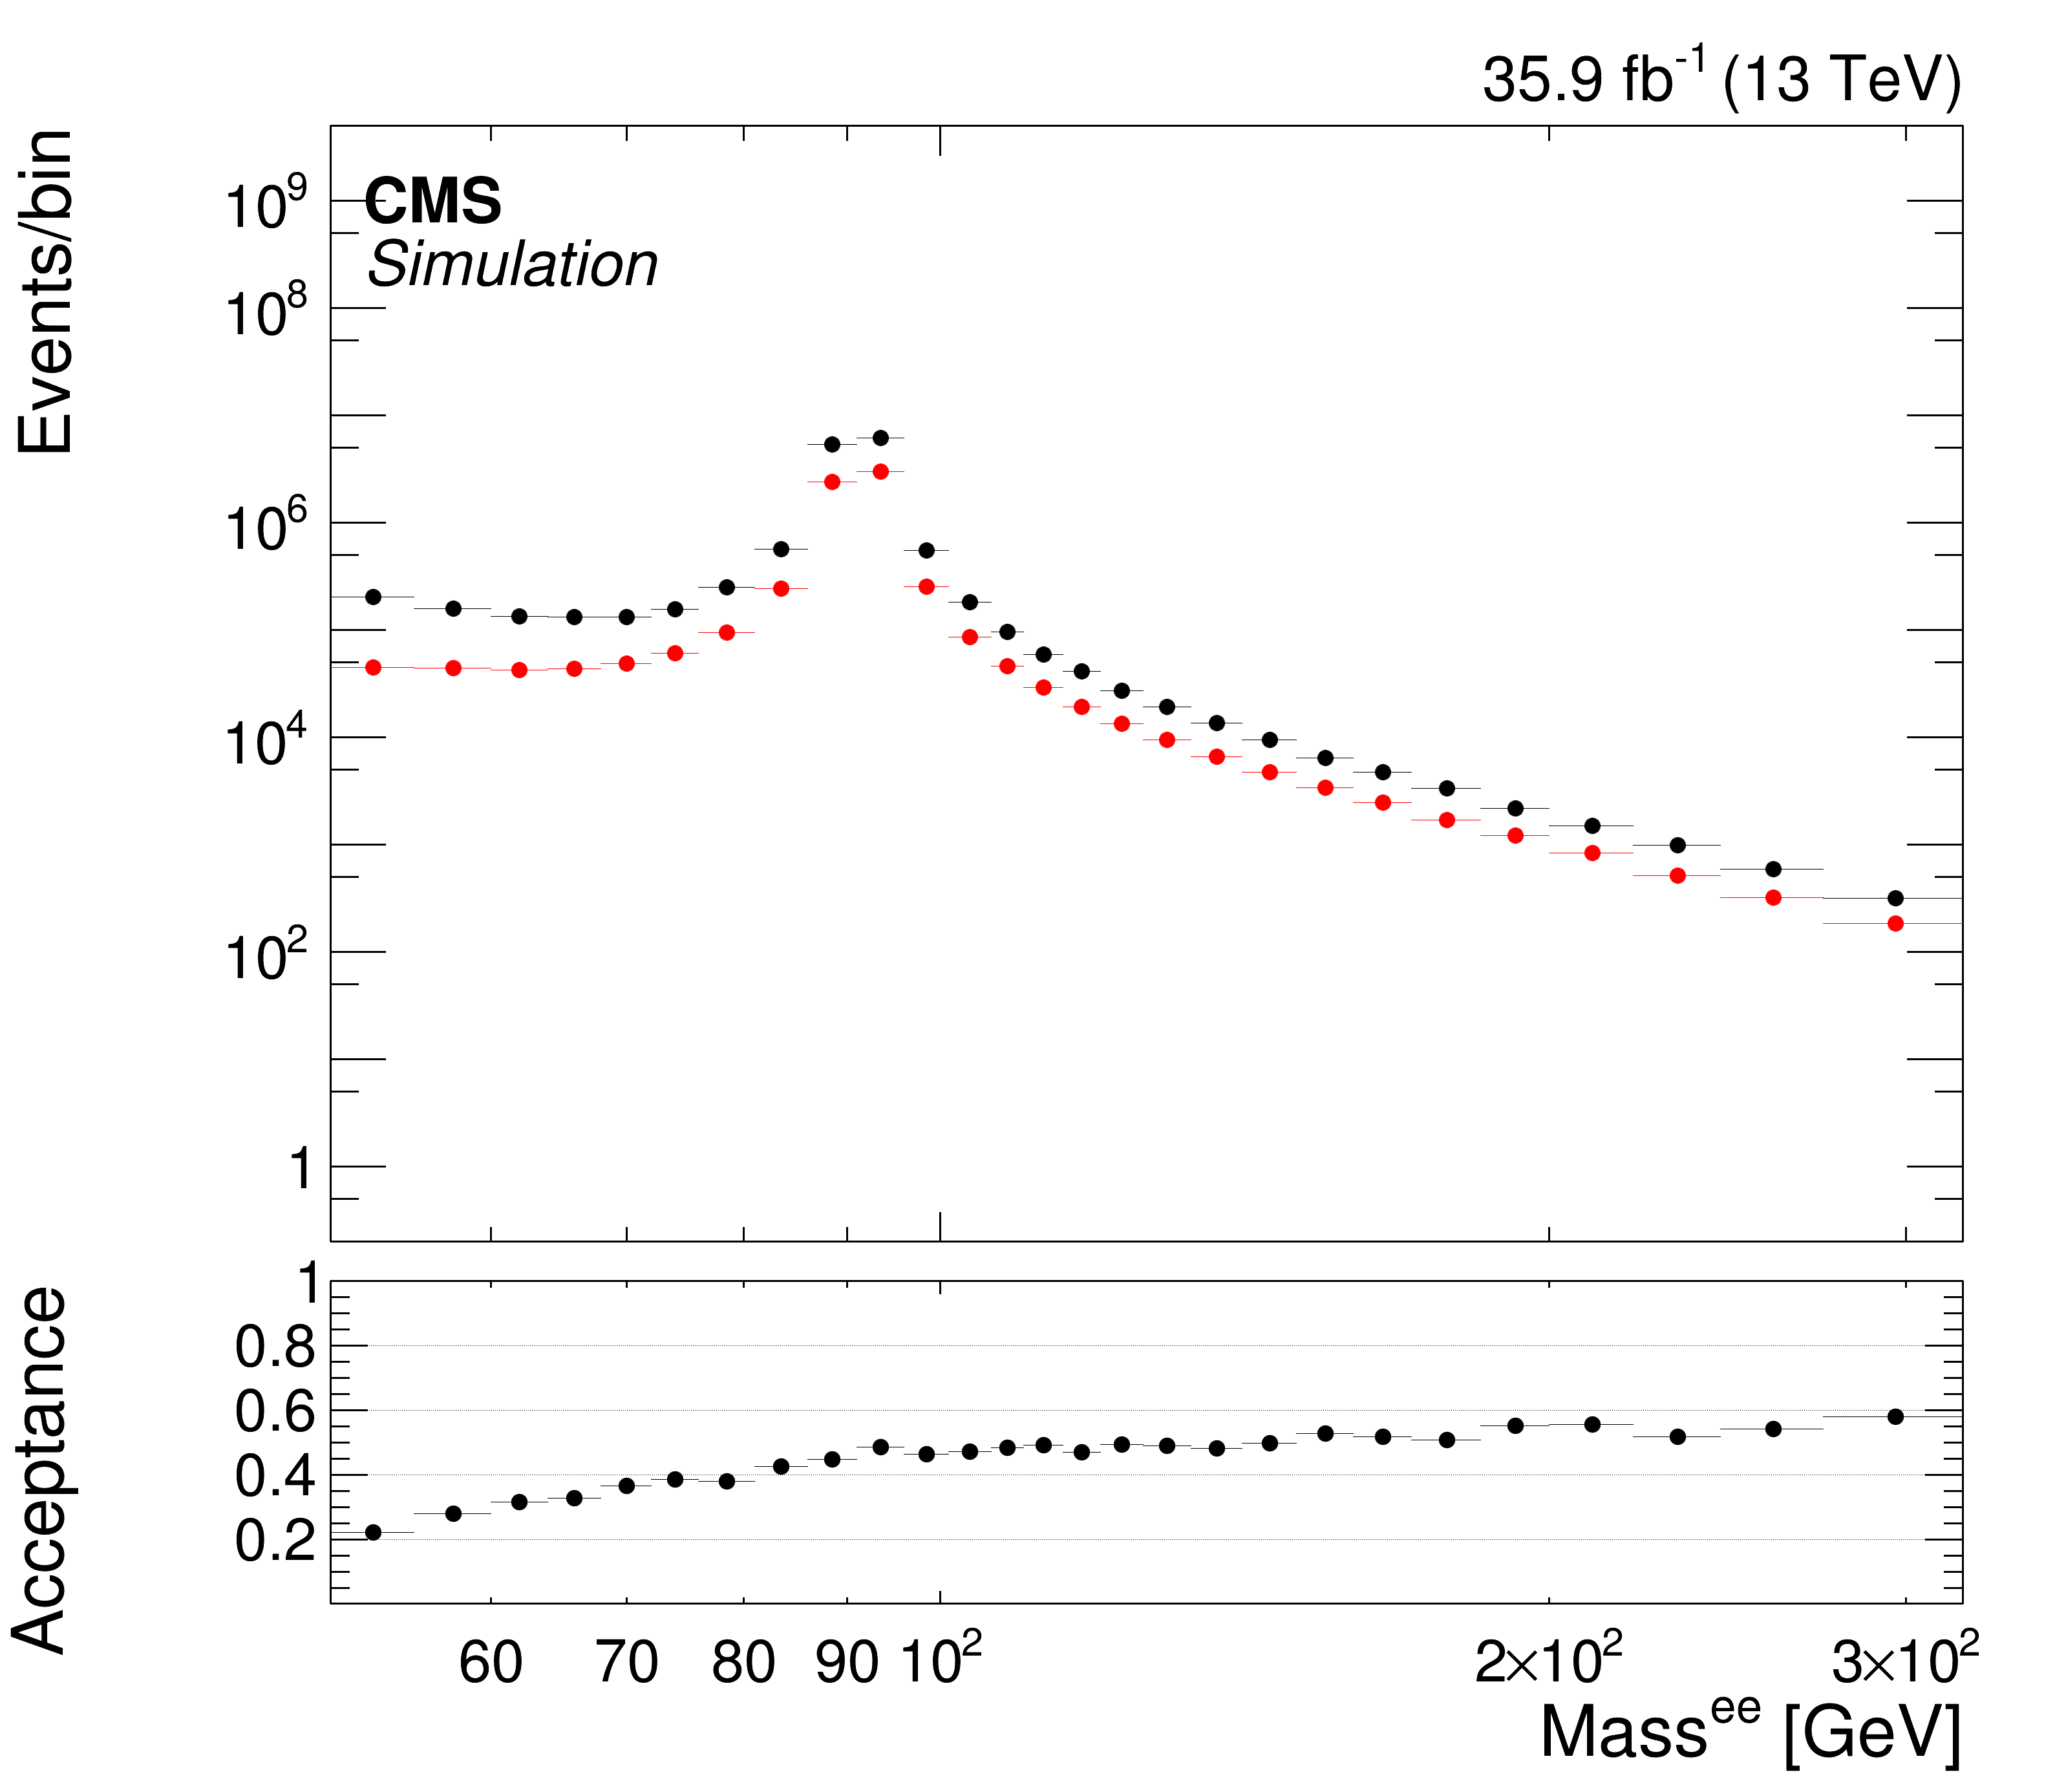

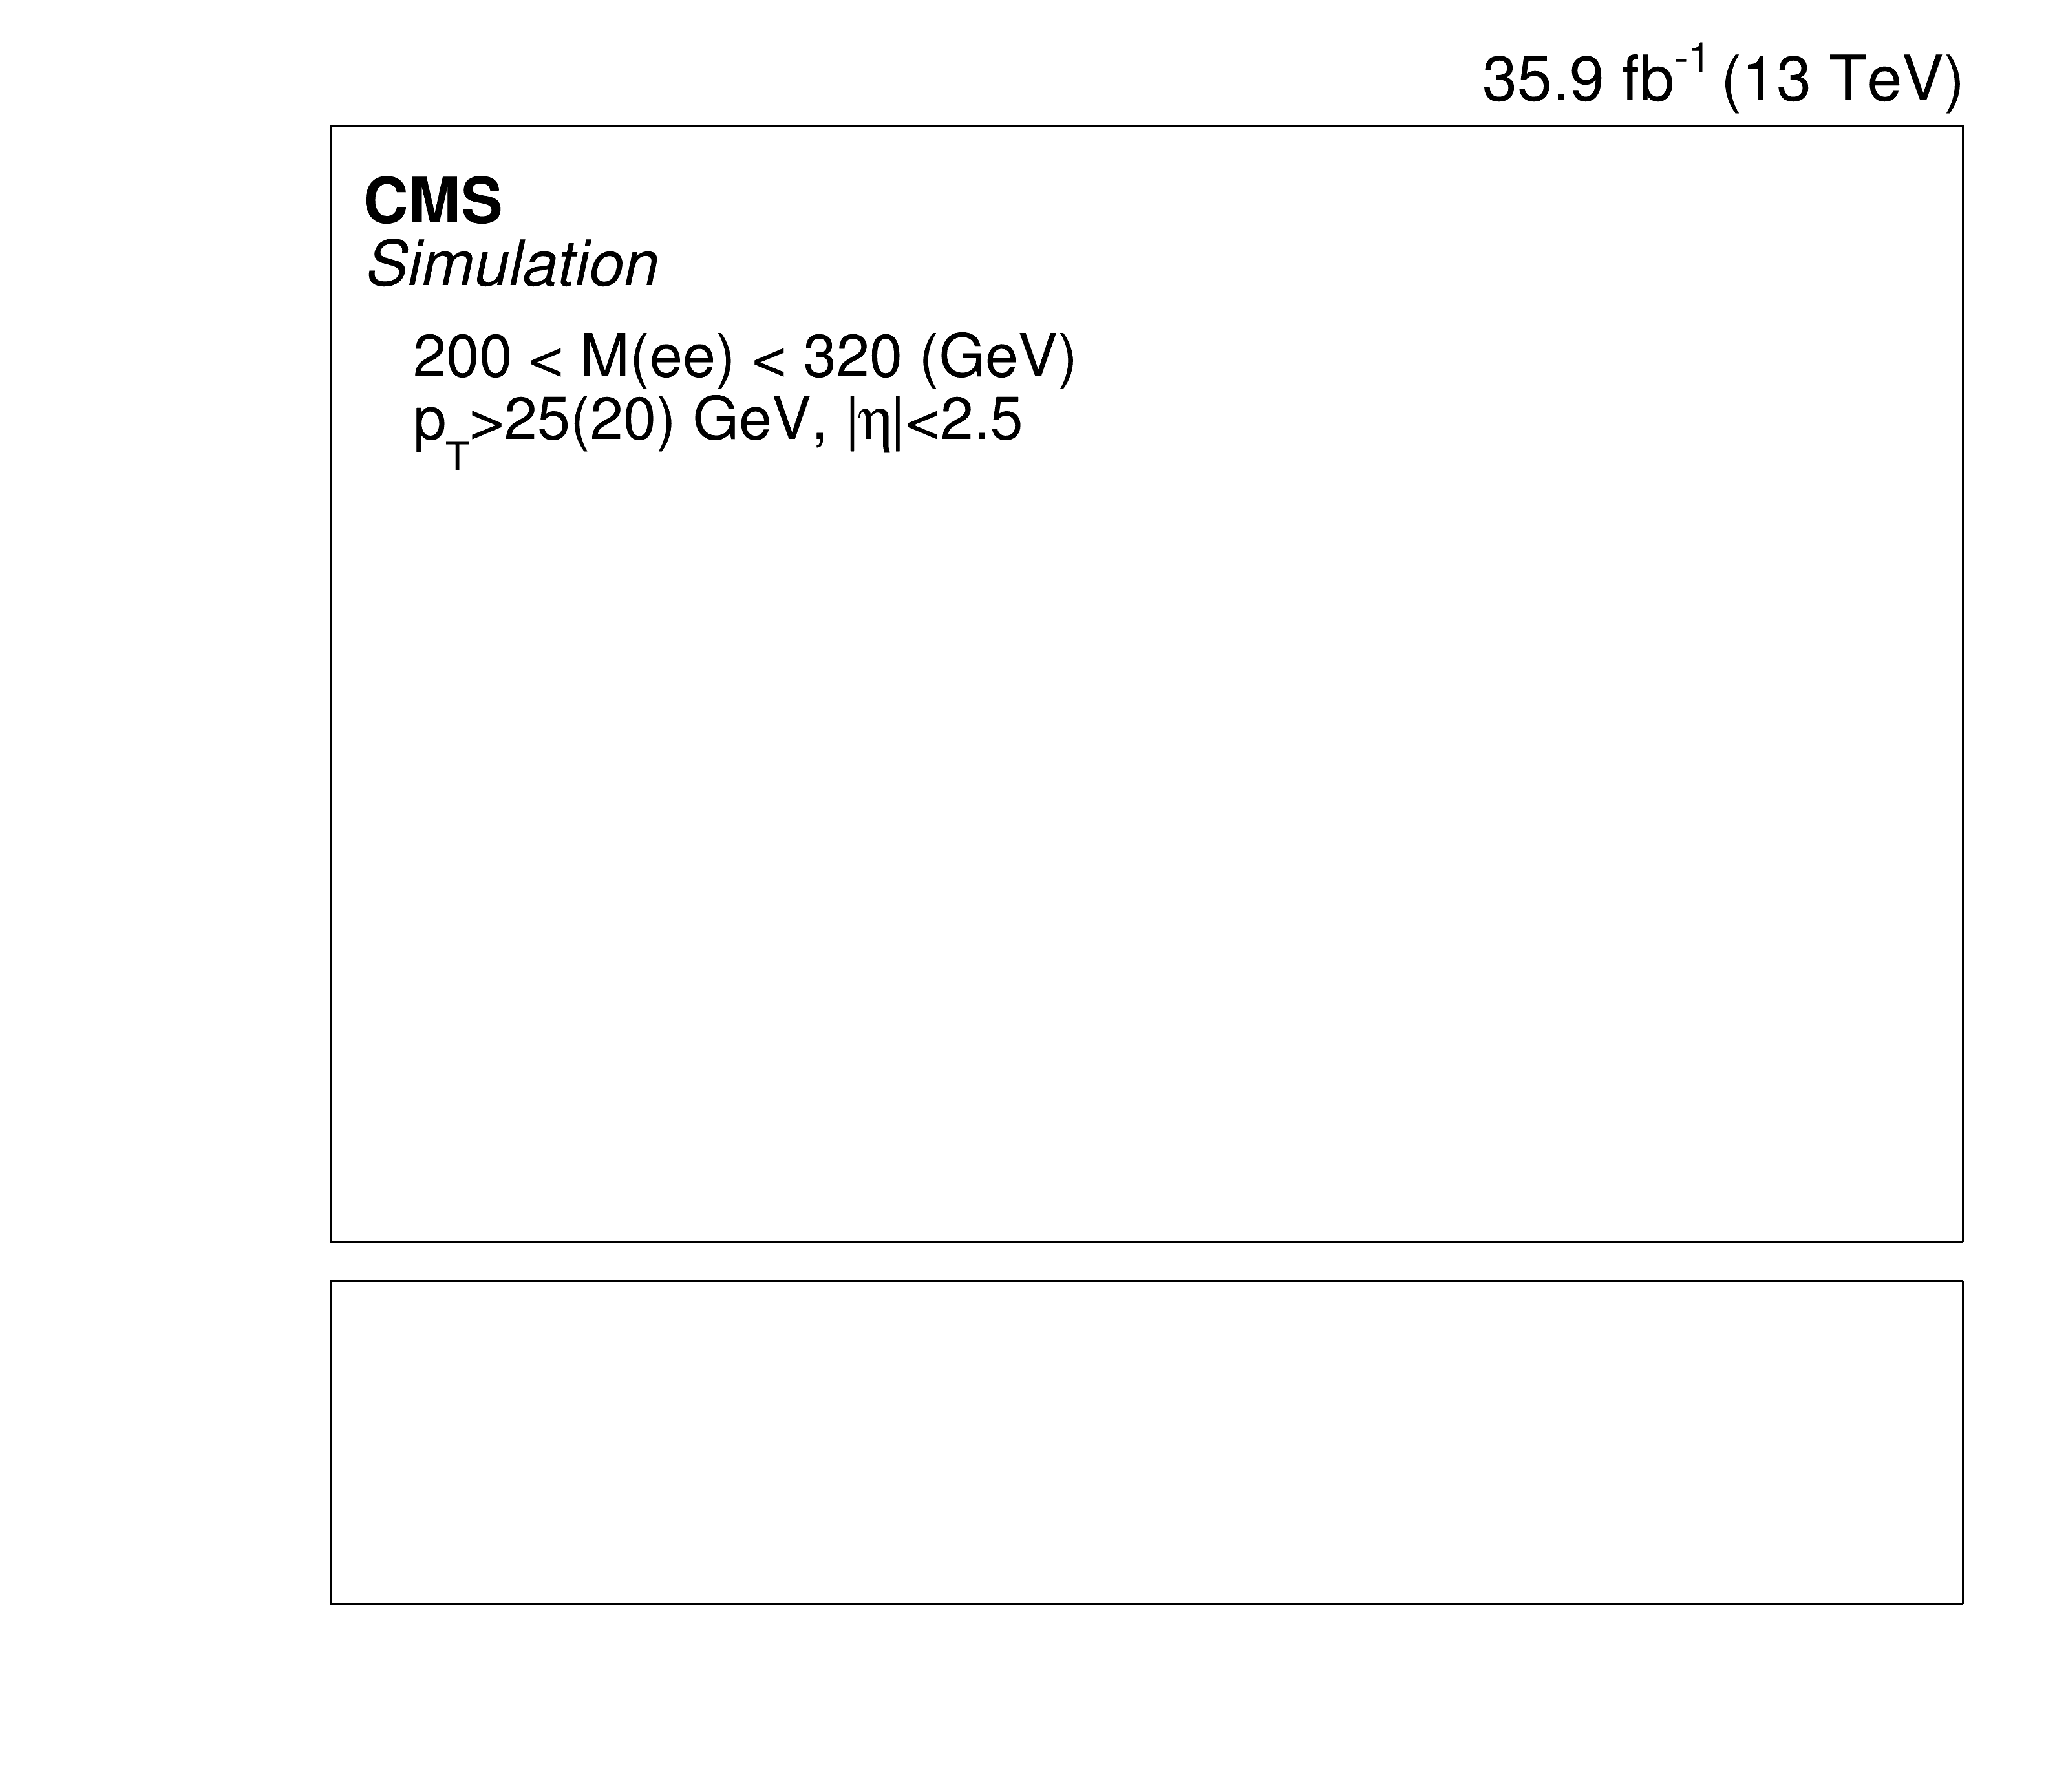

In [35]:
if phase_space == "Fiducial":
    fsrUnfold_muon_2016.doAcceptance(doSys, True)

In [36]:
if phase_space == "Fiducial" :
    fsrUnfold_muon_2016.setAcceptMeanValues()
    if doSys:
        fsrUnfold_muon_2016.setAcceptSysMeanValues()
        fsrUnfold_muon_2016.setAcceptSysError()
        fsrUnfold_muon_2016.setAcceptTotSysError()

In [37]:
if doSys: 
    fsrUnfold_muon_2016.printMeanValues()
    fsrUnfold_muon_2016.printMeanValues_Accept()

In [ ]:
for massBin in range(5):
    fsrUnfold_muon_2016.drawAcceptPlot("Pt", "pt[UO];mass[UOC"+str(massBin)+"]", True, "", "FSRUnfAcceptCorr_M"+str(massBin)+"_", massBin, True, True)
fsrUnfold_muon_2016.drawAcceptPlot("Mass", "mass[UO];pt[UOC0]", True, "", "FSRUnfAcceptCorr_", 0, False, True)

if doSys: 
    for sysName, _ in systematics.items():
        for massBin in range(5):
            fsrUnfold_muon_2016.drawAcceptPlot("Pt", "pt[UO];mass[UOC"+str(massBin)+"]", True, sysName, "FSRUnfAcceptCorr_M"+str(massBin)+"_", massBin, True, True)
        fsrUnfold_muon_2016.drawAcceptPlot("Mass", "mass[UO];pt[UOC0]", True, sysName, "FSRUnfAcceptCorr_", 0, False, True)
        

In [ ]:
if doSys:
    for sysName, _ in fsr_systematics.items():
            #if sysName == "Scale(#mu_{F}/#mu_{R})":
            #    print (sysName)
            for massBin in range(5):
                fsrUnfold_muon_2016.drawAcceptPlot("Pt", "pt[UO];mass[UOC"+str(massBin)+"]", True, sysName, "FSRUnfAcceptCorr_M"+str(massBin)+"_", massBin, True, True)
            fsrUnfold_muon_2016.drawAcceptPlot("Mass", "mass[UO];pt[UOC0]", True, sysName, "FSRUnfAcceptCorr_", 0, False, True)

In [ ]:
gr_2016_muon_det =  detUnfold_muon_2016.getPtVsMassTGraph("2016MuonDet", True, "Detector", False)

In [ ]:
gr_2016_muon_det_MC =  detUnfold_muon_2016.getPtVsMassTGraph("2016MuonDet", False, "Detector", False)

In [ ]:
gr_2016_muon_det_unfold =  detUnfold_muon_2016.getPtVsMassTGraph("2016MuonDetUnf", True, "Acceptance", doSys)

In [ ]:
gr_2016_muon_fsr =  fsrUnfold_muon_2016.getPtVsMassTGraph("2016MuonFSR", True,"Unfolded",doSys)

In [ ]:
if phase_space == "Fiducial" :
    gr_2016_muon_accept =  fsrUnfold_muon_2016.getPtVsMassTGraph("2016MuonFSRAccept", True,"Acceptance", doSys)

In [ ]:
import pyScripts.tdrStyle as tdrStyle
import pyScripts.CMS_lumi as CMS_lumi
import ROOT as rt
markerSize = 2.5
channel_str = "#mu^{+}#mu^{-}"
if channel == 'electron' :
    markerColor = rt.kMagenta
    channel_str = "e^{+}e^{-}"
else : markerColor = rt.kBlue

tdrStyle.setTDRStyle()
rt.gStyle.SetOptFit(0)

c_PtVsMass_detector = rt.TCanvas("PtVsMass_detector","PtVsMass_detector", 3000, 1800)
c_PtVsMass_detector.SetGridx()
c_PtVsMass_detector.SetGridy()
c_PtVsMass_detector.SetLogx()
c_PtVsMass_detector.SetBottomMargin(0.2)
c_PtVsMass_detector.SetTopMargin(0.07)

gr_2016_muon_det.SetTitle("2016, 2017, 2018 Detector level")
gr_2016_muon_det.Draw("APC")
gr_2016_muon_det.GetYaxis().SetRangeUser(12., 30.)
gr_2016_muon_det.GetXaxis().SetLimits(20., 700.)
gr_2016_muon_det.SetMarkerStyle(20)
gr_2016_muon_det.SetLineStyle(1)
gr_2016_muon_det.SetMarkerSize(markerSize)
gr_2016_muon_det.SetMarkerColor(rt.kBlack)
gr_2016_muon_det.SetLineColor(rt.kBlack)
gr_2016_muon_det.GetYaxis().SetTitleOffset(1.0)
gr_2016_muon_det.GetXaxis().SetTitleOffset(1.0)
gr_2016_muon_det.GetYaxis().SetTitle("<p^{"+channel_str+"}_{T}> [GeV]")
gr_2016_muon_det.GetXaxis().SetTitle("<Mass^{"+channel_str+"}> [GeV]")

gr_2016_muon_det_MC.Draw("P SAME")
gr_2016_muon_det_MC.SetMarkerStyle(24)
gr_2016_muon_det_MC.SetLineStyle(1)
gr_2016_muon_det_MC.SetMarkerSize(markerSize)
gr_2016_muon_det_MC.SetMarkerColor(rt.kRed)
gr_2016_muon_det_MC.SetLineColor(rt.kRed)

#gr_2016_muon_det_unfold.Draw("PC SAME")
gr_2016_muon_det_unfold.SetLineWidth(2)
gr_2016_muon_det_unfold.SetMarkerColor(markerColor-9)
gr_2016_muon_det_unfold.SetLineStyle(1)
gr_2016_muon_det_unfold.SetMarkerSize(markerSize)
gr_2016_muon_det_unfold.SetLineColor(markerColor-9)

gr_2016_muon_fsr.Draw("PC SAME")
gr_2016_muon_fsr.SetLineWidth(2)
gr_2016_muon_fsr.SetMarkerSize(markerSize)
gr_2016_muon_fsr.SetMarkerColor(markerColor-4)
gr_2016_muon_fsr.SetLineColor(markerColor-4)

if phase_space == "Fiducial" :
    gr_2016_muon_accept.Draw("P SAME")
    gr_2016_muon_accept.SetLineWidth(2)
    gr_2016_muon_accept.SetMarkerSize(markerSize)
    gr_2016_muon_accept.SetMarkerColor(rt.kRed)
    gr_2016_muon_accept.SetLineColor(rt.kRed)
    
fitLinear1 = rt.TF1("f_1", "[0]+2.*[1]*log(x)", 40., 300.);
fitLinear1.SetLineStyle(1)
fitLinear1.SetLineColor(rt.kBlack)
fitLinear1.SetLineWidth(1)
#gr_2016_muon_fsr.Fit(fitLinear1, "R0")
#fitLinear1.Draw("same")

if phase_space == "Fiducial" :
    fitLinear2 = rt.TF1("f_2", "[0]+2.*[1]*log(x)", 40., 300.);
    fitLinear2.SetLineStyle(1)
    fitLinear2.SetLineColor(rt.kRed)
    fitLinear2.SetLineWidth(1)
    gr_2016_muon_accept.Fit(fitLinear2, "R0")
    fitLinear2.Draw("same")
    #print("Chi2: ", fitLinear2.GetChisquare())

legend = rt.TLegend(0.65, 0.25, 0.9, 0.5)
legend.SetBorderSize(1);
legend.AddEntry(gr_2016_muon_det, "Detector data " + year , "ple")
legend.AddEntry(gr_2016_muon_det_MC, "DY MC (MG_aMG@NLO)" , "ple")
#legend.AddEntry(gr_2016_muon_det_unfold, "Detector Unf. data " + year, "ple")
#legend.AddEntry(gr_2016_muon_fsr, "QED-FSR Unf. data " + year, "ple")
#legend.AddEntry(gr_2016_muon_fsr, "QED-FSR Unf. Accept. corrected data 2016", "ple")
legend.Draw()

CMS_lumi.extraText = "Work in progress"

iPeriod_ = 4;                                                                                                                                                                                                                                                                                                       
if year == '2017':                                                                                                                                                                                                                                                                                          
    iPeriod_ = 5                                                                                                                                                                                                                                                                                                         
if year == '2018':                                                                                                                                                                                                                                                                                                         
    iPeriod_ = 6;   

CMS_lumi.CMS_lumi(c_PtVsMass_detector, iPeriod_, 11)
c_PtVsMass_detector.Draw()
c_PtVsMass_detector.SaveAs("pt_mass_" + year + "_" + channel + ".png")

In [ ]:
fsrUnfold_muon_2016.drawSystematics("Pt")
fsrUnfold_muon_2016.drawSystematics("Mass")

In [ ]:
fsrUnfold_muon_2016.drawSystematics("Pt", True)
fsrUnfold_muon_2016.drawSystematics("Mass", True)

In [ ]:
fsrUnfold_muon_2016.drawPDFVar()
fsrUnfold_muon_2016.drawPDFVar(False)

In [ ]:
fsrUnfold_muon_2016.drawStatVar()

In [ ]:
fsrUnfold_muon_2016.drawSysVar("Scale(#mu_{F}/#mu_{R})","Pt")
fsrUnfold_muon_2016.drawSysVar("Scale(#mu_{F}/#mu_{R})","Mass")

fsrUnfold_muon_2016.drawSysVar("Unfold","Pt")
fsrUnfold_muon_2016.drawSysVar("Unfold","Mass")

fsrUnfold_muon_2016.drawSysVar("FSR","Pt")
fsrUnfold_muon_2016.drawSysVar("FSR","Mass")

In [ ]:
#Comparison plot before/after unfolding procedure!

def drawComparisonPlot(hist, *hists, doNorm = False, outName = "", xaxisTitle = "", var = "Pt"):
    markerSize = 5
    marker = 20
    tdrStyle.setTDRStyle()
    rt.gStyle.SetOptFit(0)
    rt.gStyle.SetLineWidth(3); 
    rt.gStyle.SetFrameLineWidth(3);
    rt.gROOT.ForceStyle();

    c_comparison = rt.TCanvas("c_comparison","c_comparison", 4200, 2800)
    c_comparison.Draw()
    c_comparison.cd()
    
    pad_top = rt.TPad("pad_top", "pad_top", 0, 0.3, 1, 1)
    pad_top.SetTopMargin(0.1);
    pad_top.SetBottomMargin(0.05)
    pad_top.Draw()
    pad_top.cd()
    pad_top.SetLogy()
   
    if doNorm:
        hist.Scale(1./hist.Integral())
    hist.Draw("hist")
    hist.GetYaxis().SetTitle("A.U.")
    hist.SetLineColor(rt.kBlack)
    hist.SetLineWidth(2)
    #hist.SetMarkerSize(markerSize)
    #hist.SetMarkerStyle(marker)
    hist.SetLabelSize(0)
    hist.SetMinimum(1e-10)
    hist.SetMaximum(1e2)

    legend = rt.TLegend(0.65, 0.5, 0.9, 0.88)
    legend.SetBorderSize(0)
    legend.SetTextFont(43)
    legend.SetTextSize(100)
    legend.AddEntry(hist, "Detector level data " + year , "ple")
    
    line = rt.TLine();                                                                                                                                                                                                           
    if var == "Pt":                                                                                                                                                                                                    
        for i in range(4):                                                                                                                                                          
                                                                                                                                                                                                                                 
            line.SetLineStyle(1);                                                                                                                                                                                         
            line.DrawLine(9*(i+1)+0.5, 1e-5, 9*(i+1)+0.5, 1e2)                                                                                                                   
    
    init_color = 4
    hratios = []
    
    for counter, hist_ in enumerate(hists):
        print(str(init_color))
        if doNorm:
            hist_.Scale(1./hist_.Integral())
        hist_.SetLineColor(init_color)
        hist_.Draw("histsame")
        #hist_.SetMarkerSize(markerSize)
        if counter == 0:
            legend.AddEntry(hist_, "Dressed level data " + year, "ple")
        if counter == 1:
            legend.AddEntry(hist_, "Parton level data " + year, "ple")
        
        hratios.append(hist_.Clone("hratio_"+str(counter)))
            
        init_color = init_color - 2
        
    legend.Draw()
        
    CMS_lumi.extraText = "Work in progress"
    CMS_lumi.CMS_lumi(pad_top, 4, 11)

    c_comparison.cd()
    
    pad_bottom = rt.TPad("pad_bottom", "pad_bottom", 0, 0.0, 1, 0.3)
    pad_bottom.Draw()
    pad_bottom.SetBottomMargin(0.35)
    pad_bottom.cd()
    
    init_color = 4
    for counter, hratio in enumerate(hratios):
        #print("counter: " + str(counter))
        #print(str(init_color))
        hratio.Divide(hist)
        hratio.SetLineColor(init_color)
        hratio.SetLineWidth(2)
        #print ("test error: " + str(hratio.GetBinError(1)))
        
        if counter == 0 :
            #print("draw")
            hratio.Draw("hist e")
            hratio.GetYaxis().SetTitle("/Detector")
            hratio.GetYaxis().SetNdivisions(505)
            hratio.GetXaxis().SetTitle(xaxisTitle)
            hratio.SetMinimum(0.4)
            hratio.SetMaximum(1.6)
            
            if var == "Pt":                                                                                                                                                                                                    
                for i in range(4):                                                                                                                                                          
                                                                                                                                                                                                                                 
                    line.SetLineStyle(1);                                                                                                                                                                                         
                    line.DrawLine(9*(i+1)+0.5, 0.4, 9*(i+1)+0.5, 1.6)  
            
            oneLine = rt.TLine(hratio.GetXaxis().GetXmin(),1,hratio.GetXaxis().GetXmax(),1);                                                                                                     
            oneLine.SetLineColor(rt.kBlack)                                                                                                                               
            oneLine.Draw("same")                                                                                                                                                           
            oneLine.SetLineStyle(3) 
        else :
            hratio.Draw("hist same")
            
        #hratio.SetMarkerSize(markerSize)
            
        init_color = init_color - 2
        
    
    c_comparison.cd()
    
    c_comparison.SaveAs(outName)
    del c_comparison

In [ ]:
hPt_det_2016_data    = detUnfold_muon_2016_CoarseCoarse.getUnfInHist("Pt", "pt[UO];mass[UO]", False, "", "", 0, False)
hPt_detUnf_2016_data = detUnfold_muon_2016.getUnfHist("Pt", "DetectorUnf", "pt[UO];mass[UO]", False)
hPt_fsrUnf_2016_data = fsrUnfold_muon_2016.getUnfHist("Pt", "FSRUnf", "pt[UO];mass[UO]", False)

In [ ]:
hMass_det_2016_data    = detUnfold_muon_2016.getUnfInHist("Mass", "mass[UO];pt[UOC0]", True, "", "", 0, True)
hMass_detUnf_2016_data = detUnfold_muon_2016.getUnfHist("Mass", "DetectorUnf", "mass[UO];pt[UOC0]", True, True)
hMass_fsrUnf_2016_data = fsrUnfold_muon_2016.getUnfHist("Mass", "FSRUnf", "mass[UO];pt[UOC0]", True, True)

In [ ]:
drawComparisonPlot(hMass_det_2016_data, hMass_detUnf_2016_data, hMass_fsrUnf_2016_data, doNorm = True, outName = "MassComparison.png", xaxisTitle = "Mass^{"+channel_str+"} (GeV)", var = "Mass")

In [ ]:
drawComparisonPlot(hPt_det_2016_data, hPt_detUnf_2016_data, hPt_fsrUnf_2016_data, doNorm = True, outName = "PtComparison.png", xaxisTitle = "p_{T}^{"+channel_str+"} bin index", var = "Pt")